# 1. Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import ast
from scipy.stats import iqr,yeojohnson, skew, kurtosis
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import missingno as msno

import regex as re
import eda_helper_functions
from matplotlib import gridspec
import scipy.stats as stats

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',None)

In [3]:
df = pd.read_csv('mg_cleaned_dataset.csv')


In [4]:
df.head(1)

id  \
0  cardid69429251   

                                                                                                                                        url  \
0  https://www.magicbricks.com/propertydetails/2-bhk-635-sq-ft-multistorey-apartment-for-sale-pokhran-road-in-thane&id=4d423639343239323531   

                                                                                                                                                   image  \
0  https://img.staticmb.com/mbimages/project/photo_h310_w462/2023/04/14/project-photo-6-raymond-realty-ten-x-habitat-thane-5124557_1200_1600_310_462.jpg   

                                                                        name  \
0  2 bhk flat  for sale in  tenx habitat raymond realty, pokhran road, thane   

                                                                                                      wholeaddress  \
0  {'@type': 'postaladdress', 'addresslocality': 'pokhran road', 'addressregion': 'thane', 'addresscountry': 'in'}   

                            address   flooring  \
0  pokhran road, thane, maharashtra  vitrified   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [5]:
df.shape

(11894, 46)

`observation`
- dataset consists of 11894 rows and 46 columns

In [6]:
#Columns in our dataset
df.columns

Index(['id', 'url', 'image', 'name', 'wholeaddress', 'address', 'flooring',
       'image_urls', 'available_units', 'towers', 'locality_rank',
       'locality_rating', 'construction', 'overlooking', 'ownership',
       'extra_rooms', 'bath', 'parking', 'builder', 'project_name', 'furnish',
       'price', 'area', 'costpersqft', 'property_type', 'status', 'lift',
       'flat_on_floor', 'total_floor', 'balcony', 'facing', 'bed', 'lattitude',
       'longitude', 'seller', 'addressregion', 'price_category', 'education',
       'transport', 'shopping_centre', 'commercial_hub', 'hospital', 'tourist',
       'emi', 'project_in_acres', 'location_from_wholeaddress'],
      dtype='object')

In [7]:
#Description of our dataset
df.describe().T

#T refers to transpose that displays the description of our dataset in long format.

count          mean           std         min  \
available_units    6676.0    465.475584   1085.788012    6.000000   
towers             6868.0      4.624199      6.940877    1.000000   
locality_rank      8063.0    122.406424    126.565803    1.000000   
locality_rating   11430.0      3.759361      1.067680    0.000000   
bath              11864.0      2.315324      0.963525    1.000000   
parking            5662.0      1.392088      0.722071    1.000000   
price             11894.0      2.908627      4.238493    0.017000   
area              11889.0    879.286231    697.556563    3.000000   
costpersqft       11888.0  28269.241813  51408.883998  147.000000   
lift               6455.0      3.116809      1.714334    1.000000   
flat_on_floor      9602.0     10.870027     10.134959   -2.000000   
total_floor        9835.0     22.181495     16.214268    1.000000   
balcony            6074.0      1.847218      1.049587    1.000000   
bed               11894.0      2.162351      0.981263    1.000000   
lattitude         11431.0     19.153594      0.735072    9.209138   
longitude         11431.0     72.896409      0.715783   19.024462   
emi               11892.0      1.312083      1.911849    0.007450   
project_in_acres   6144.0     27.368613    728.786747    0.000000   

                           25%           50%           75%           max  
available_units     120.000000    282.000000    550.000000  4.000000e+04  
towers                1.000000      3.000000      5.000000  2.000000e+02  
locality_rank        16.000000     92.000000    186.000000  8.390000e+02  
locality_rating       3.900000      4.000000      4.200000  5.000000e+00  
bath                  2.000000      2.000000      3.000000  1.000000e+01  
parking               1.000000      1.000000      2.000000  1.200000e+01  
price                 0.950000      1.780000      3.200000  8.000000e+01  
area                540.000000    730.000000   1035.000000  4.085200e+04  
costpersqft       16909.250000  25581.000000  34286.000000  5.333333e+06  
lift                  2.000000      3.000000      4.000000  1.000000e+01  
flat_on_floor         4.000000      8.000000     15.000000  7.500000e+01  
total_floor           8.000000     19.000000     30.000000  9.200000e+01  
balcony               1.000000      1.000000      3.000000  8.000000e+00  
bed                   1.000000      2.000000      3.000000  1.000000e+01  
lattitude            19.062055     19.143882     19.210299  7.287506e+01  
longitude            72.839809     72.872695     72.963374  7.402102e+01  
emi                   0.430000      0.800000      1.440000  3.608000e+01  
project_in_acres      1.000000      3.000000      8.499900  5.500000e+04

In [8]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          11894 non-null  object 
 1   url                         11894 non-null  object 
 2   image                       11006 non-null  object 
 3   name                        11894 non-null  object 
 4   wholeaddress                11894 non-null  object 
 5   address                     11894 non-null  object 
 6   flooring                    11894 non-null  object 
 7   image_urls                  7645 non-null   object 
 8   available_units             6676 non-null   float64
 9   towers                      6868 non-null   float64
 10  locality_rank               8063 non-null   float64
 11  locality_rating             11430 non-null  float64
 12  construction                10838 non-null  object 
 13  overlooking                 793

`observation`
- Our dataset features consists of three datatypes
  - float
  - integer
  - object
- Of which total numerical features are 18
- And categorical features are 28.

# User-Defined Functions

about data : value_counts and unique categories 

In [9]:
def analyze_value_counts(df, feature, top_n=None):
    print(f"Unique Categories in '{feature}': {df[feature].nunique()}")
    print("-" * 50)

    if top_n is not None:
        print(df[feature].value_counts().head(top_n))
    else:
        print(df[feature].value_counts())


Function to analyze missing values and summary statistics of a given column

In [10]:
def analyze_column(df, feature):
    print(f"Missing Values in '{feature}': {df[feature].isnull().sum()}")
    print("-" * 50)

    if df[feature].dtype in ["float64", "int64"]:  # Numerical columns
        print(df[feature].describe())
    elif df[feature].dtype in ["object","category"]:  # Categorical columns
        print(df[feature].value_counts())

Function to visualize the distribution of a numerical feature using Histogram, QQ Plot, and Box Plot

In [11]:
def num_three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(20, 8))
    grid = gridspec.GridSpec(ncols=4, nrows=6, figure=fig)

    ax1 = fig.add_subplot(grid[0:3, :3])  # Increase histogram height
    ax1.set_title('Histogram')
    sns.histplot(df[feature], kde=True, ax=ax1)
    ax1.axvline(x=df[feature].mean(), c='red', label="Mean")
    ax1.axvline(x=df[feature].median(), c='green', label="Median")
    ax1.legend()

    ax2 = fig.add_subplot(grid[3:6, :3])  # Increase probability plot height
    ax2.set_title('QQ Plot')
    stats.probplot(df[feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 3])
    ax3.set_title('Box Plot')
    sns.boxplot(y=df[feature], ax=ax3)

    plt.show()

Bar Plot and pie chart Function

In [12]:
def bar_pie_chart_plot(df, feature, bar_top_n=None, pie_top_n=None):
    fig = plt.figure(constrained_layout=True, figsize=(25, 8))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)  # 2 columns: Bar plot + Pie chart

    # Get value counts and sort in descending order
    value_counts = df[feature].value_counts().sort_values(ascending=False)

    # Bar Chart Data (Apply bar_top_n filter if specified)
    bar_data = value_counts.reset_index()
    if bar_top_n is not None and bar_top_n < len(value_counts):
        bar_data = bar_data.iloc[:bar_top_n]
    bar_data.columns = [feature, 'count']

    # Pie Chart Data (Top N categories + "Others" only if needed)
    if pie_top_n is not None and pie_top_n < len(value_counts):
        top_values = value_counts.iloc[:pie_top_n]  # Keep only top N categories
        others_sum = value_counts.iloc[pie_top_n:].sum()  # Sum of remaining categories
        pie_data = pd.concat([top_values, pd.Series({'Others': others_sum})])  # Add "Others"
        pie_data = pie_data.reset_index()
        pie_data.columns = [feature, 'count']
    else:
        pie_data = value_counts.reset_index()
        pie_data.columns = [feature, 'count']

    pie_data = pie_data.sort_values(by="count", ascending=False)  # Ensure sorting

    # Bar Chart
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title(f'{feature} Distribution - Bar Chart (Top {bar_top_n if bar_top_n else "All"})', fontsize=14)

    sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature], 
                palette='tab10', edgecolor='black')

    # Add count labels on top of bars
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='bottom', fontsize=12, color='black')

    ax1.set_xticks(range(len(bar_data[feature])))  # Explicitly set tick positions
    ax1.set_xticklabels(bar_data[feature], rotation=45, ha='right', fontsize=10)
    ax1.grid(axis="y", linestyle="--", alpha=0.7)
    ax1.set_ylabel("Count")

    # Pie Chart
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title(f'{feature} Distribution - Pie Chart (Top {pie_top_n if pie_top_n else "All"})', fontsize=14)

    ax2.pie(pie_data['count'], labels=pie_data[feature], autopct='%1.1f%%', colors=sns.color_palette('tab10'), 
            wedgeprops={'edgecolor': 'black'},radius=1.1)

    plt.show()

Filter Top N% Values Based on Cumulative Distribution

In [13]:
def filter_top_n_percent(df, feature, head_n, threshold):
    """
    Filters values where the cumulative sum of normalized value counts is ≤ given threshold 
    (including the first value that crosses the threshold) and returns the top N cumulative values.
    """
    cumulative_sum = df[feature].value_counts(normalize=True).cumsum()
    
    # Identify values to include
    filtered_numbers = cumulative_sum[cumulative_sum <= threshold].index.tolist()
    
    # Include the first value that crosses the threshold
    if not cumulative_sum[cumulative_sum > threshold].empty:
        first_exceeding_value = cumulative_sum[cumulative_sum > threshold].index[0]
        filtered_numbers.append(first_exceeding_value)
    
    top_cumulative_values = cumulative_sum.head(head_n)
    
    print(f'Top {head_n} cumulative values:\n{top_cumulative_values}\n')
    print("-" * 100)
    print(f'Total {len(filtered_numbers)} Properties below {threshold*100}% percentile: {sorted(filtered_numbers)}')
    
    return sorted(filtered_numbers), top_cumulative_values

function calculates skewness, kurtosis, quartiles (Q1 & Q3), interquartile range (IQR), lower & upper whiskers, and user-specified quantiles for a given numerical feature in a DataFrame.

In [14]:
def analyze_distribution(df, feature, quantiles_input):
    # Calculate skewness and kurtosis
    skewness = df[feature].skew()
    kurtosis = df[feature].kurt()
    
    print(f"skewness : {skewness:.6f}")
    print(f"kurtosis : {kurtosis:.6f}")
    print("-" * 68)
    
    # Drop NaN values for percentile calculations
    cleaned_data = df[feature].dropna()

    # Calculate Q1, Q3, and IQR
    Q1 = np.percentile(cleaned_data, 25)
    Q3 = np.percentile(cleaned_data, 75)
    IQR = Q3 - Q1
    
    # Calculate lower and upper whiskers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"Q1 (25th percentile): {Q1:.4f}")
    print(f"Q3 (75th percentile): {Q3:.4f}")
    print(f"IQR: {IQR:.4f}")
    print(f"Lower bound: {lower_bound:.4f}")
    print(f"Upper bound: {upper_bound:.4f}")
    print("-" * 68)

    # Quantile Analysis
    quantiles = df[feature].quantile(quantiles_input)

    for q, value in quantiles.items():
        print(f"{int(q*100)}th percentile   {value:.4f}")

- If skewness = 0 → Symmetrical distribution.  
- If skewness ≠ 0 → Non-symmetrical distribution.  
- If skewness < 0 → Left-skewed (long tail on the left).  
- If skewness > 0 → Right-skewed (long tail on the right).

extract km values and avg of log1p values 

In [15]:
def extract_km_values(row):
    if pd.isnull(row):
        return None
    return [float(val) for val in re.findall(r'(\d+\.\d+)\s*km', row)]

def log1p_and_average(distances):
    if distances is None or len(distances) == 0:
        return None
    log1p_distances = [np.log1p(d) for d in distances]
    return np.mean(log1p_distances)

def process_km_column(df, feature):
    """
    Extract numerical values before 'km' from a given feature column,
    compute log1p of distances, and take the average.
    """
    feature_name = feature + '_extracted_km'
    log_feature_name = feature + '_log1p_avg_km'
    
    df[feature_name] = df[feature].apply(extract_km_values)
    df[log_feature_name] = df[feature_name].apply(log1p_and_average)

    print(f"Columns that were created: '{feature_name}', '{log_feature_name}'")

Let's first analyze the target column, then perform univariate analysis on numerical columns, and finally examine categorical columns.

# price 

In [16]:
# no of unique categories and value_counts
analyze_value_counts(df, 'price', top_n=5)

Unique Categories in 'price': 1170
--------------------------------------------------
price
1.25    151
1.10    148
2.50    132
1.20    130
1.50    124
Name: count, dtype: int64


In [17]:
#missing values and describe
analyze_column(df, 'price')

Missing Values in 'price': 0
--------------------------------------------------
count    11894.000000
mean         2.908627
std          4.238493
min          0.017000
25%          0.950000
50%          1.780000
75%          3.200000
max         80.000000
Name: price, dtype: float64


`observation`
  - No missing values.
  - Mean Price: The average price is approximately 2.90 crores.
  - Median Price: The median (or 50th percentile) price is 1.78 crores.
  - The standard deviation is 4.24 Cr, indicating significant variation in prices.
  - Range: Prices range from a minimum of 0.01 crores to a maximum of 80 crores.
  - max price is 80 cr and 75 percentile is 3.20cr this clearly indicatie that there is outliers in the data
  - IQR: The interquartile range is from 0.95 crores(25th percentile) to 3.20 crores(50th percentile).

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


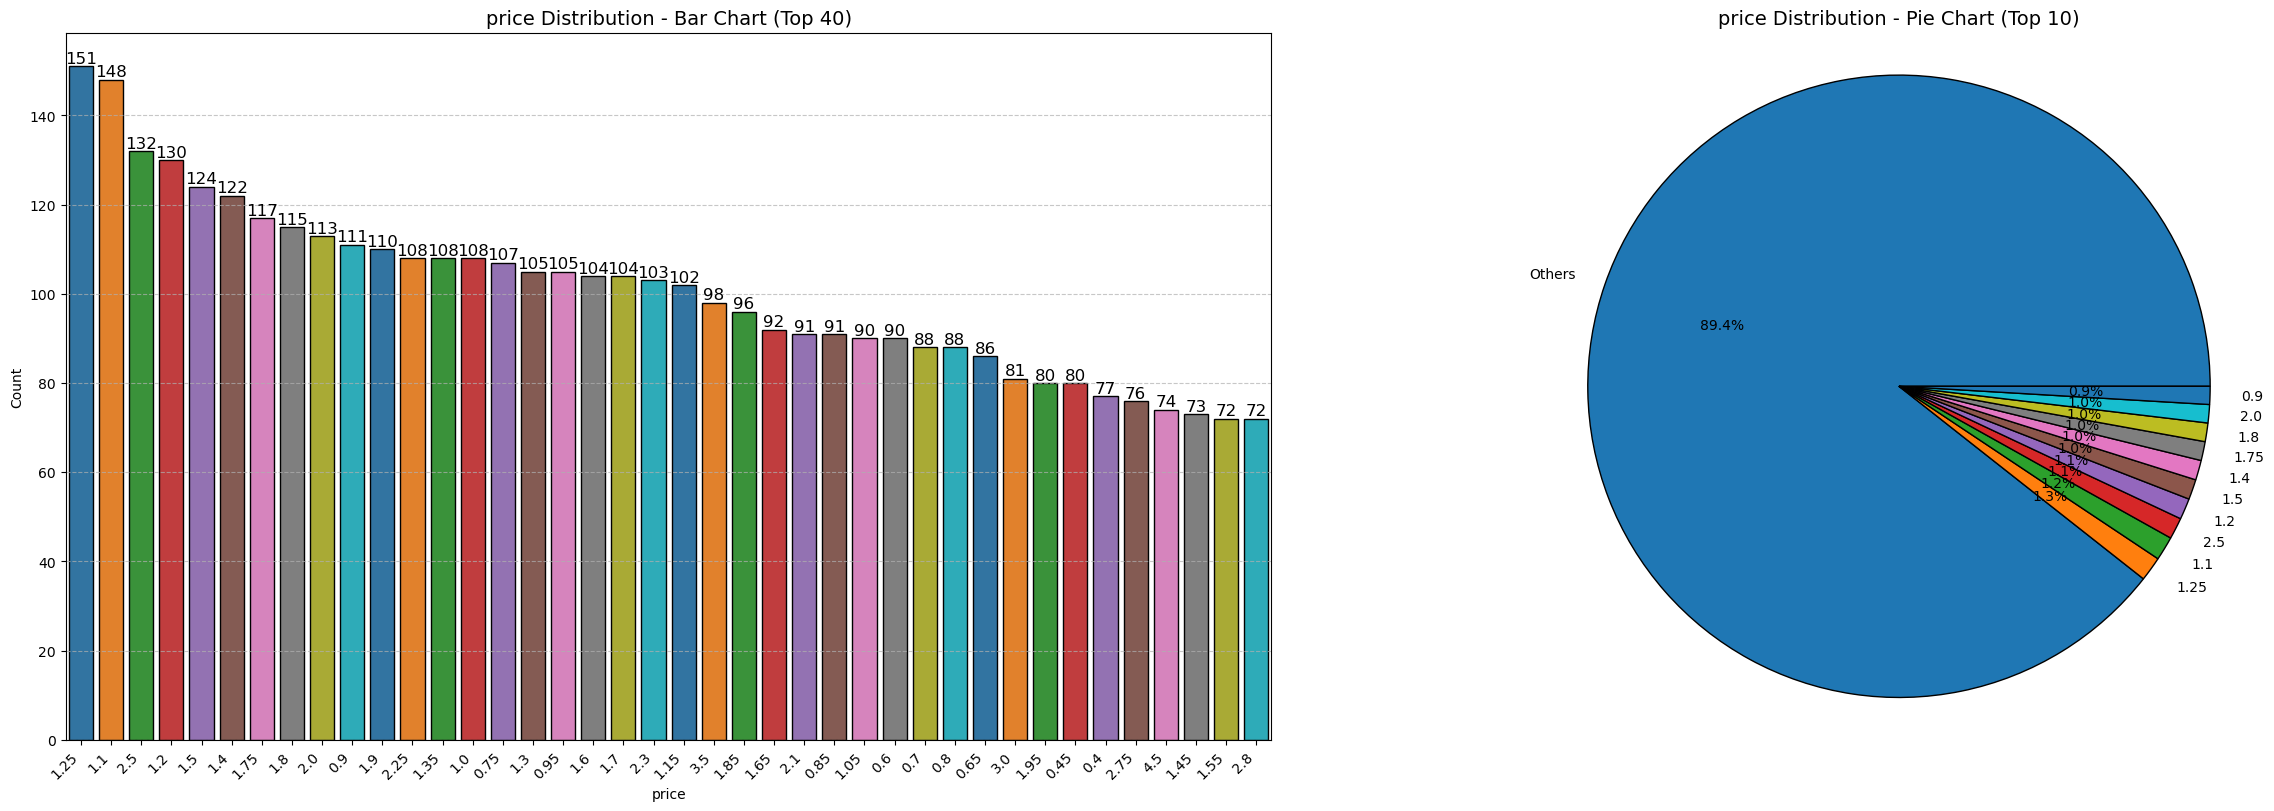

In [18]:
bar_pie_chart_plot(df, 'price', bar_top_n=40, pie_top_n=10)

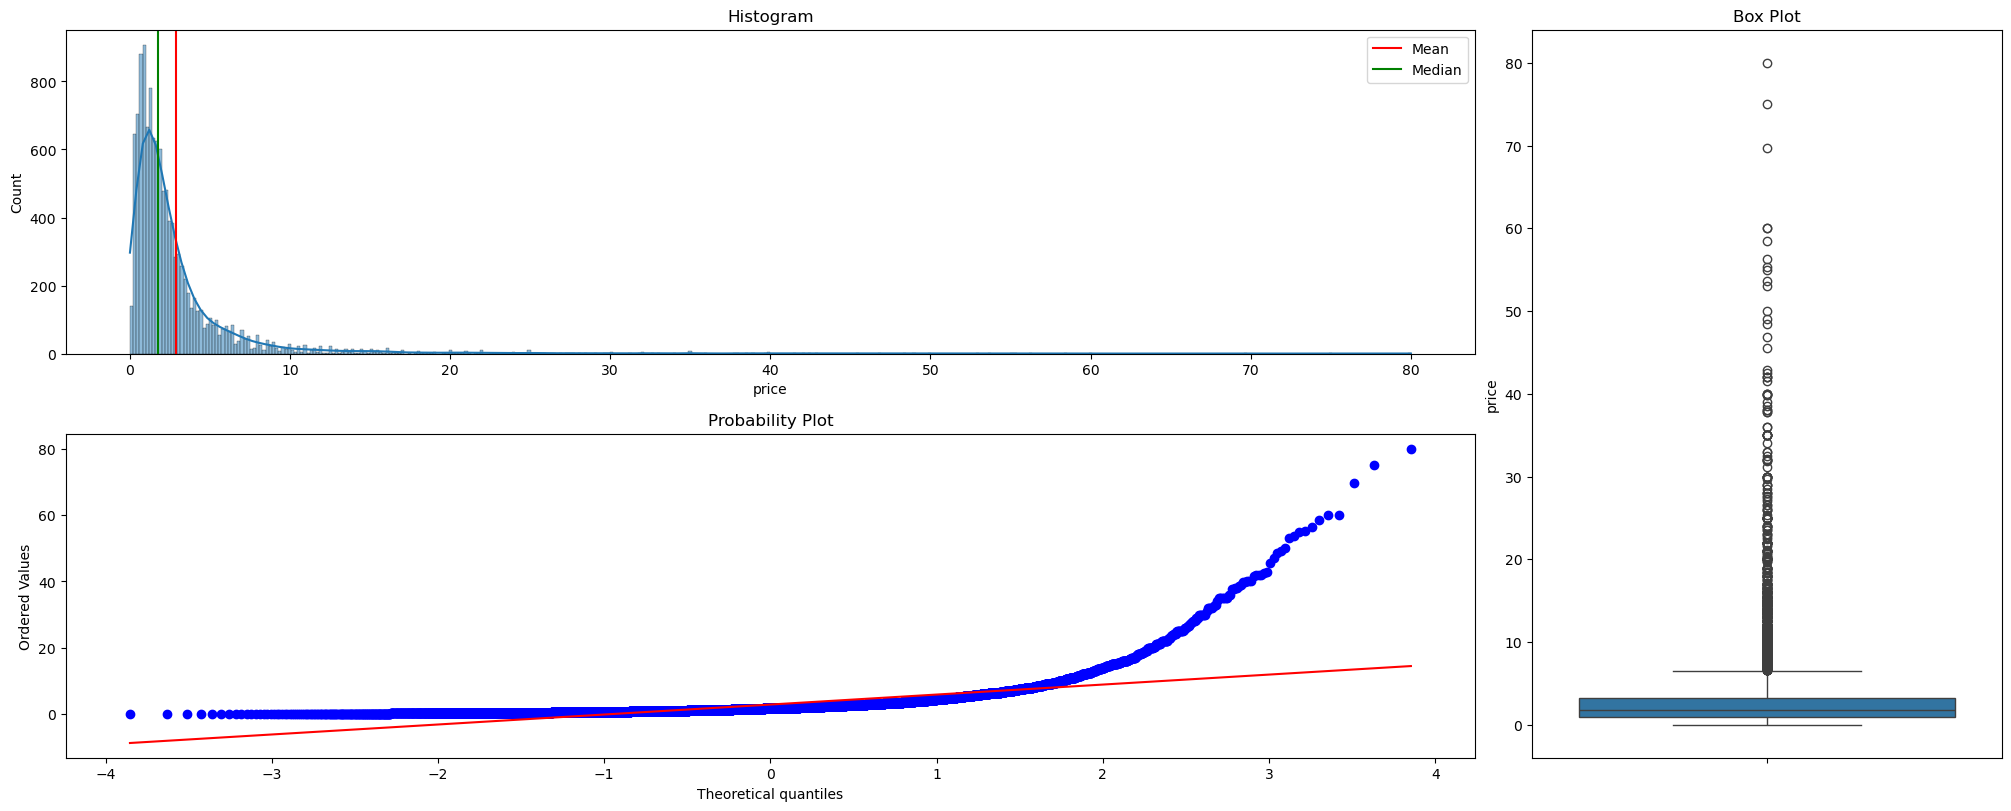

In [19]:
num_three_chart_plot(df, 'price')

`observation`
- Right-skewed distribution → Most prices are in the lower range (below 5 Cr).
- Box plot → Prices above ~10 Cr are likely outliers.
- Majority of prices fall within 0.95–3.2 Cr, with a dense cluster near the median.

In [20]:
quantiles_input = [0.01, 0.05, 0.95, 0.99]  
analyze_distribution(df, 'price', quantiles_input)

skewness : 6.195670
kurtosis : 60.895882
--------------------------------------------------------------------
Q1 (25th percentile): 0.9500
Q3 (75th percentile): 3.2000
IQR: 2.2500
Lower bound: -2.4250
Upper bound: 6.5750
--------------------------------------------------------------------
1th percentile   0.2000
5th percentile   0.3600
95th percentile   8.7500
99th percentile   21.0000


`observation`
- skewness 6.20, which is highly positive
- right-skewed distribution
- kurtosis 60.93, which is extremely high.
- High kurtosis indicates a leptokurtic distribution**(leptokurtic = sample kurtosis -3 > 0 and in leptokurtic we have Heavy tails, sharp peak, more outliers than normal)
- 95% Quantile: 95% of properties are priced below 8.75 crores.
- 99% Quantile: 99% of properties are priced below 21 crores, indicating that very few properties are priced above this value.

`Potential Actions:`
- Consider log transformation or other scaling techniques to reduce skewness.
- Investigate the outliers 
- Use non-parametric statistical methods (e.g., Mann-Whitney U, Spearman correlation) for hypothesis testing or correlations if normality cannot be assumed.

<Axes: xlabel='price'>

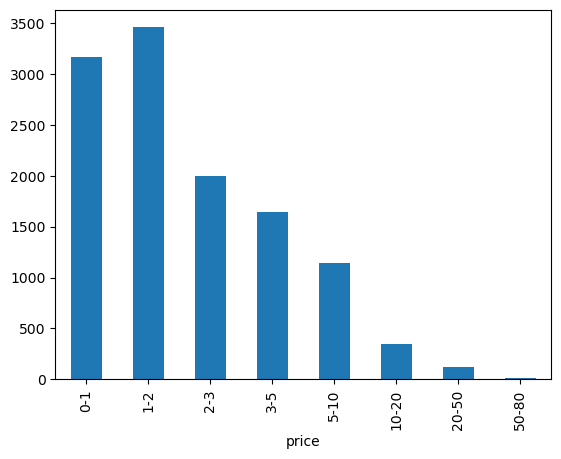

In [21]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50, 80]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50", "50-80"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

`observation`
- The majority of properties are priced in the "0-1","1-2","2-3" and "3-5" crores" ranges.
- There is a noticeable decrease in the number of properties priced above 5 crores.

# Univariate analysis on Numerical columns

In [22]:
#find the numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)
print("-"*100)
print(f'total numerical columns : {len(numerical_columns)}')

Index(['available_units', 'towers', 'locality_rank', 'locality_rating', 'bath',
       'parking', 'price', 'area', 'costpersqft', 'lift', 'flat_on_floor',
       'total_floor', 'balcony', 'bed', 'lattitude', 'longitude', 'emi',
       'project_in_acres'],
      dtype='object')
----------------------------------------------------------------------------------------------------
total numerical columns : 18


# available_units

In [23]:
# no of unique categories and value_counts
analyze_value_counts(df, 'available_units', top_n=5)  

Unique Categories in 'available_units': 589
--------------------------------------------------
available_units
1200.0    172
100.0     146
500.0     116
200.0     105
58.0      100
Name: count, dtype: int64


In [24]:
#missing values and describe
analyze_column(df, 'available_units')

Missing Values in 'available_units': 5218
--------------------------------------------------
count     6676.000000
mean       465.475584
std       1085.788012
min          6.000000
25%        120.000000
50%        282.000000
75%        550.000000
max      40000.000000
Name: available_units, dtype: float64


`observation`    
- 75% of data have less than 550 units.  
- The values suddenly increase, reaching a maximum of 40,000 units, indicate outliers in data.
- The standard deviation is quite large, indicating high variability in the number of available units.
- mean (465.48) > median (282), the data is right-skewed

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


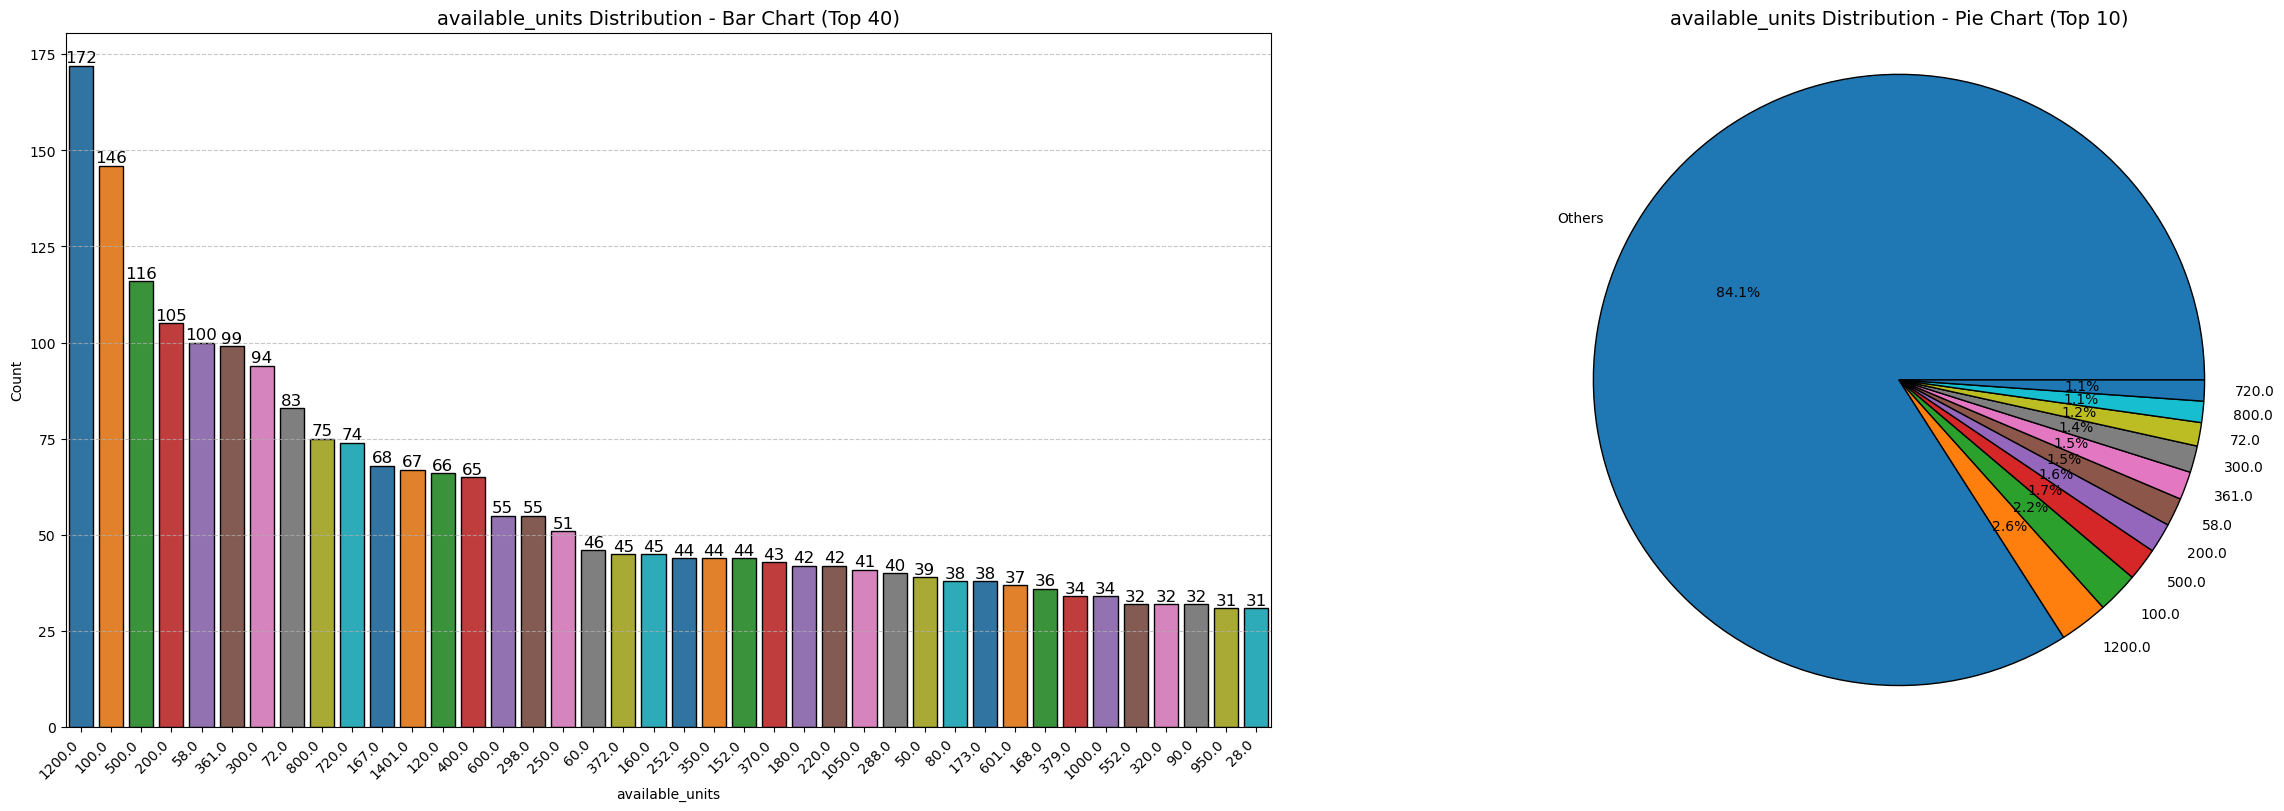

In [25]:
bar_pie_chart_plot(df, 'available_units', bar_top_n=40, pie_top_n=10)

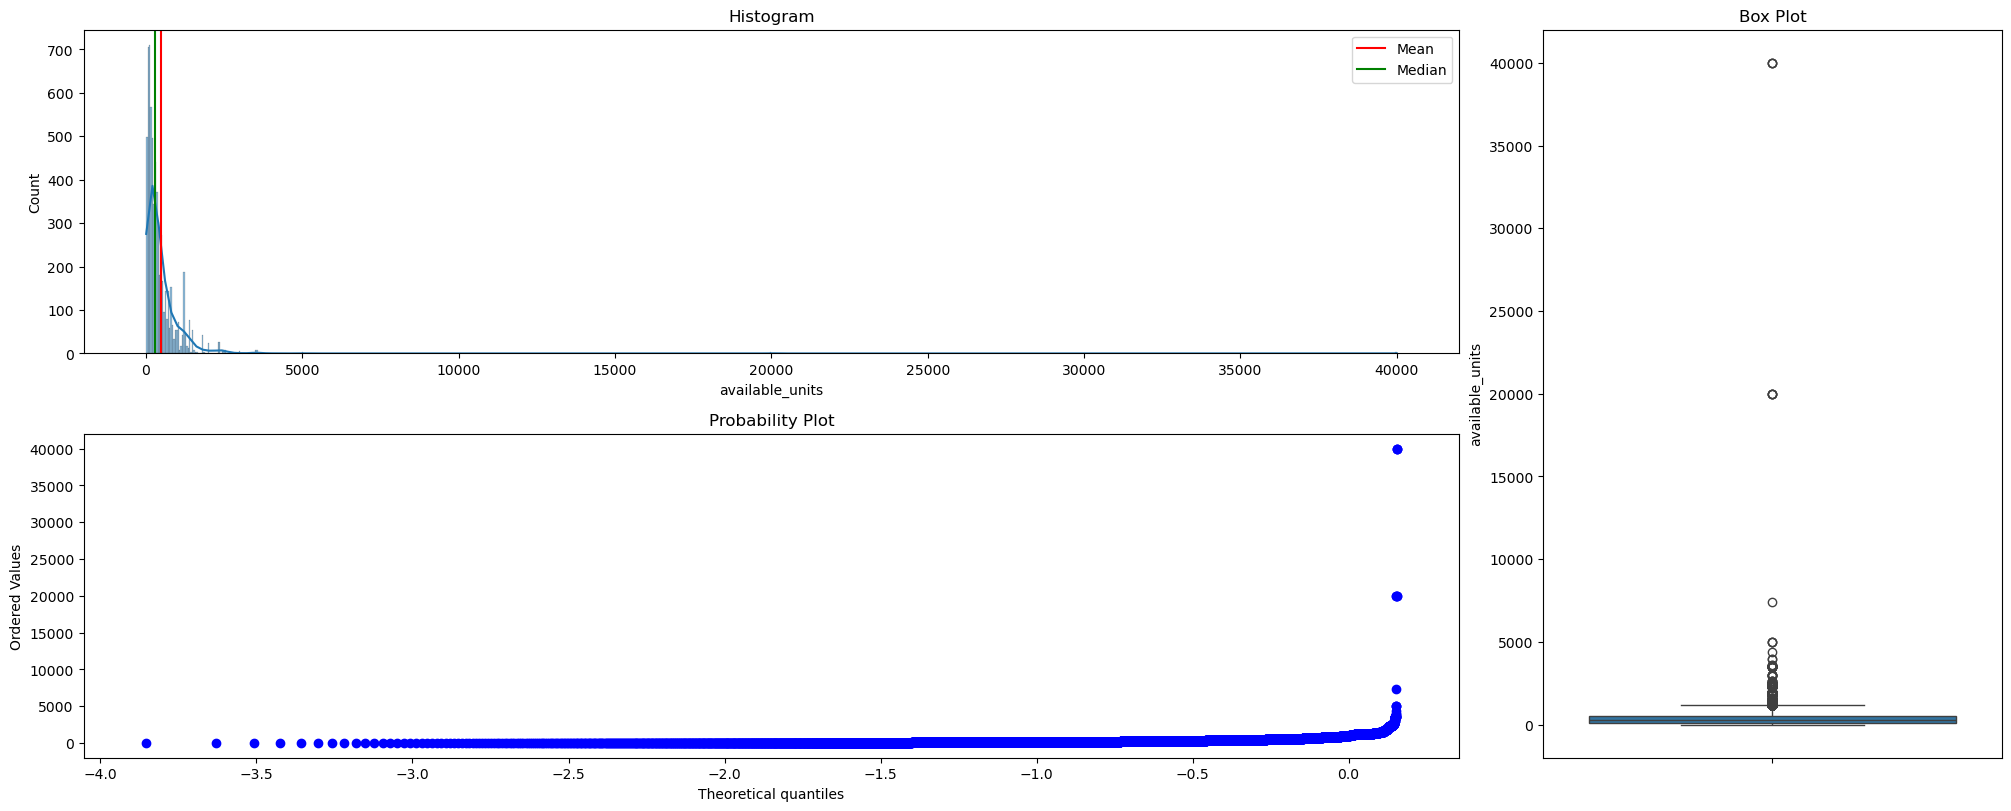

In [26]:
num_three_chart_plot(df, 'available_units')

`observation`  
Histogram: Right-skewed distribution with most values concentrated at the lower end.  
Box Plot: Shows extreme outliers, with most values within a small range.  
Q-Q plot: data points deviate significantly from the normal distribution in the upper range.  

In [27]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'available_units', quantiles_input)

skewness : 25.469442
kurtosis : 851.328151
--------------------------------------------------------------------
Q1 (25th percentile): 120.0000
Q3 (75th percentile): 550.0000
IQR: 430.0000
Lower bound: -525.0000
Upper bound: 1195.0000
--------------------------------------------------------------------
10th percentile   58.0000
75th percentile   550.0000


`observation`
- Few outliers affect the distribution.  
- Positive skewness 25.46 means a right-skewed distribution.  
- kurtosis 851.32 is highly leptokurtic, means heavy tails and many outliers.

# towers

In [28]:
# no of unique categories and value_counts
analyze_value_counts(df, 'towers', top_n=5)  

Unique Categories in 'towers': 42
--------------------------------------------------
towers
1.0    1992
2.0    1193
3.0    1057
5.0     489
4.0     476
Name: count, dtype: int64


In [29]:
#missing values and describe
analyze_column(df, 'towers')

Missing Values in 'towers': 5026
--------------------------------------------------
count    6868.000000
mean        4.624199
std         6.940877
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       200.000000
Name: towers, dtype: float64


`observation`
- Mean (4.62) > Median (3) → Right-skewed distribution.
- Std (6.94) → High variability in tower counts.
- 75% (5), Max (200) → Large range, potential outliers.
- 25% (1), 75% (5) → 50% of data falls between 1 and 5 towers

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


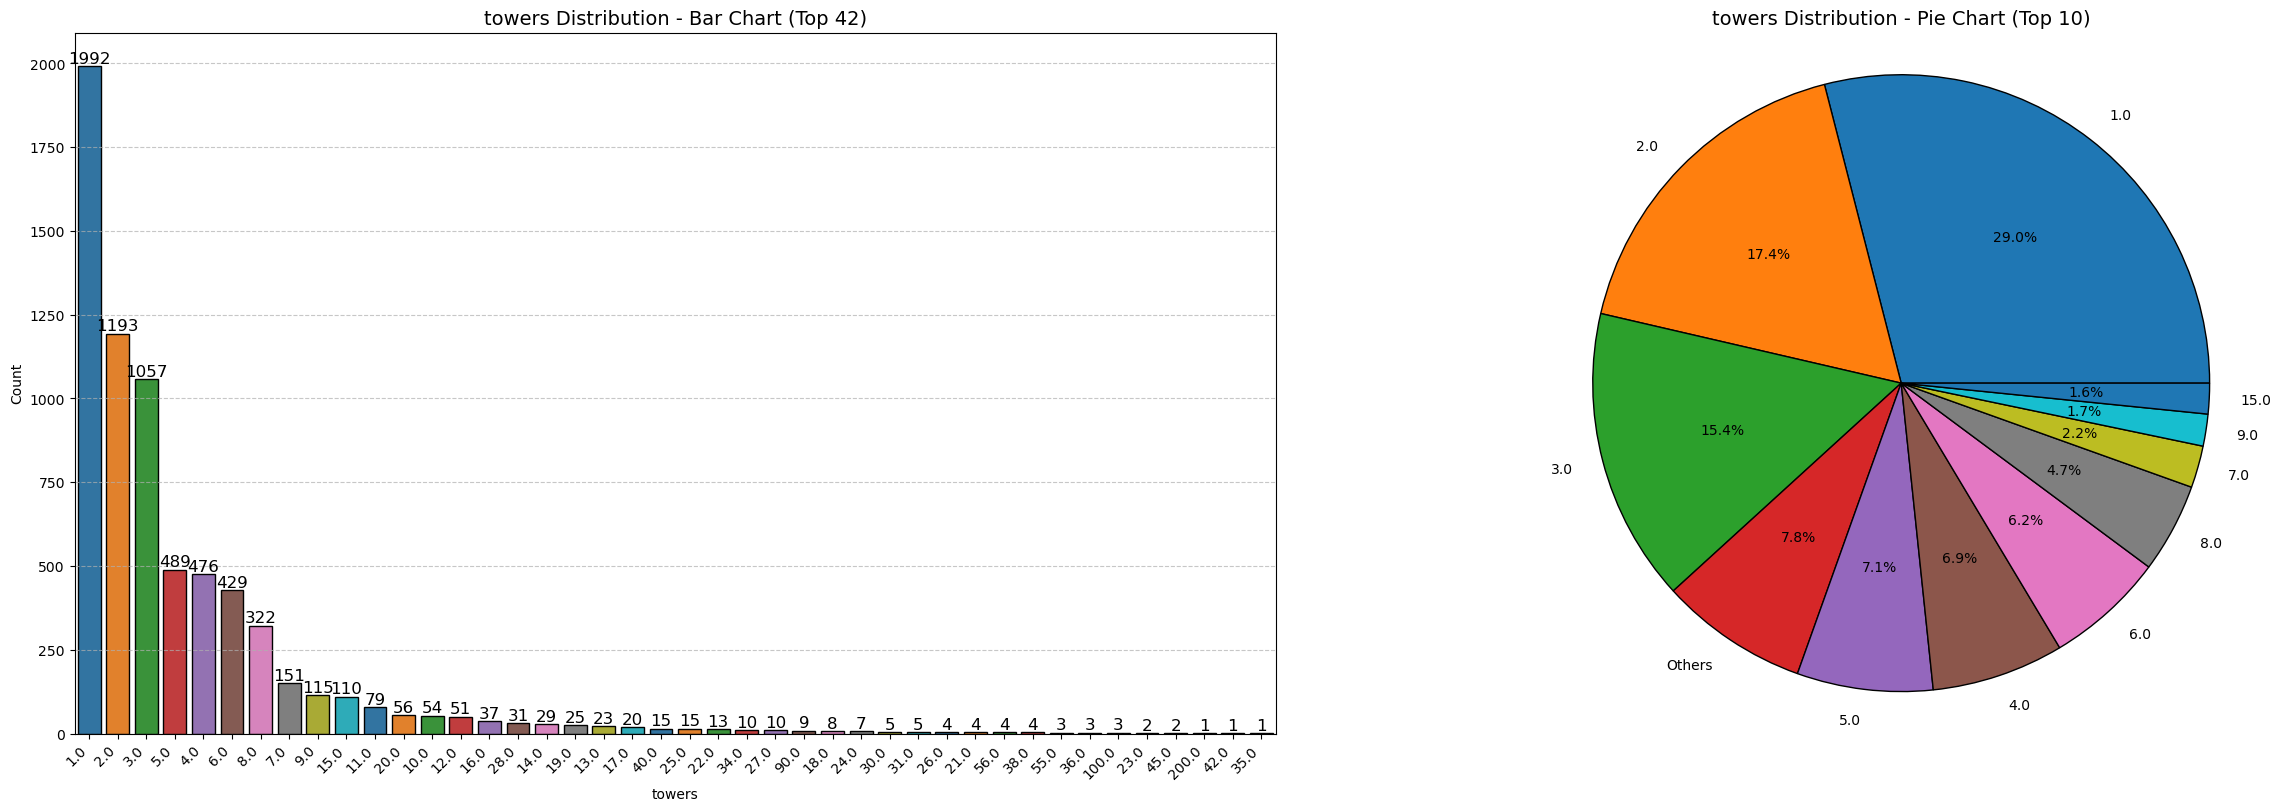

In [30]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'towers', bar_top_n=42, pie_top_n=10)

`observation`
- 5026 missing values
- most of the builders make less than 9 towers
- The highest frequency is observed for lower values of towers (e.g., 1, 2, or 3 towers).
- As the number of towers increases, the frequency decreases significantly.
- The distribution is right-skewed.

In [31]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'towers',9, 0.90)

Top 9 cumulative values:
towers
1.0    0.290041
2.0    0.463745
3.0    0.617647
5.0    0.688847
4.0    0.758154
6.0    0.820617
8.0    0.867501
7.0    0.889487
9.0    0.906232
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 9 Properties below 90.0% percentile: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


`observation`
- 90% of properties have less than 9 towers 

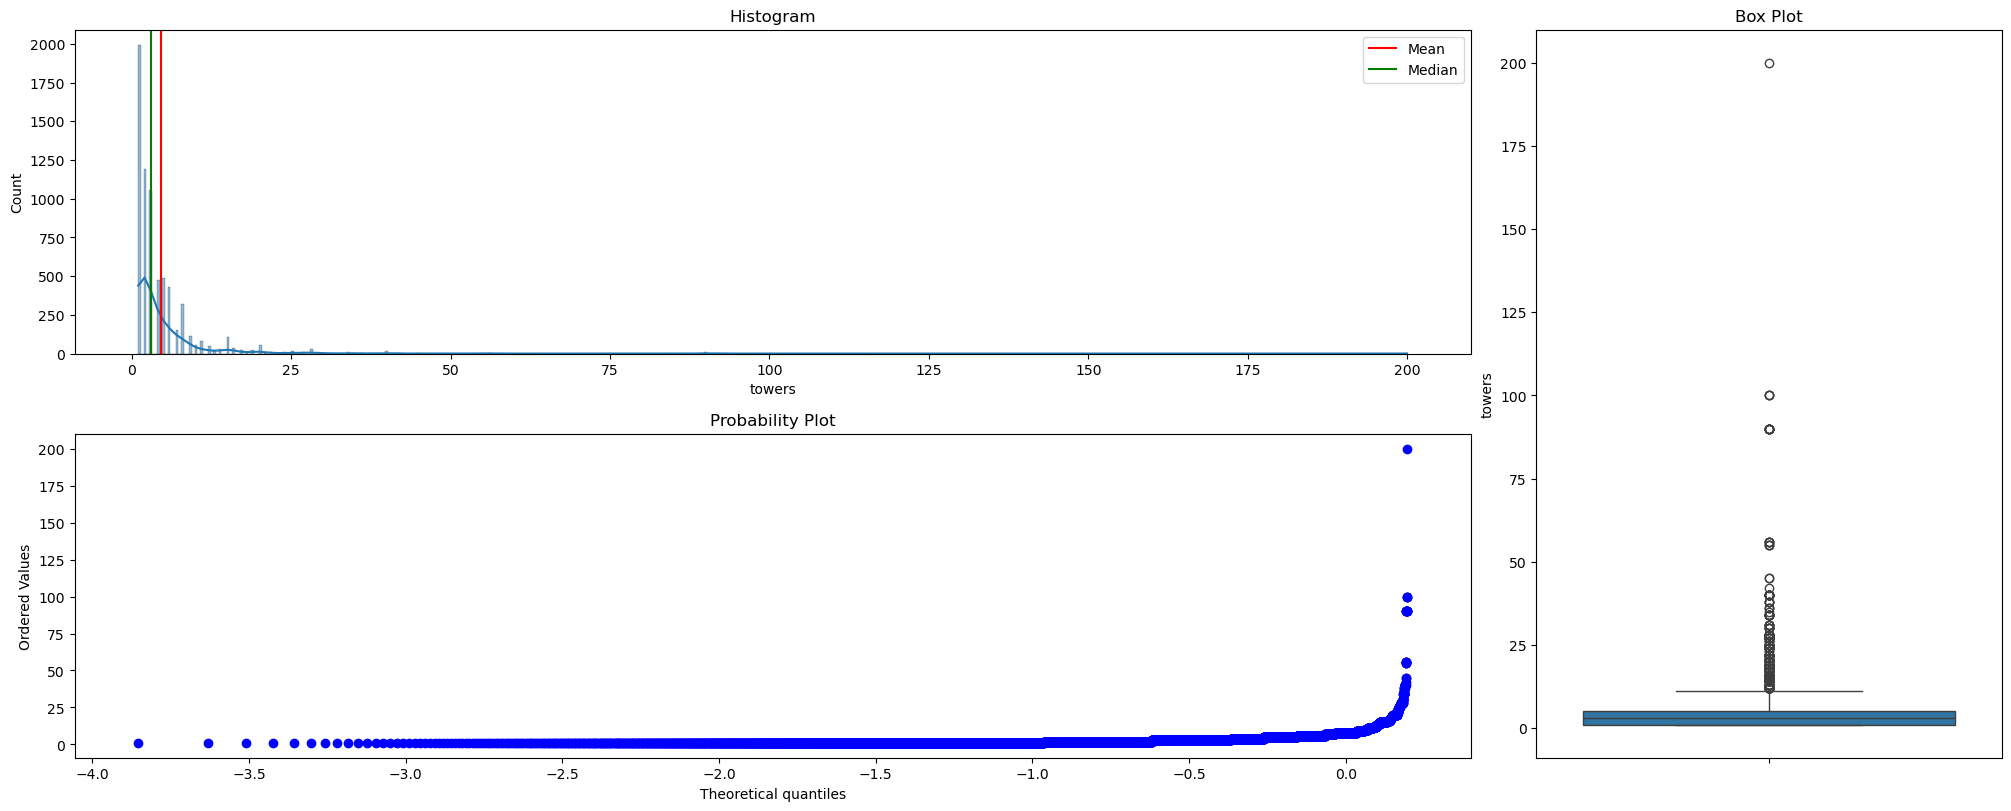

In [32]:
num_three_chart_plot(df, 'towers')

In [33]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'towers', quantiles_input)

skewness : 8.476354
kurtosis : 141.936226
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 5.0000
IQR: 4.0000
Lower bound: -5.0000
Upper bound: 11.0000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   5.0000


`Observation`
- there are few outliers which affect the whole distribution
- A positive skewness value (like 8.47) suggests a heavily right-skewed distribution, meaning there are extreme high values in the dataset pulling the tail to the right.
- A high kurtosis value (like 141.86) indicates that the distribution has heavy tails and possibly significant outliers.

# locality_rank

In [34]:
# no of unique categories and value_counts
analyze_value_counts(df, 'locality_rank', top_n=5)  

Unique Categories in 'locality_rank': 179
--------------------------------------------------
locality_rank
186.0    412
4.0      372
46.0     336
8.0      301
155.0    291
Name: count, dtype: int64


In [35]:
#missing values and describe
analyze_column(df, 'locality_rank')

Missing Values in 'locality_rank': 3831
--------------------------------------------------
count    8063.000000
mean      122.406424
std       126.565803
min         1.000000
25%        16.000000
50%        92.000000
75%       186.000000
max       839.000000
Name: locality_rank, dtype: float64


`observation`
- 3831 missing values
- Min rank is 1, max is 839.  
- Mean rank is 122.38, median is 92 (right-skewed).  
- 25% of localities have ranks ≤ 16; 50% ≤ 92.  
- Standard deviation is 126.50; high variability.  
- Data covers 1–839 ranks

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


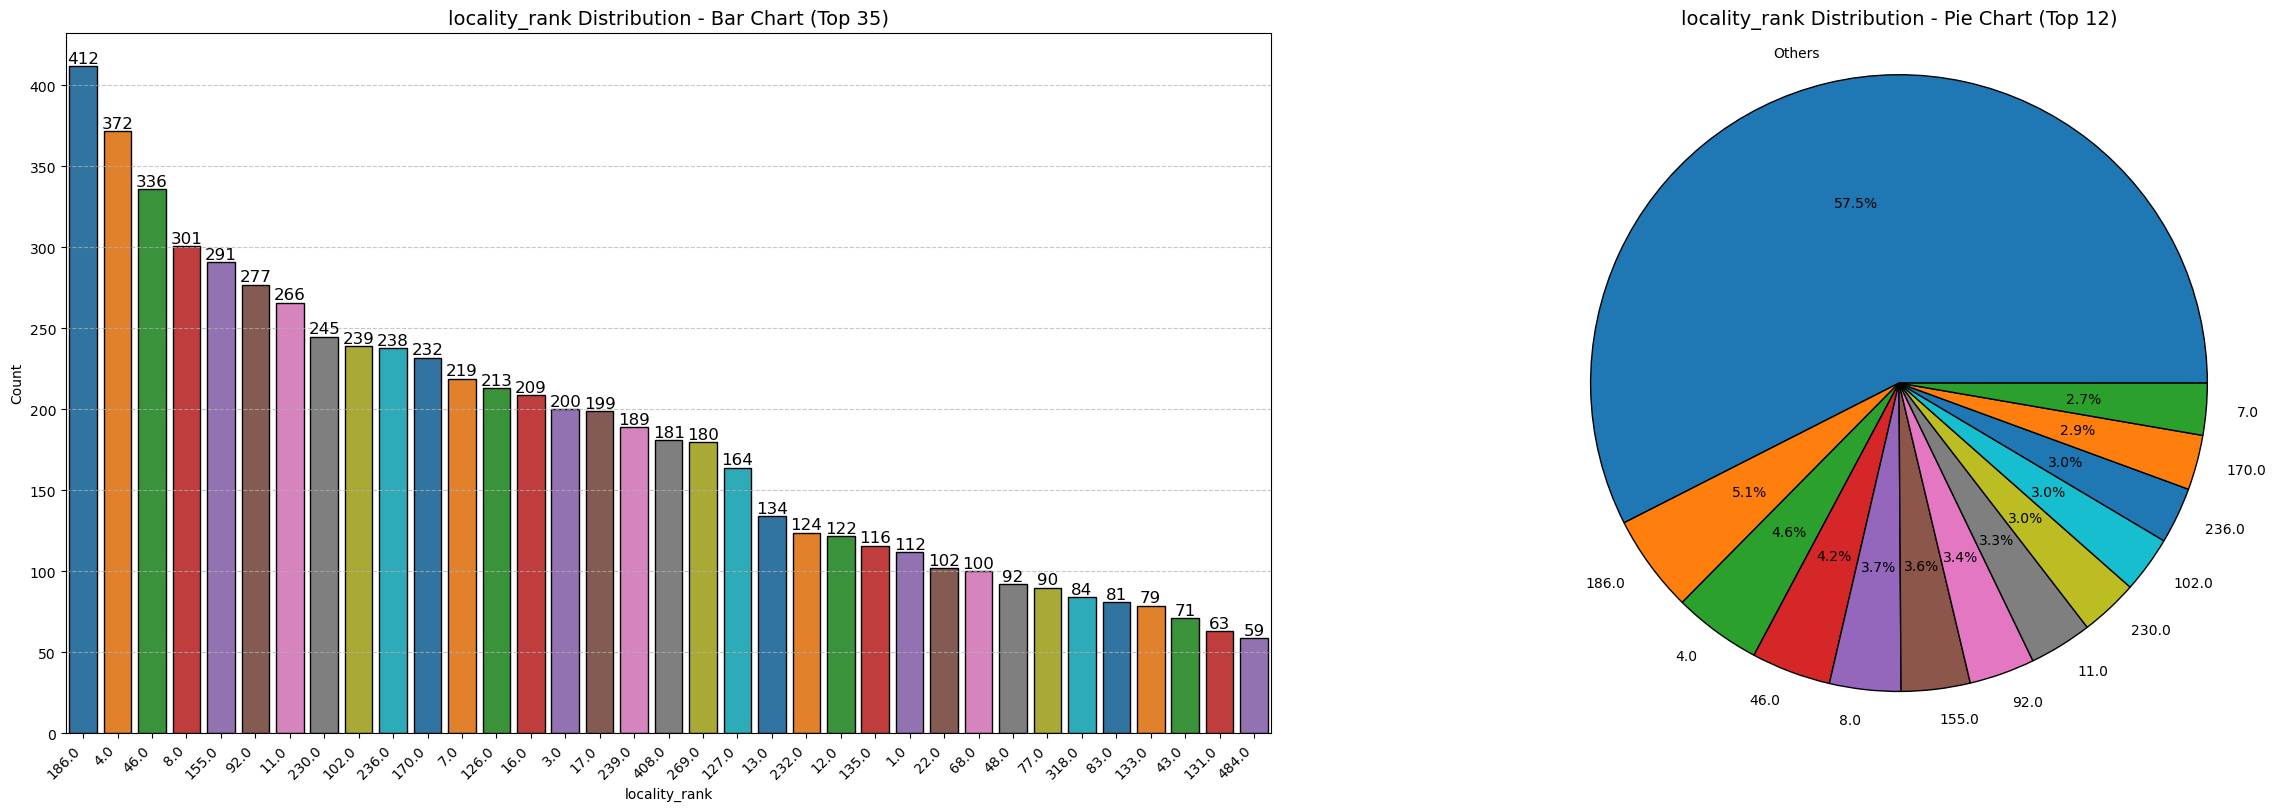

In [36]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'locality_rank', bar_top_n=35, pie_top_n=12)

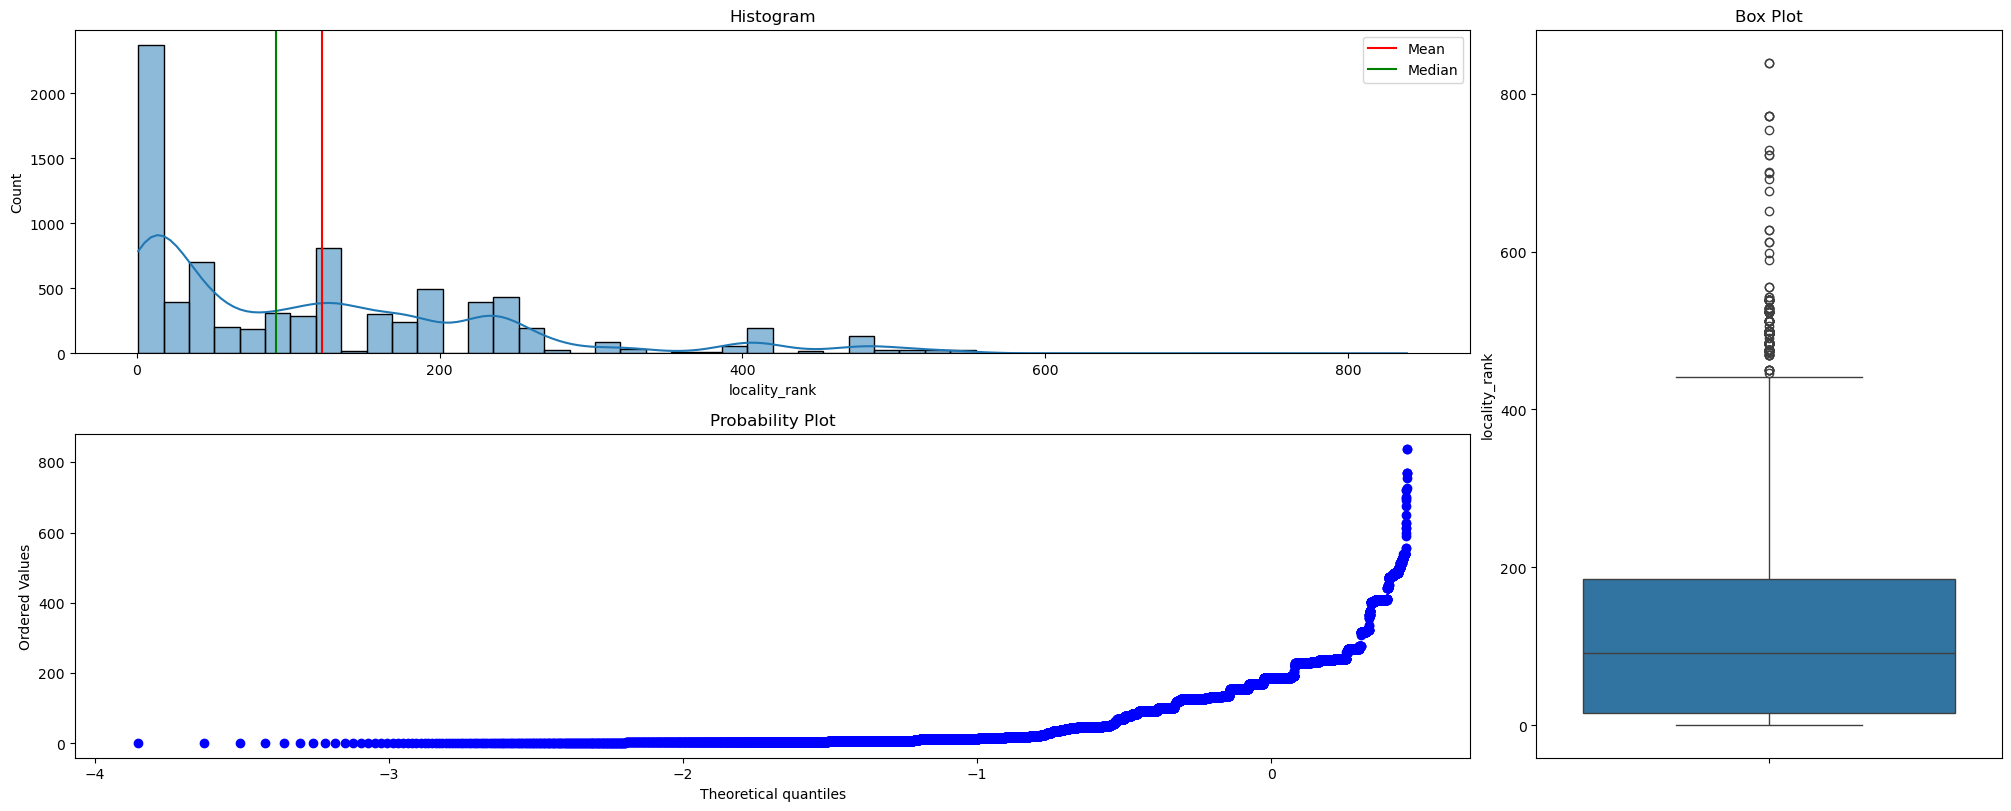

In [37]:
num_three_chart_plot(df, 'locality_rank')

`observation`
- The distribution is right-skewed, with most localities having lower ranks.
- A significant number of localities have ranks close to 1–50.
- Ranks above 200 are relatively sparse, with a gradual decline towards the maximum rank (839).
- The highest frequency is observed for ranks near 1.
- The presence of multiple peaks indicates possible clustering in locality ranks.

`observations`
- The IQR (blue box) lies between ranks 16 and 186.
- The median rank is approximately 92.
- Ranks above 400 are outliers, with a few reaching the maximum rank (839).
- The distribution is right-skewed, as evident from the longer whisker on the upper side.
- Most data points are concentrated in the lower rank range (1–200).

In [38]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'locality_rank', quantiles_input)

skewness : 1.399060
kurtosis : 1.997224
--------------------------------------------------------------------
Q1 (25th percentile): 16.0000
Q3 (75th percentile): 186.0000
IQR: 170.0000
Lower bound: -239.0000
Upper bound: 441.0000
--------------------------------------------------------------------
10th percentile   6.0000
75th percentile   186.0000


`observation`
- Skewness (1.398): The data is positively skewed, with a longer tail on the right.  
- Most locality ranks are concentrated at lower values.
- Kurtosis (1.997): The distribution has light tails compared to a normal distribution (kurtosis < 3).  
- Indicates fewer extreme outliers than a heavy-tailed distribution.  

# locality_rating

In [39]:
# no of unique categories and value_counts
analyze_value_counts(df, 'locality_rating', top_n=5)  

Unique Categories in 'locality_rating': 26
--------------------------------------------------
locality_rating
4.1    2021
4.0    1950
3.9    1535
4.2    1366
3.8    1128
Name: count, dtype: int64


In [40]:
#missing values and describe
analyze_column(df, 'locality_rating')

Missing Values in 'locality_rating': 464
--------------------------------------------------
count    11430.000000
mean         3.759361
std          1.067680
min          0.000000
25%          3.900000
50%          4.000000
75%          4.200000
max          5.000000
Name: locality_rating, dtype: float64


`observation`
- 464 missing values
- Min locality_rating is 0, max is 5.  
- Mean locality_rating is 3.75, median is 4
- 25% of locality_rating have rating ≤ 3.90; 50% ≤ 4.0.  
- Standard deviation is 1.06; indicating moderate to high variability in ratings.
- Data covers 0–5 continuous rating out of 5 rating.  

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


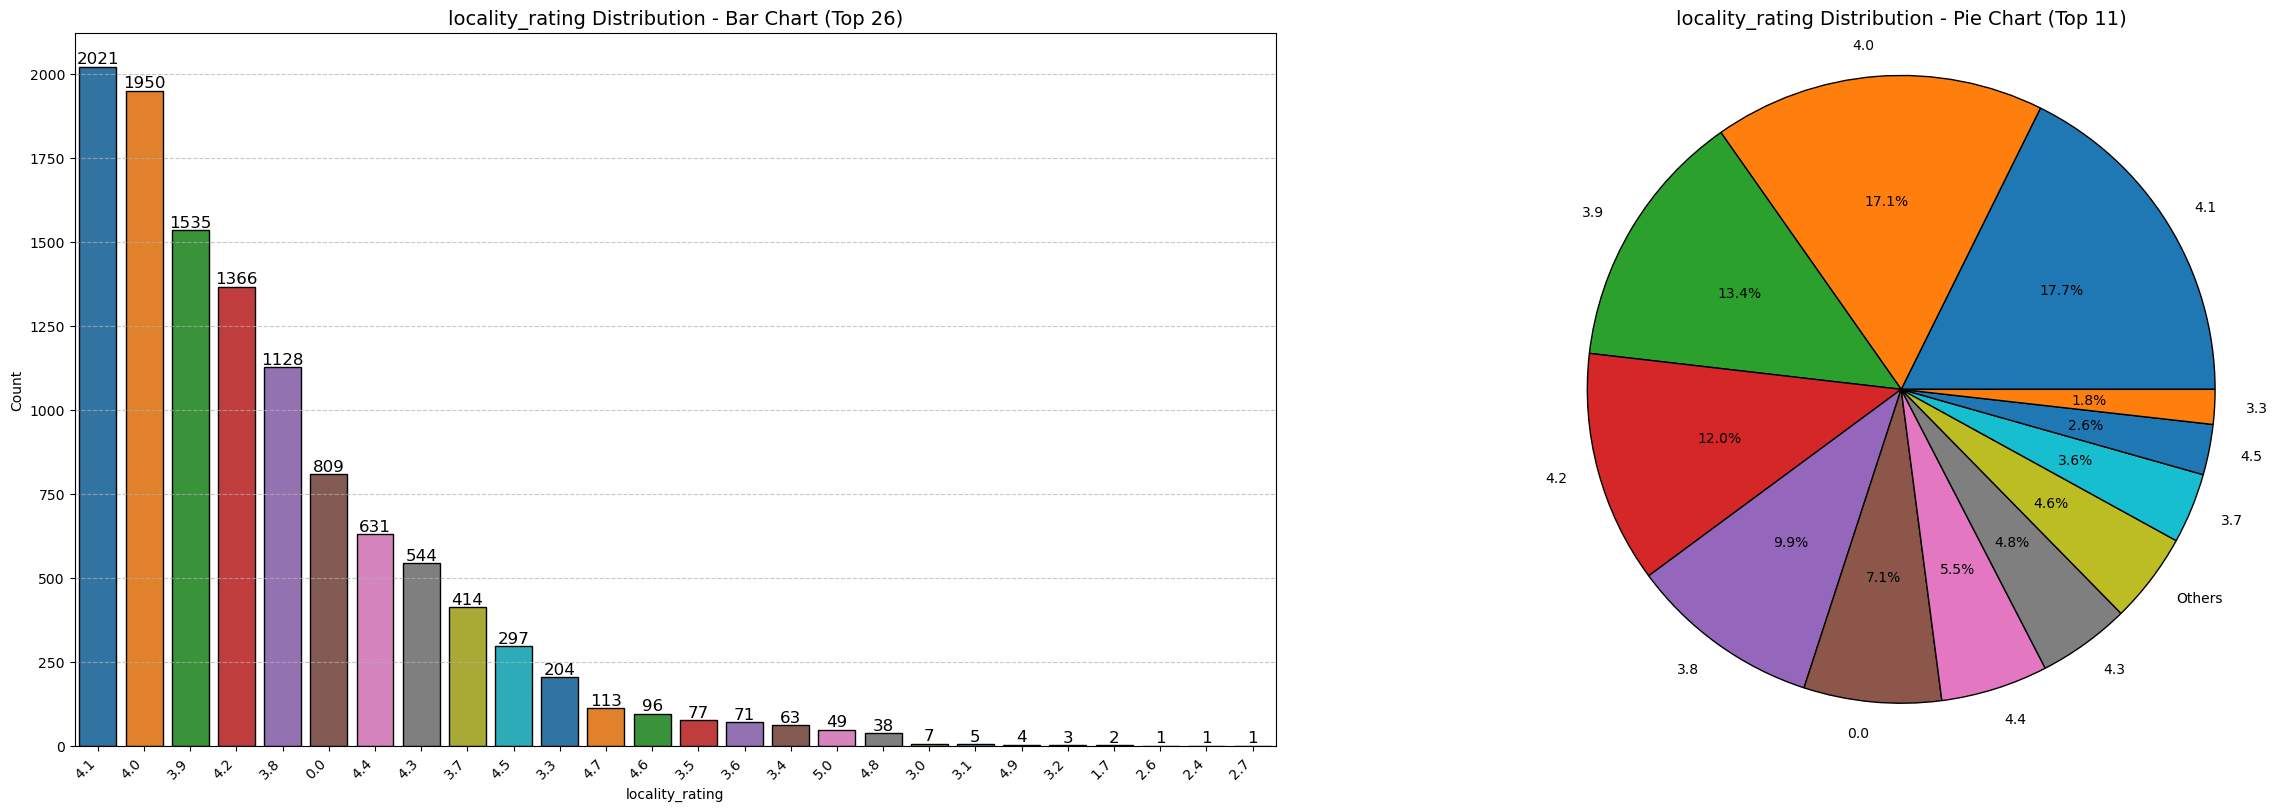

In [41]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'locality_rating', bar_top_n=26, pie_top_n=11)

In [42]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'locality_rating',9, 0.90)

Top 9 cumulative values:
locality_rating
4.1    0.176815
4.0    0.347419
3.9    0.481715
4.2    0.601225
3.8    0.699913
0.0    0.770691
4.4    0.825897
4.3    0.873491
3.7    0.909711
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 9 Properties below 90.0% percentile: [0.0, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]


`observation`  
- 90% of the properties have this ratings [0.0, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4]

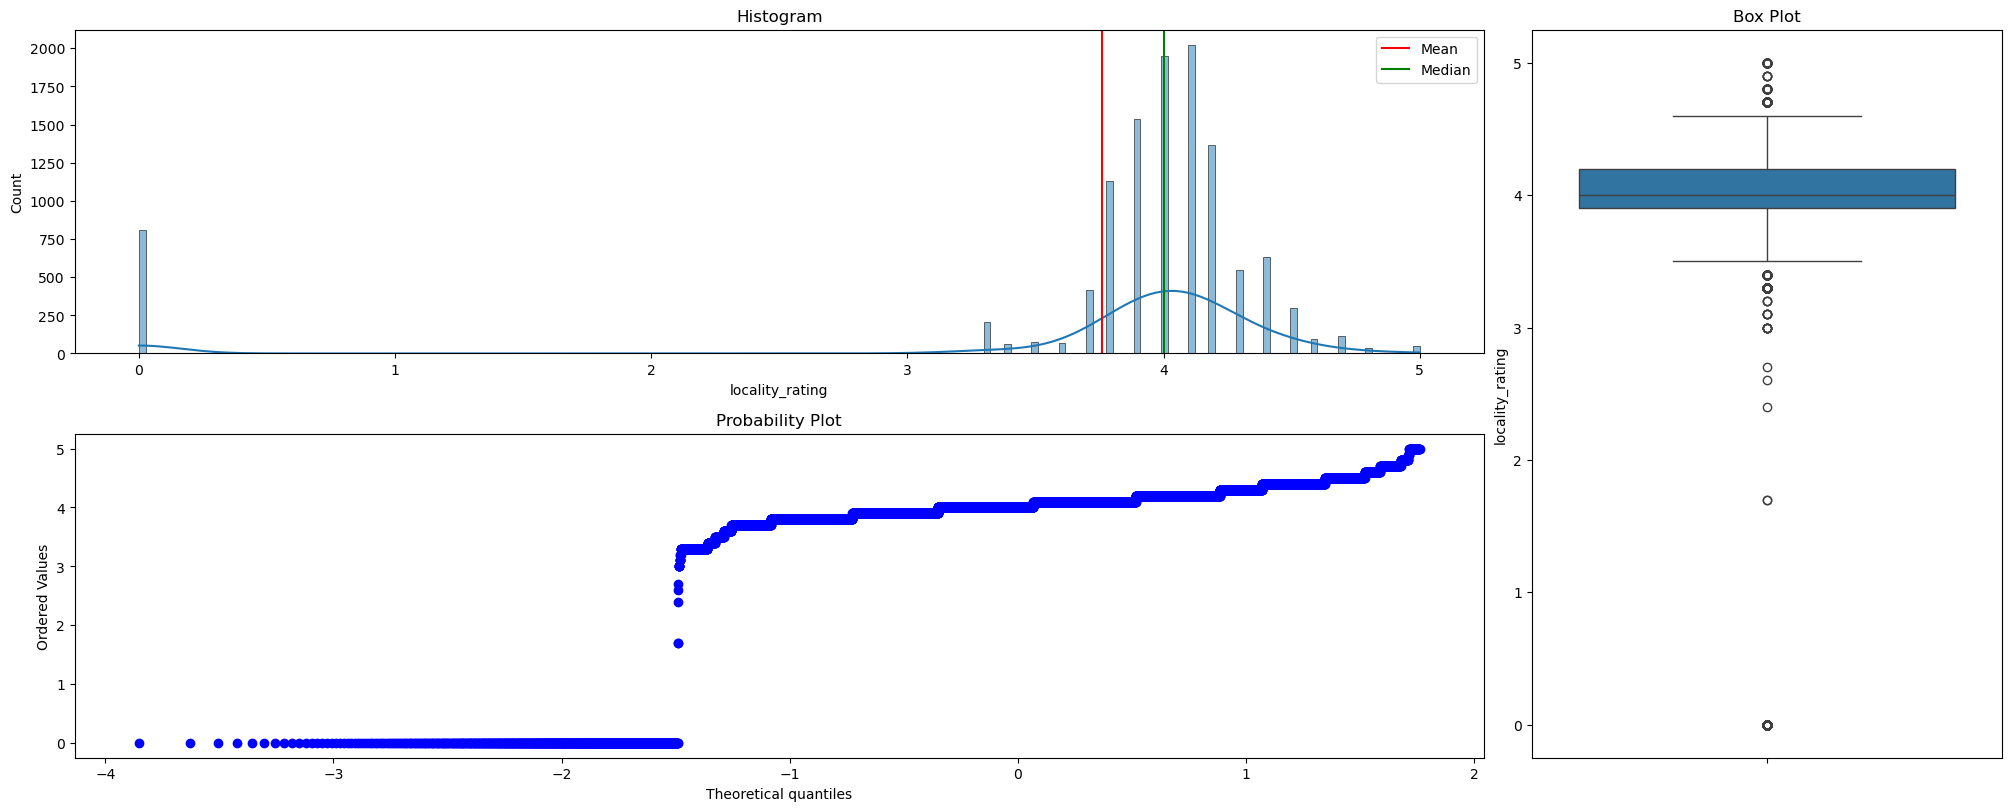

In [43]:
num_three_chart_plot(df, 'locality_rating')

`observation`
- The ratings are concentrated between 3.8 and 4.3, with a peak at 4.0-4.1.
- The distribution is slightly left-skewed, indicating more high ratings than low.
- Outliers at extremes (e.g., 0.0, 1.0, >4.8) are minimal and infrequent.

`observation`
- the iqr blue box lies between 3.90 and 4(50% data)
- the median rank is 4.00
- rating below 3.5 and above 4.65 are outliers
- iqr 0.3 indicate middle 50% of the ratings are tightly clustered, suggesting low variability in this range.
- The distribution is left-skewed, as slightly longer whisker from the lower side

In [44]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'locality_rating', quantiles_input)

skewness : -3.030003
kurtosis : 7.931393
--------------------------------------------------------------------
Q1 (25th percentile): 3.9000
Q3 (75th percentile): 4.2000
IQR: 0.3000
Lower bound: 3.4500
Upper bound: 4.6500
--------------------------------------------------------------------
10th percentile   3.5000
75th percentile   4.2000


`observation`
- -3.03 negative skewness indicates strong left-skewed distribution caused by small number of low ratings pulling the tail to the left
- kurtosis > 3 leptokurtic distribution. This reflects a sharp peak and heavy tails, meaning there are more extreme values (outliers) compared to a normal distribution.
- try to apply transformations like reglection transform ,power transform,Box-Cox or Yeo-Johnson Transform

# bath

In [45]:
# no of unique categories and value_counts
analyze_value_counts(df, 'bath', top_n=10)  

Unique Categories in 'bath': 10
--------------------------------------------------
bath
2.0    6556
3.0    2484
1.0    1651
4.0     781
5.0     278
Name: count, dtype: int64


`observation`  
- from count column we can say that it is imbalance data   
- 3 ways we can handle this as : 1)Group bathrooms ≥6 into one category  
                                 2)If not relevant, consider removing these rows.  
                                 3)Log Transformation – Reduce the impact of large values for better model stability.  

In [46]:
#missing values and describe
analyze_column(df, 'bath')

Missing Values in 'bath': 30
--------------------------------------------------
count    11864.000000
mean         2.315324
std          0.963525
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bath, dtype: float64


`observation`
- Mean (2.32) ≈ Median (2) → Nearly symmetric distribution.
- Std (0.96) → Moderate spread in values.
- Min (1), Max (10) → Values range from 1 to 10.
- IQR (1) → 50% of values lie between 2 and 3 baths.
- Most common values: Likely 2 or 3 baths, as indicated by 25th and 75th percentiles.
- Potential outliers: Values close to 10 may be outliers

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


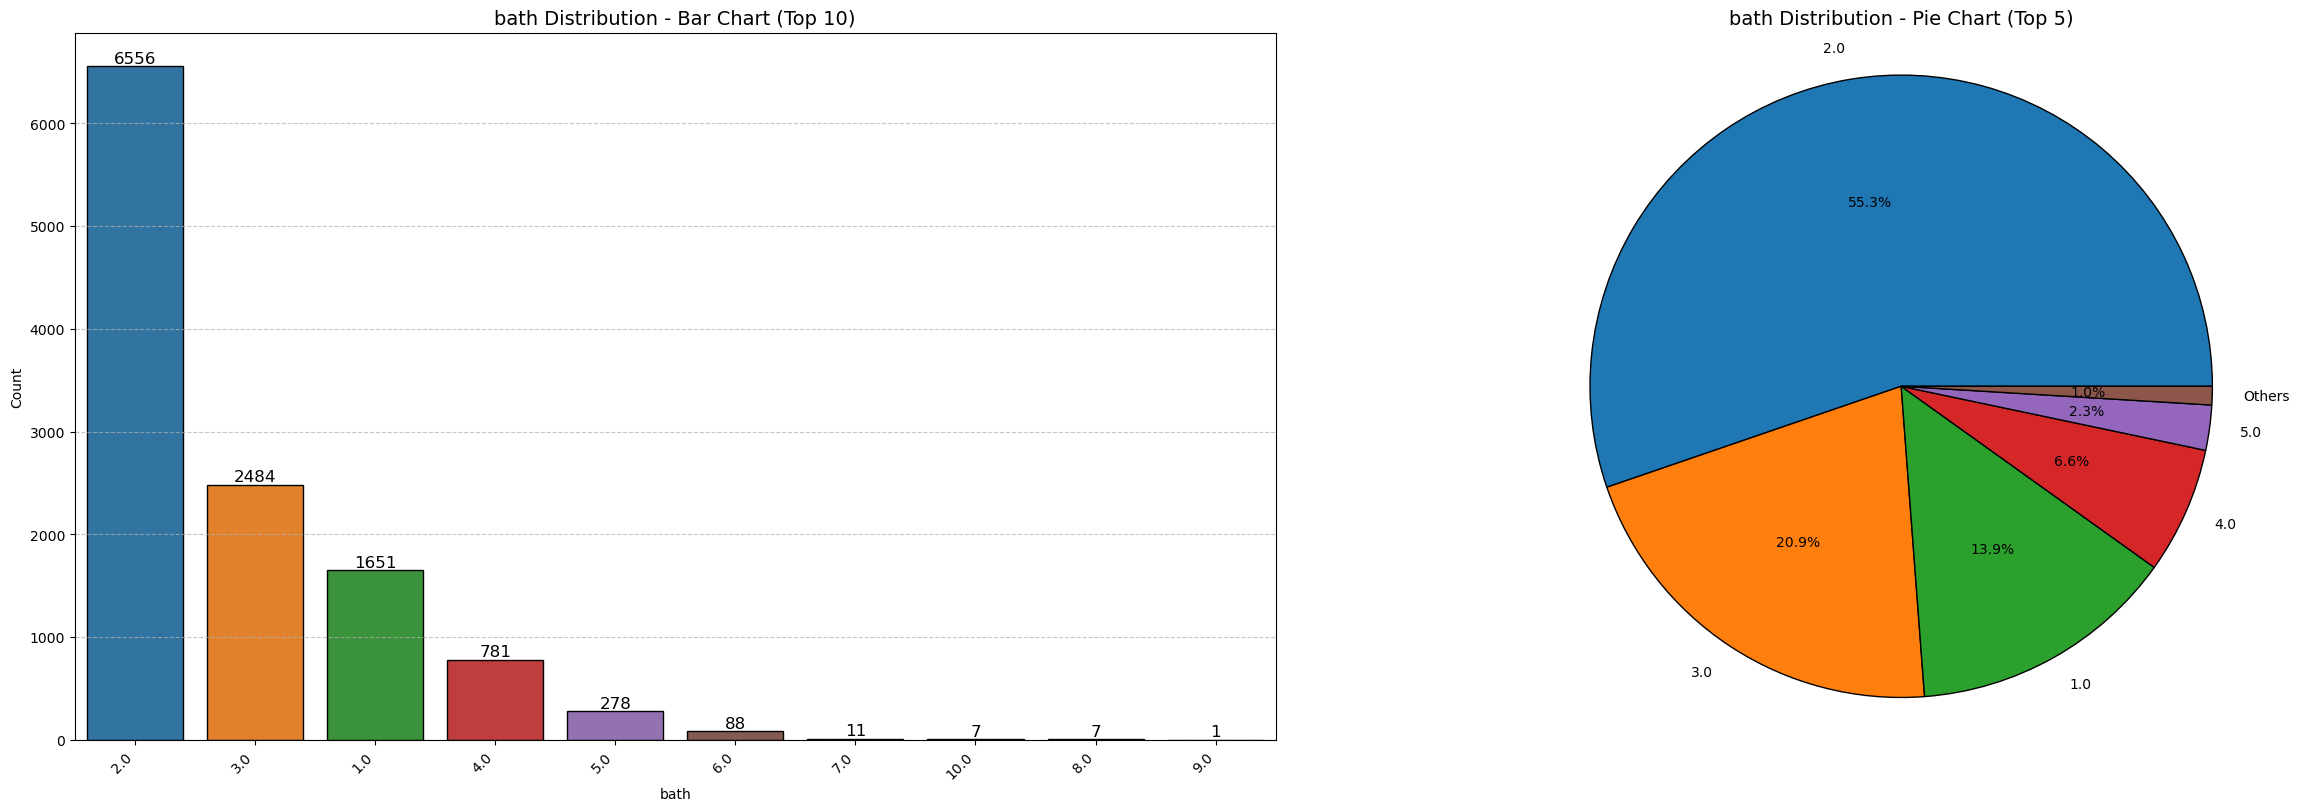

In [47]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'bath', bar_top_n=10, pie_top_n=5)

In [48]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'bath',10, 0.90)

Top 10 cumulative values:
bath
2.0     0.552596
3.0     0.761969
1.0     0.901129
4.0     0.966959
5.0     0.990391
6.0     0.997808
7.0     0.998736
10.0    0.999326
8.0     0.999916
9.0     1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 3 Properties below 90.0% percentile: [1.0, 2.0, 3.0]


`observation`
- 30 missing values
- below 90% properties have 1,2,3 and 99% of the properties have 1,2,3,4 and 5 bathrooms.
- 55% properties have 2 bathrooms

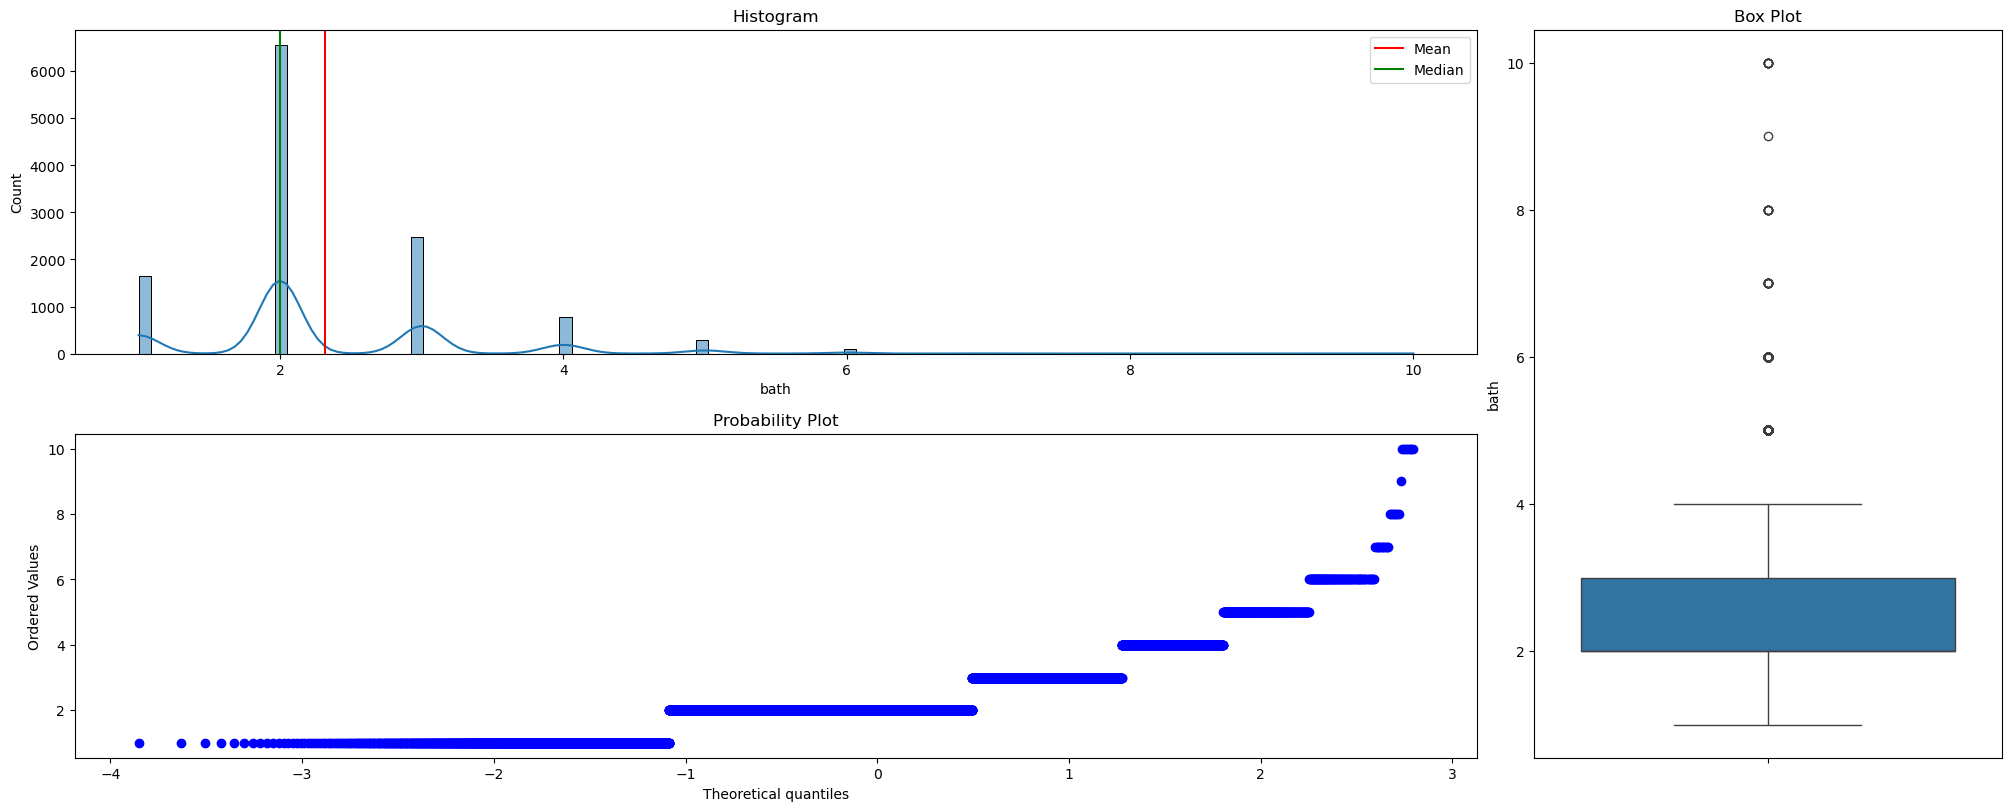

In [49]:
num_three_chart_plot(df, 'bath')

`observation`
- Histogram: Right-skewed, peaks at 2 and 3 baths, outliers inflate the mean.
- Box Plot: Most values 1-4 baths, 6+ are outliers.
- Probability Plot: Discrete distribution, right tail deviates.

In [50]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'bath', quantiles_input)

skewness : 1.530905
kurtosis : 4.976457
--------------------------------------------------------------------
Q1 (25th percentile): 2.0000
Q3 (75th percentile): 3.0000
IQR: 1.0000
Lower bound: 0.5000
Upper bound: 4.5000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   3.0000


`observation`
- Skewness (1.53): Right-skewed distribution.
- Kurtosis (4.98): Leptokurtic distribution,Higher peak and heavier tails than normal.
- IQR (1.0): Most values between 2 and 3 baths.
- Outliers: Values >4.5 baths are outliers.
- 10th percentile (1.0): 10% have ≤1 bath.
- 75th percentile (3.0): 75% have ≤3 baths.

# parking

In [51]:
# no of unique categories and value_counts
analyze_value_counts(df, 'parking', top_n=5)  

Unique Categories in 'parking': 10
--------------------------------------------------
parking
1.0    3959
2.0    1350
3.0     243
4.0      82
5.0      17
Name: count, dtype: int64


In [52]:
#missing values and describe
analyze_column(df, 'parking')

Missing Values in 'parking': 6232
--------------------------------------------------
count    5662.000000
mean        1.392088
std         0.722071
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: parking, dtype: float64


`observation`
- Mean (1.39) ≈ Median (1) → Skewed distribution, more values near 1.
- Std (0.72) → Moderate spread in values.
- Min (1), Max (12) → Values range from 1 to 12.
- Most common value: Likely 1, as indicated by 25th and 50th percentiles.
- Potential outliers: Values close to 12 may be outliers.

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


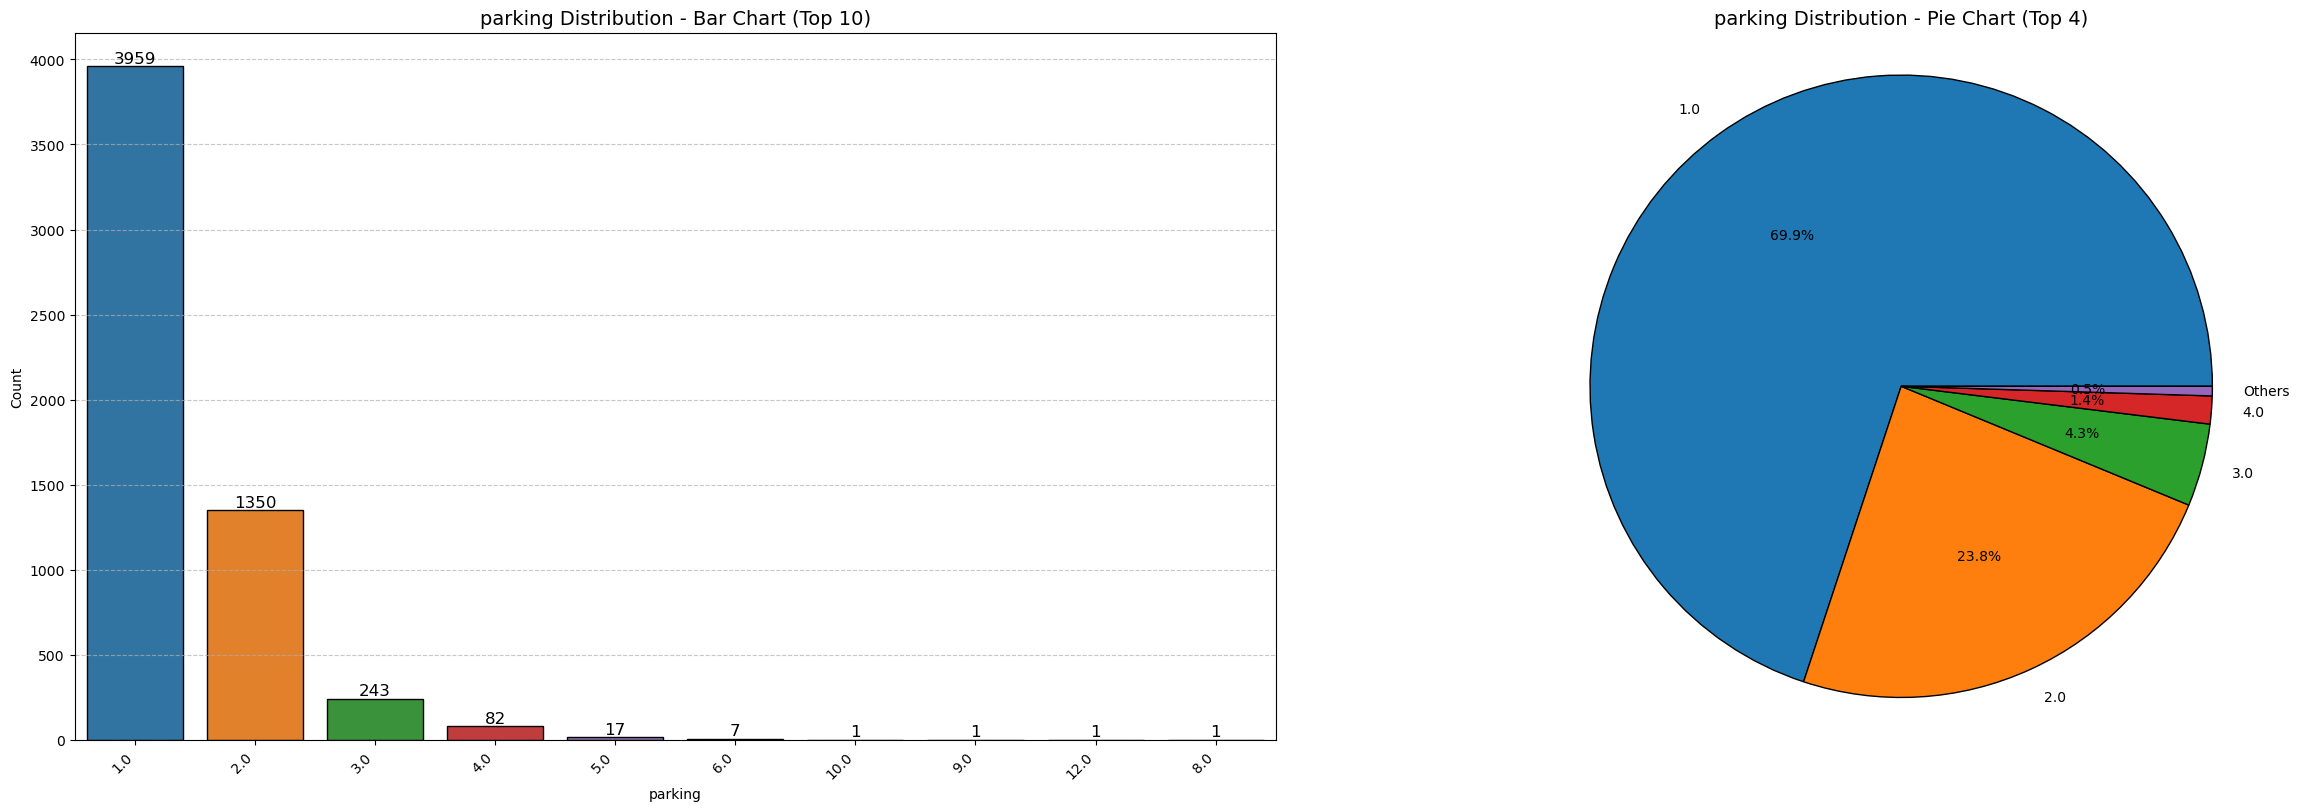

In [53]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'parking', bar_top_n=10, pie_top_n=4)

`observation`
- 6232 missing values
- 70% of properties have only 1 parking followed by 23.8% properties have 2 parking
- feature engineering of the categories which has value_counts less than 7

In [54]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'parking',10, 0.90)

Top 10 cumulative values:
parking
1.0     0.699223
2.0     0.937655
3.0     0.980572
4.0     0.995055
5.0     0.998057
6.0     0.999294
10.0    0.999470
9.0     0.999647
12.0    0.999823
8.0     1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: [1.0, 2.0]


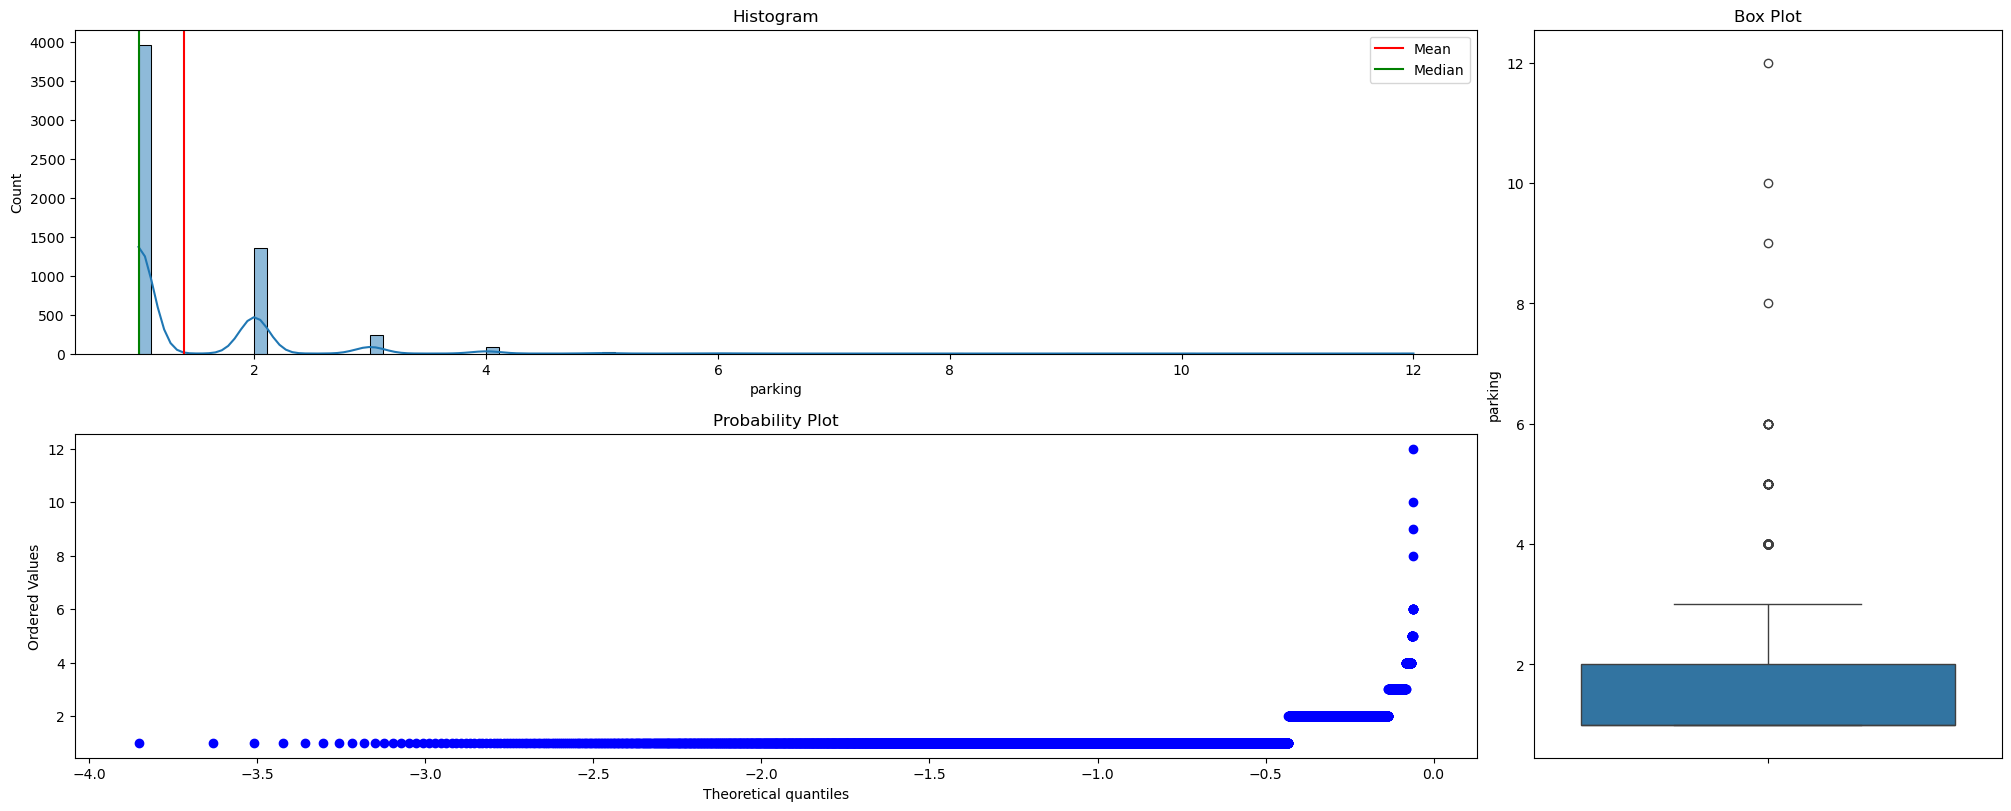

In [55]:
num_three_chart_plot(df, 'parking')

`observation`
- Outliers present, especially for values ≥ 4.
- Most values are concentrated at the lower end.
- 90% of values fall between 1 and 2.

In [56]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'parking', quantiles_input)

skewness : 3.085163
kurtosis : 19.857743
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 2.0000
IQR: 1.0000
Lower bound: -0.5000
Upper bound: 3.5000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   2.0000


`observation`
- Skewness (3.09) → Strong right skew, confirming a heavy tail on the right.
- Kurtosis (19.86) → Highly peaked distribution, indicating extreme values i.e leptokurtic distribution.

# area

In [57]:
# no of unique categories and value_counts
analyze_value_counts(df, 'area', top_n=5)  

Unique Categories in 'area': 1527
--------------------------------------------------
area
650.0    225
750.0    207
450.0    186
700.0    175
400.0    144
Name: count, dtype: int64


In [58]:
#missing values and describe
analyze_column(df, 'area')

Missing Values in 'area': 5
--------------------------------------------------
count    11889.000000
mean       879.286231
std        697.556563
min          3.000000
25%        540.000000
50%        730.000000
75%       1035.000000
max      40852.000000
Name: area, dtype: float64


`observation` 
- 5 missing values
- min area is 100 and max is 40852
- Mean (879.29) > Median (730) → Right-skewed distribution.
- 75% properties have area less than 1035 and max area is 40852, Extreme range, possible outliers.
- Standard deviation is 697.36; high variability. 

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


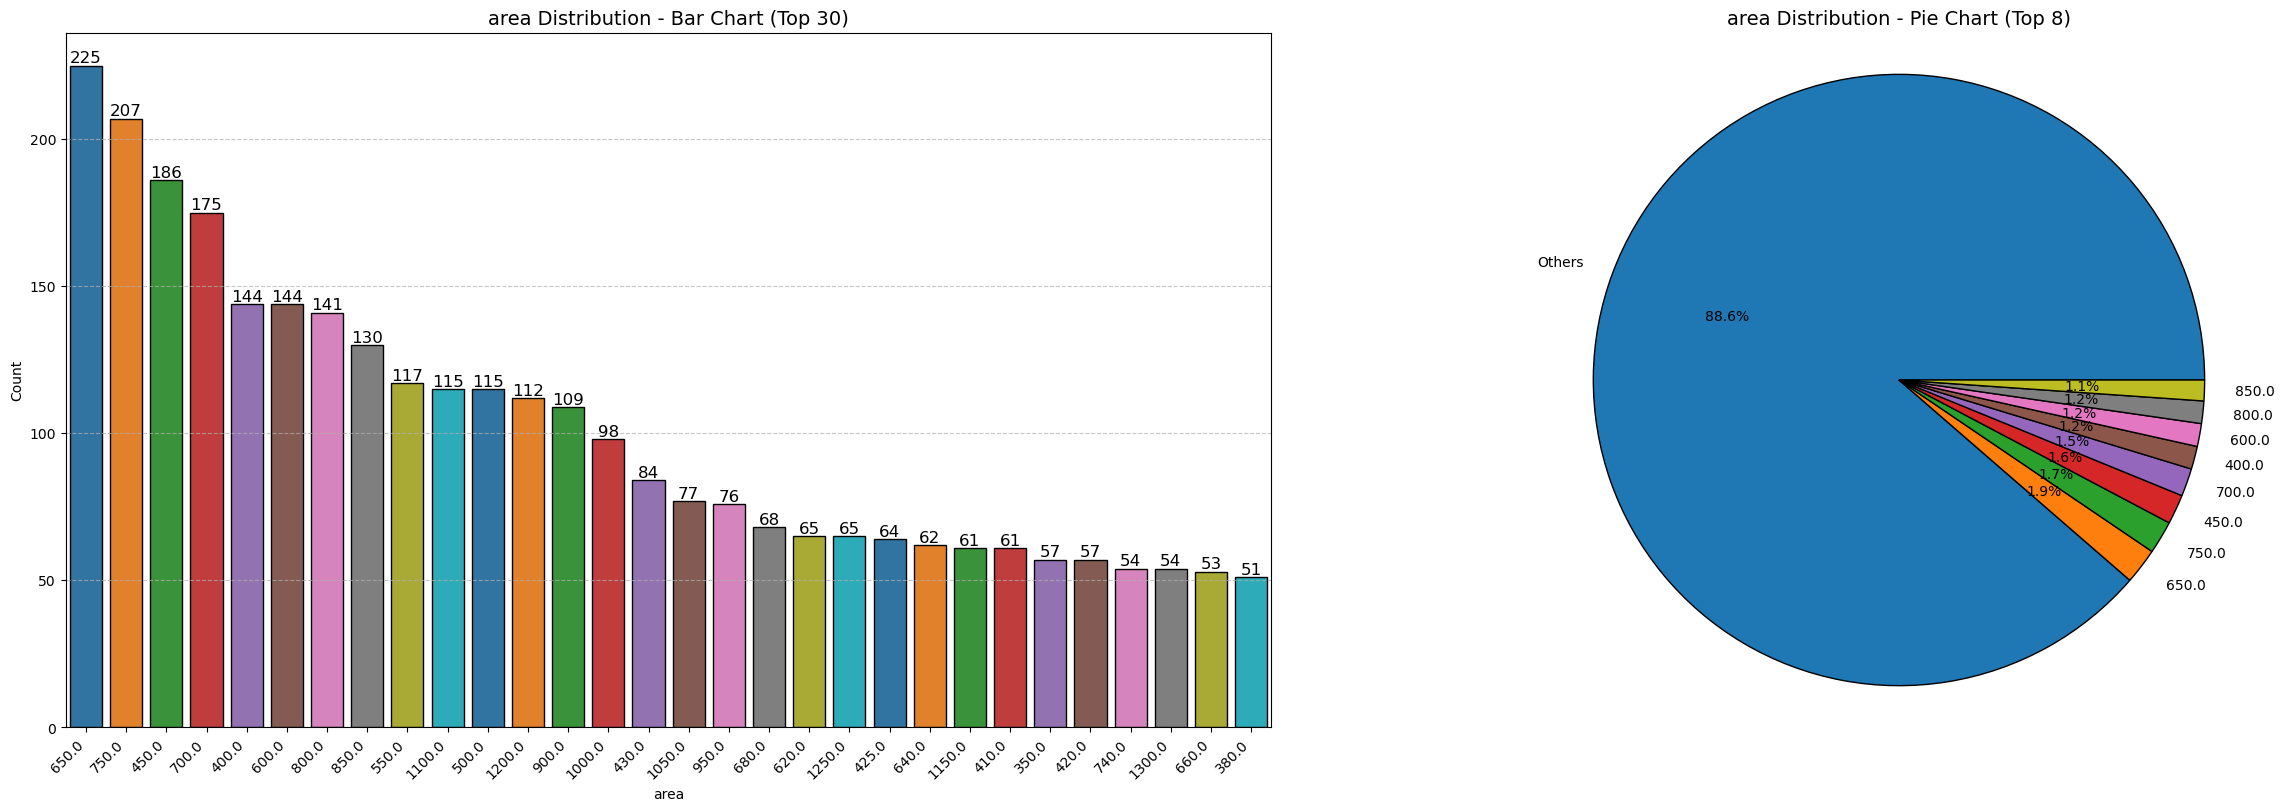

In [59]:
bar_pie_chart_plot(df, 'area', bar_top_n=30, pie_top_n=8)

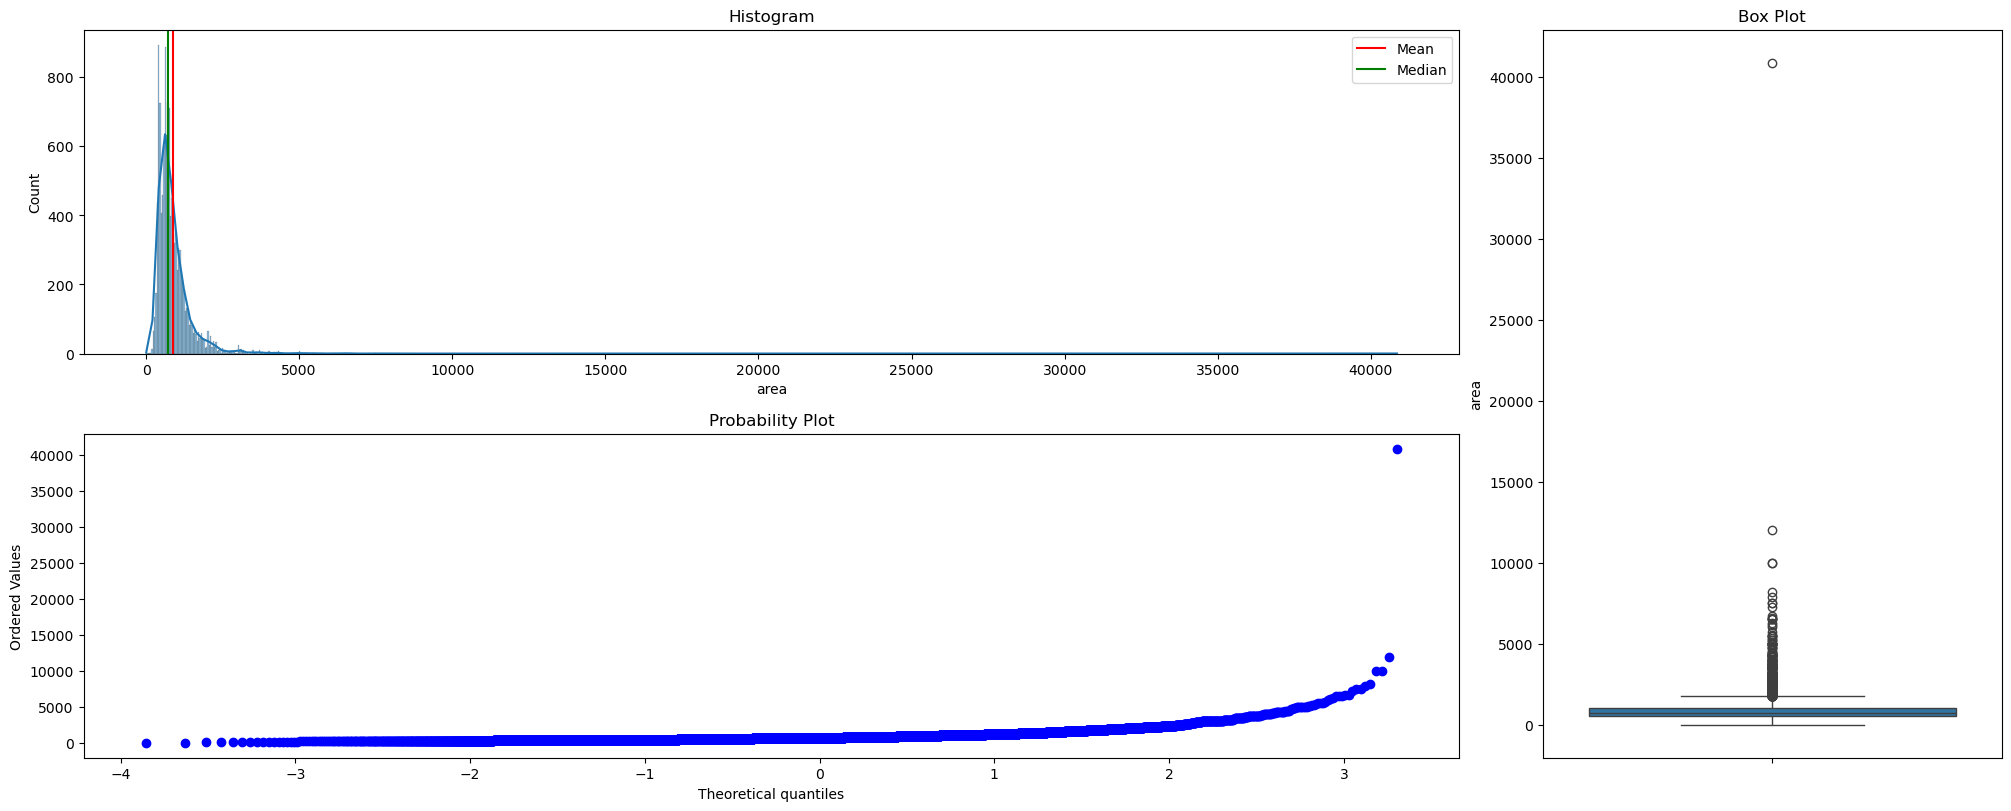

In [60]:
num_three_chart_plot(df, 'area')

`observation` 
- The distribution is right-skewed, with most properties having lower area.
- only 1 outlier make the distribution heavily right-skewed
- the IOR(blue box) lies between area 540 to 1035
- the median area is 730
- The distribution is right-skewed, as evident from the longer whisker on the upper side.
- Most data points are concentrated in the lower area range (1–1500).

In [61]:
quantiles_input = [0.10, 0.85]  
analyze_distribution(df, 'area', quantiles_input)

skewness : 18.541985
kurtosis : 926.934296
--------------------------------------------------------------------
Q1 (25th percentile): 540.0000
Q3 (75th percentile): 1035.0000
IQR: 495.0000
Lower bound: -202.5000
Upper bound: 1777.5000
--------------------------------------------------------------------
10th percentile   413.0000
85th percentile   1245.8000


`observation` 
- Skewness (18.55) → Highly right-skewed, extreme values (outliers) on the higher end.
- Kurtosis (927.63) → Leptokurtic, heavy tails, many outliers.
- Next Steps → Apply transformations(e.g., log or Box-Cox), handle outliers.

# costpersqft

In [62]:
# no of unique categories and value_counts
analyze_value_counts(df, 'costpersqft', top_n=5)  

Unique Categories in 'costpersqft': 7498
--------------------------------------------------
costpersqft
25000.0    64
20000.0    60
30000.0    47
33333.0    36
26667.0    35
Name: count, dtype: int64


In [63]:
#missing values and describe
analyze_column(df, 'costpersqft')

Missing Values in 'costpersqft': 6
--------------------------------------------------
count    1.188800e+04
mean     2.826924e+04
std      5.140888e+04
min      1.470000e+02
25%      1.690925e+04
50%      2.558100e+04
75%      3.428600e+04
max      5.333333e+06
Name: costpersqft, dtype: float64


`observation`
- range of the sqft ranges from 147.00 sqft to  5333333 sqft
- Mean (28,269) > Median (25,581) → Right-skewed distribution.
- Std (51,409) → High variability in cost per sqft.
- there is much difference between the 75% and max costpersqft,possible outliers

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


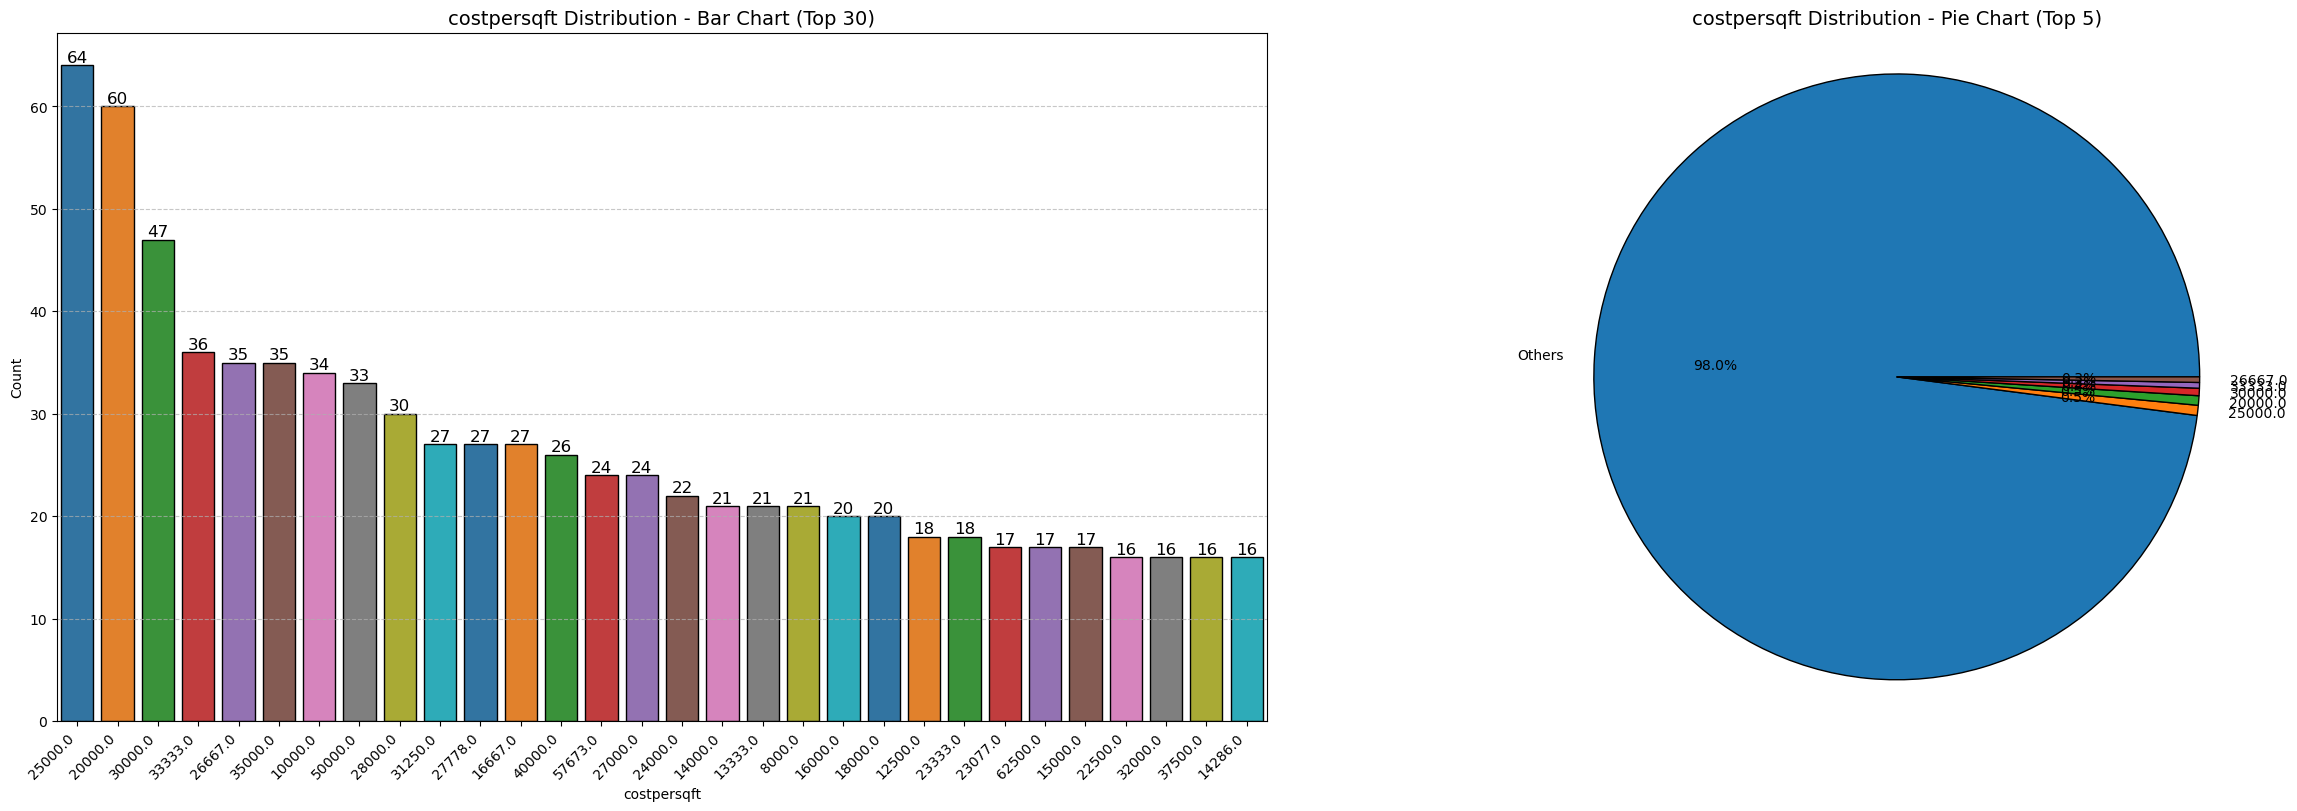

In [64]:
bar_pie_chart_plot(df, 'costpersqft', bar_top_n=30, pie_top_n=5)

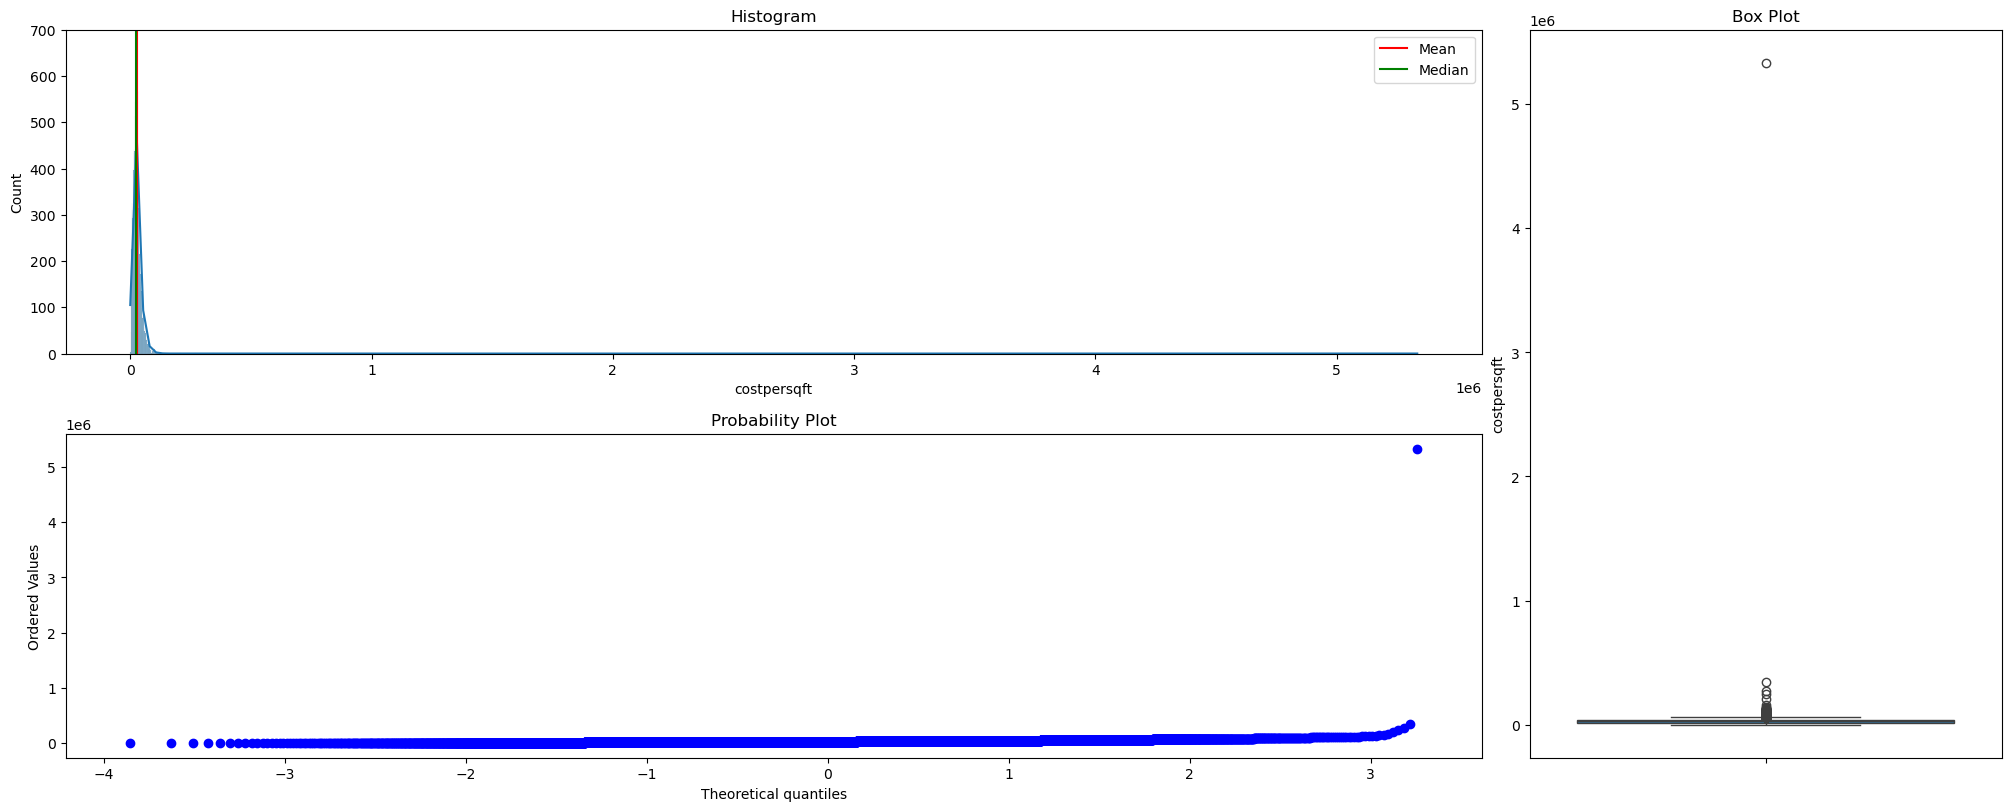

In [65]:
num_three_chart_plot(df, 'costpersqft')

`observation`
- Highly right-skewed distribution (long tail), most data in the lower range.
- Significant outliers present (seen in box plot).
- Mean > Median, confirming skewness.
- QQ plot shows deviation from normality.
- Most data falls within a narrow range, as shown by the small box and whiskers.

In [66]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'costpersqft', quantiles_input)

skewness : 92.538870
kurtosis : 9541.837651
--------------------------------------------------------------------
Q1 (25th percentile): 16909.2500
Q3 (75th percentile): 34286.0000
IQR: 17376.7500
Lower bound: -9155.8750
Upper bound: 60351.1250
--------------------------------------------------------------------
10th percentile   9882.0000
75th percentile   34286.0000


`observation`
- Few outliers affect the distribution.  
- Positive skewness 92.53 means a right-skewed distribution.  
- kurtosis 9541.83 is highly leptokurtic, means heavy tails and many outliers.

# lift

In [67]:
# no of unique categories and value_counts
analyze_value_counts(df, 'lift', top_n=5)  

Unique Categories in 'lift': 10
--------------------------------------------------
lift
2.0    2387
3.0    1333
4.0    1138
1.0     619
5.0     385
Name: count, dtype: int64


In [68]:
#missing values and describe
analyze_column(df, 'lift')

Missing Values in 'lift': 5439
--------------------------------------------------
count    6455.000000
mean        3.116809
std         1.714334
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: lift, dtype: float64


`observation`
- Mean (3.12) < Median (3) → Approximately symmetric distribution.
- Std (1.71) → Moderate variability.
- 25% (2), 75% (4) → 50% of values between 2 and 4.
- Min (1), Max (10) → Range from 1 to 10, no extreme outliers.

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


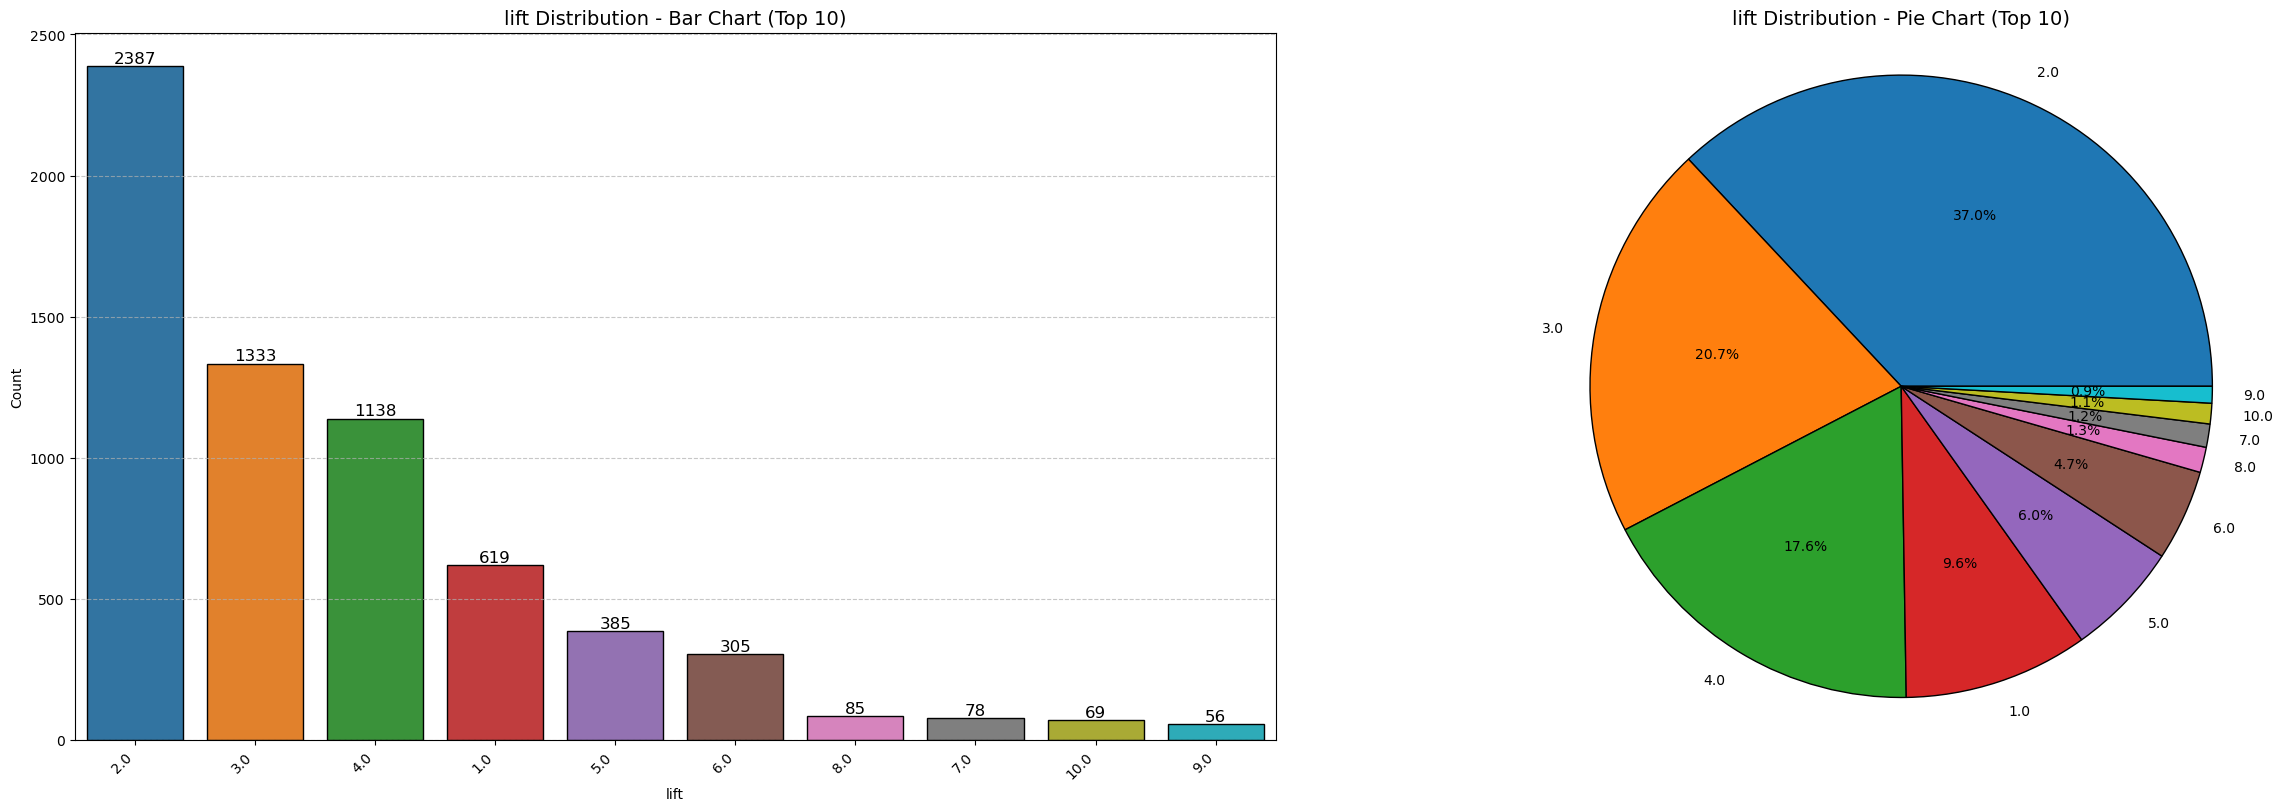

In [69]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'lift', bar_top_n=10, pie_top_n=10) 

In [70]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'lift',10, 0.90)

Top 10 cumulative values:
lift
2.0     0.369791
3.0     0.576297
4.0     0.752595
1.0     0.848490
5.0     0.908133
6.0     0.955383
8.0     0.968552
7.0     0.980635
10.0    0.991325
9.0     1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 5 Properties below 90.0% percentile: [1.0, 2.0, 3.0, 4.0, 5.0]


`observation`
- 90% properties have lifts between this 1.0, 2.0, 3.0, 4.0, 5.0

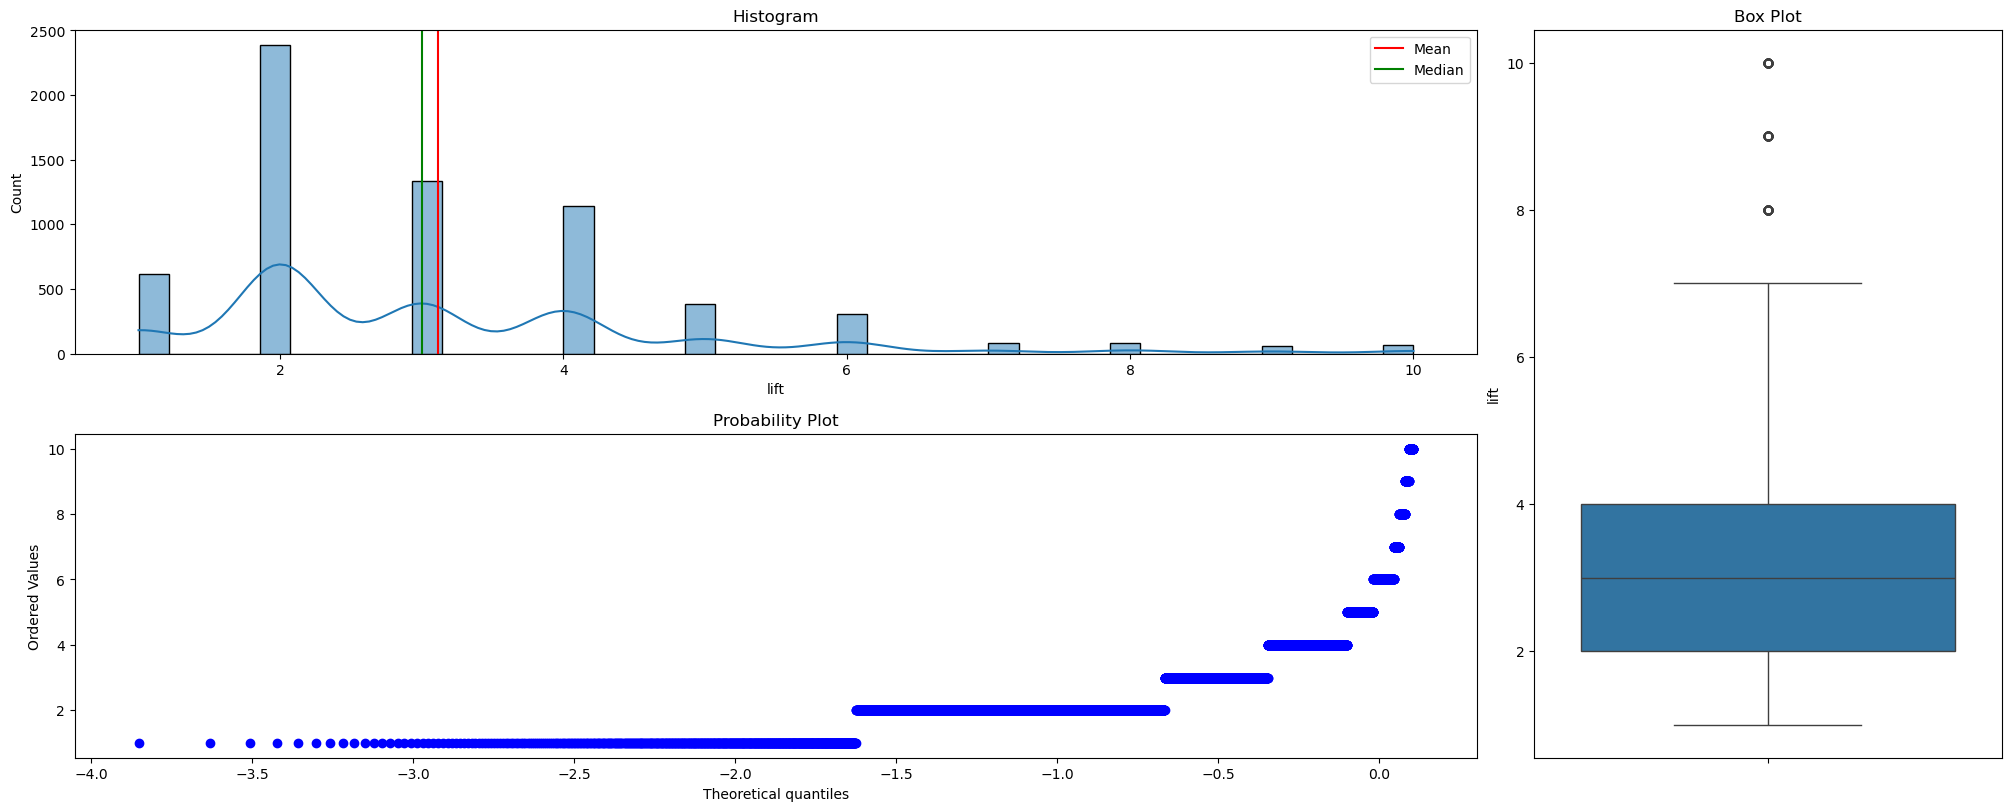

In [71]:
num_three_chart_plot(df, 'lift')

`observation`
- Most data lies between 2 and 4.
- There are a few extreme outliers beyond 6, with the maximum value reaching 10.
- probability plot: The data deviates significantly from a normal distribution, as the points do not follow the straight theoretical line.

In [72]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'lift', quantiles_input)

skewness : 1.533098
kurtosis : 2.938088
--------------------------------------------------------------------
Q1 (25th percentile): 2.0000
Q3 (75th percentile): 4.0000
IQR: 2.0000
Lower bound: -1.0000
Upper bound: 7.0000
--------------------------------------------------------------------
10th percentile   2.0000
75th percentile   4.0000


`observation`
- 5439 missing values 
- 36.97% properties have 2 lifts
- 84% properties have less than 4 lifts
- very few properties have more than 4 lifts

# flat_on_floor

In [73]:
# no of unique categories and value_counts
analyze_value_counts(df, 'flat_on_floor', top_n=5)  

Unique Categories in 'flat_on_floor': 71
--------------------------------------------------
flat_on_floor
3.0    678
2.0    671
5.0    637
1.0    632
4.0    604
Name: count, dtype: int64


In [74]:
#missing values and describe
analyze_column(df, 'flat_on_floor')

Missing Values in 'flat_on_floor': 2292
--------------------------------------------------
count    9602.000000
mean       10.870027
std        10.134959
min        -2.000000
25%         4.000000
50%         8.000000
75%        15.000000
max        75.000000
Name: flat_on_floor, dtype: float64


`observation`
- 2292 missing values
- min is -2 and max is 75(below ground there is -1 and -2 and ground floor is 0 and so on till 75th floor we have properties)
- mean is 10.86 and median is 8
- 75% properties are on below 15th floor and max is 75
- std dev is 10.13; high variability

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


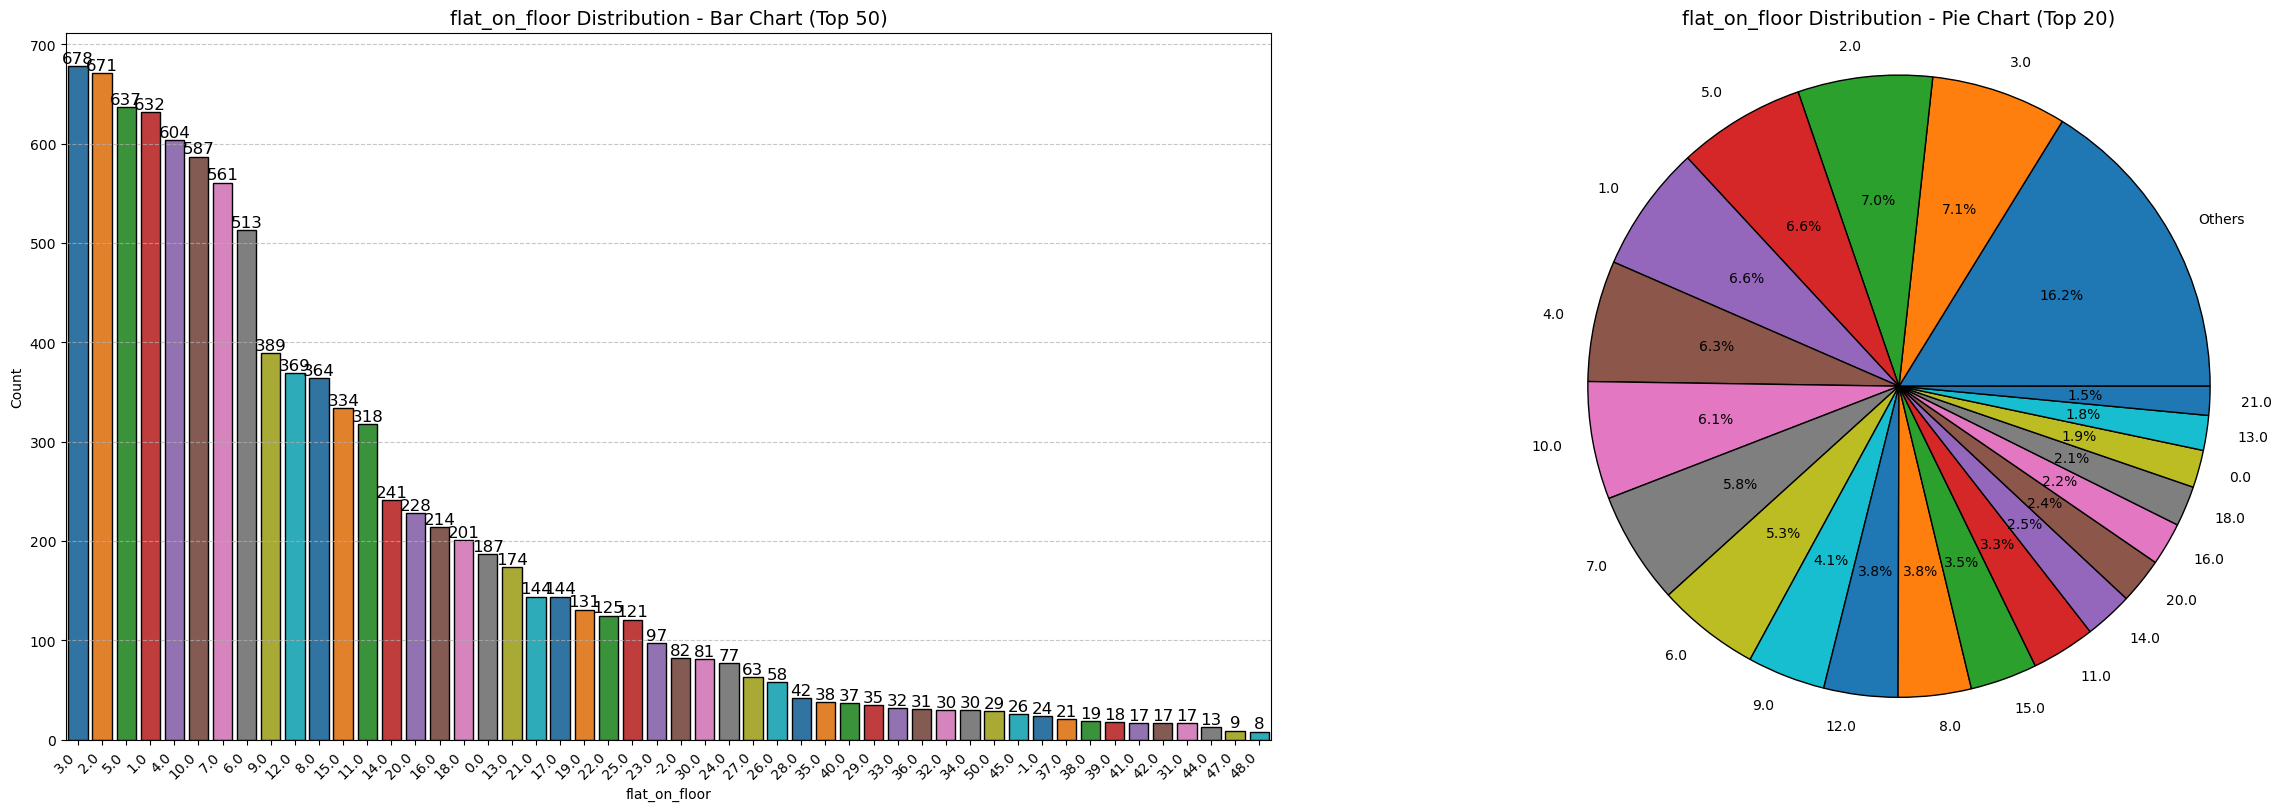

In [75]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'flat_on_floor', bar_top_n=50, pie_top_n=20)

In [76]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'flat_on_floor',8, 0.90)

Top 8 cumulative values:
flat_on_floor
3.0     0.070610
2.0     0.140492
5.0     0.206832
1.0     0.272652
4.0     0.335555
10.0    0.396688
7.0     0.455114
6.0     0.508540
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 25 Properties below 90.0% percentile: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0]


`observation`
- 90% properties are on this floor - 0 to 23 and 25 

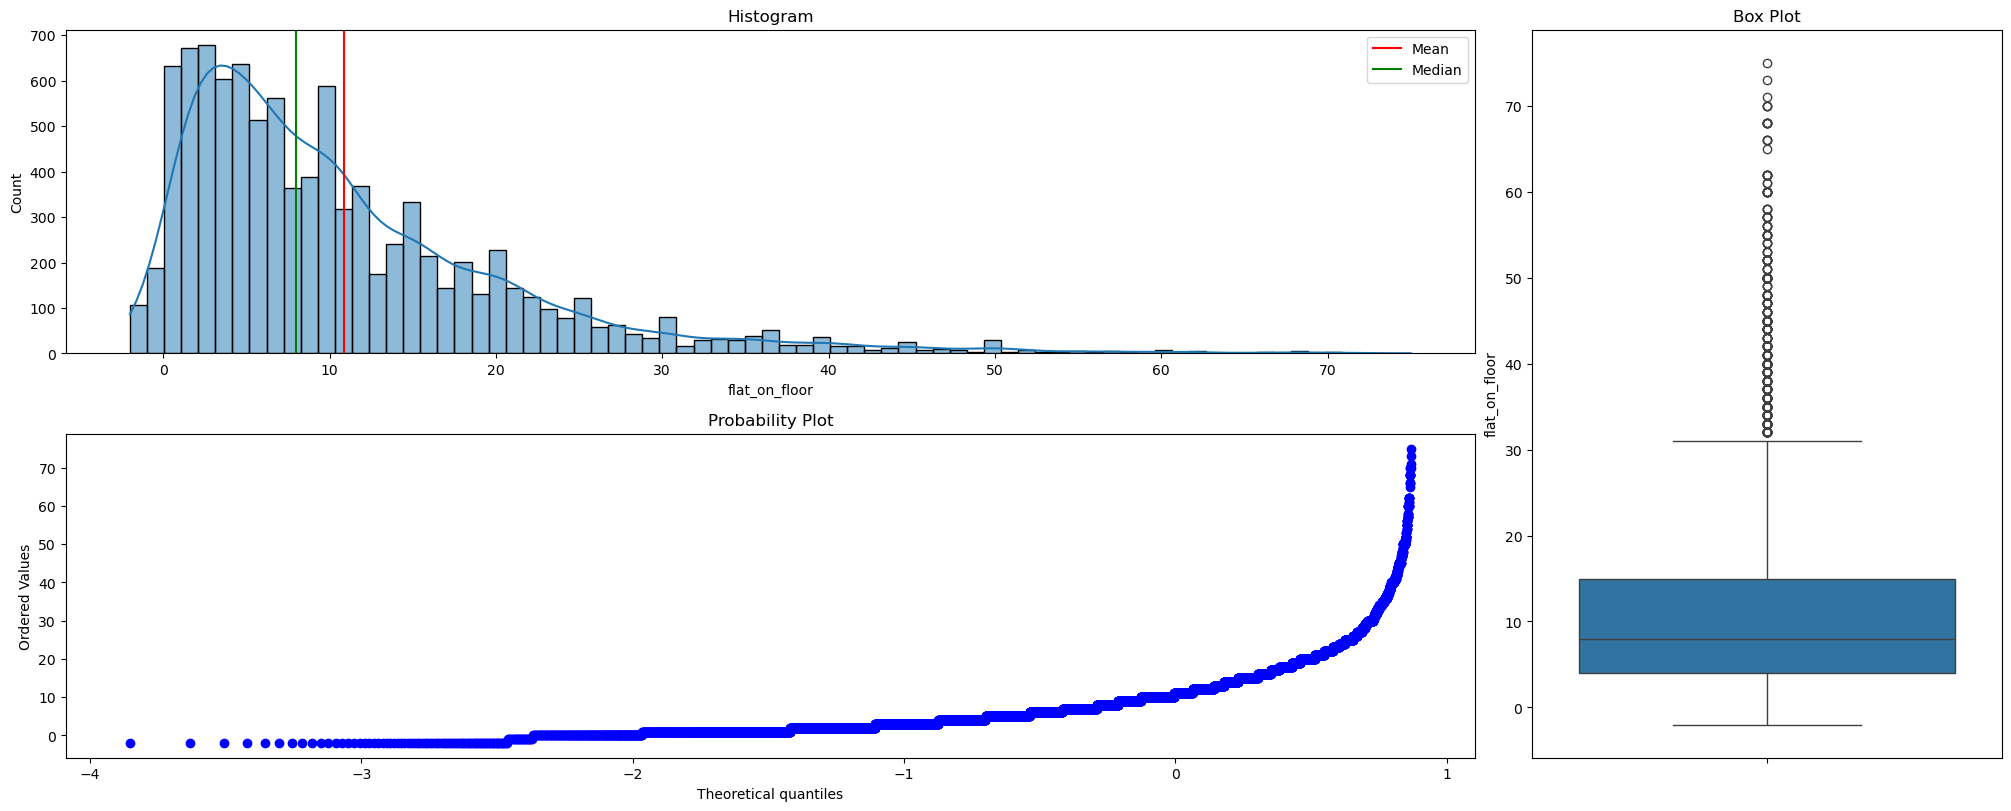

In [77]:
num_three_chart_plot(df, 'flat_on_floor')

`observation` 
- Most flats are concentrated on lower floors (near 0–10).
- The distribution is right-skewed, with fewer flats on higher floors.
- There is a sharp peak around floor 1, indicating a large number of flats on the first floor.
- The data has outliers on higher floors.
- most flats are located on floors within a range of approximately 0–15.
- There are significant outliers above the upper whisker, indicating some flats are on very high floors.
- The interquartile range (IQR) is between floor 4 and floor 15.
- The median floor level is around 8.
- presence of outliers in higher floors.

In [78]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'flat_on_floor', quantiles_input)

skewness : 1.861369
kurtosis : 4.735627
--------------------------------------------------------------------
Q1 (25th percentile): 4.0000
Q3 (75th percentile): 15.0000
IQR: 11.0000
Lower bound: -12.5000
Upper bound: 31.5000
--------------------------------------------------------------------
10th percentile   2.0000
75th percentile   15.0000


`observations` 
- Skewness (1.86): The data is moderately right-skewed, indicating a longer tail towards higher floor levels.  
- Kurtosis (4.73): The data has higher peakedness compared to a normal distribution, with significant outliers on higher floors.  

# total_floor

In [79]:
# no of unique categories and value_counts
analyze_value_counts(df, 'total_floor', top_n=5)  

Unique Categories in 'total_floor': 85
--------------------------------------------------
total_floor
7.0     1017
4.0      554
22.0     541
20.0     378
23.0     330
Name: count, dtype: int64


In [80]:
#missing values and describe
analyze_column(df, 'total_floor')

Missing Values in 'total_floor': 2059
--------------------------------------------------
count    9835.000000
mean       22.181495
std        16.214268
min         1.000000
25%         8.000000
50%        19.000000
75%        30.000000
max        92.000000
Name: total_floor, dtype: float64


`observation`
- column for how many floor building has 
- 2059 missing values
- min is 1 and max is 92
- mean is 22.18 and median is 19
- 75% properties are on below 30th floor and max is 92
- std dev is 16.21; high variability

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


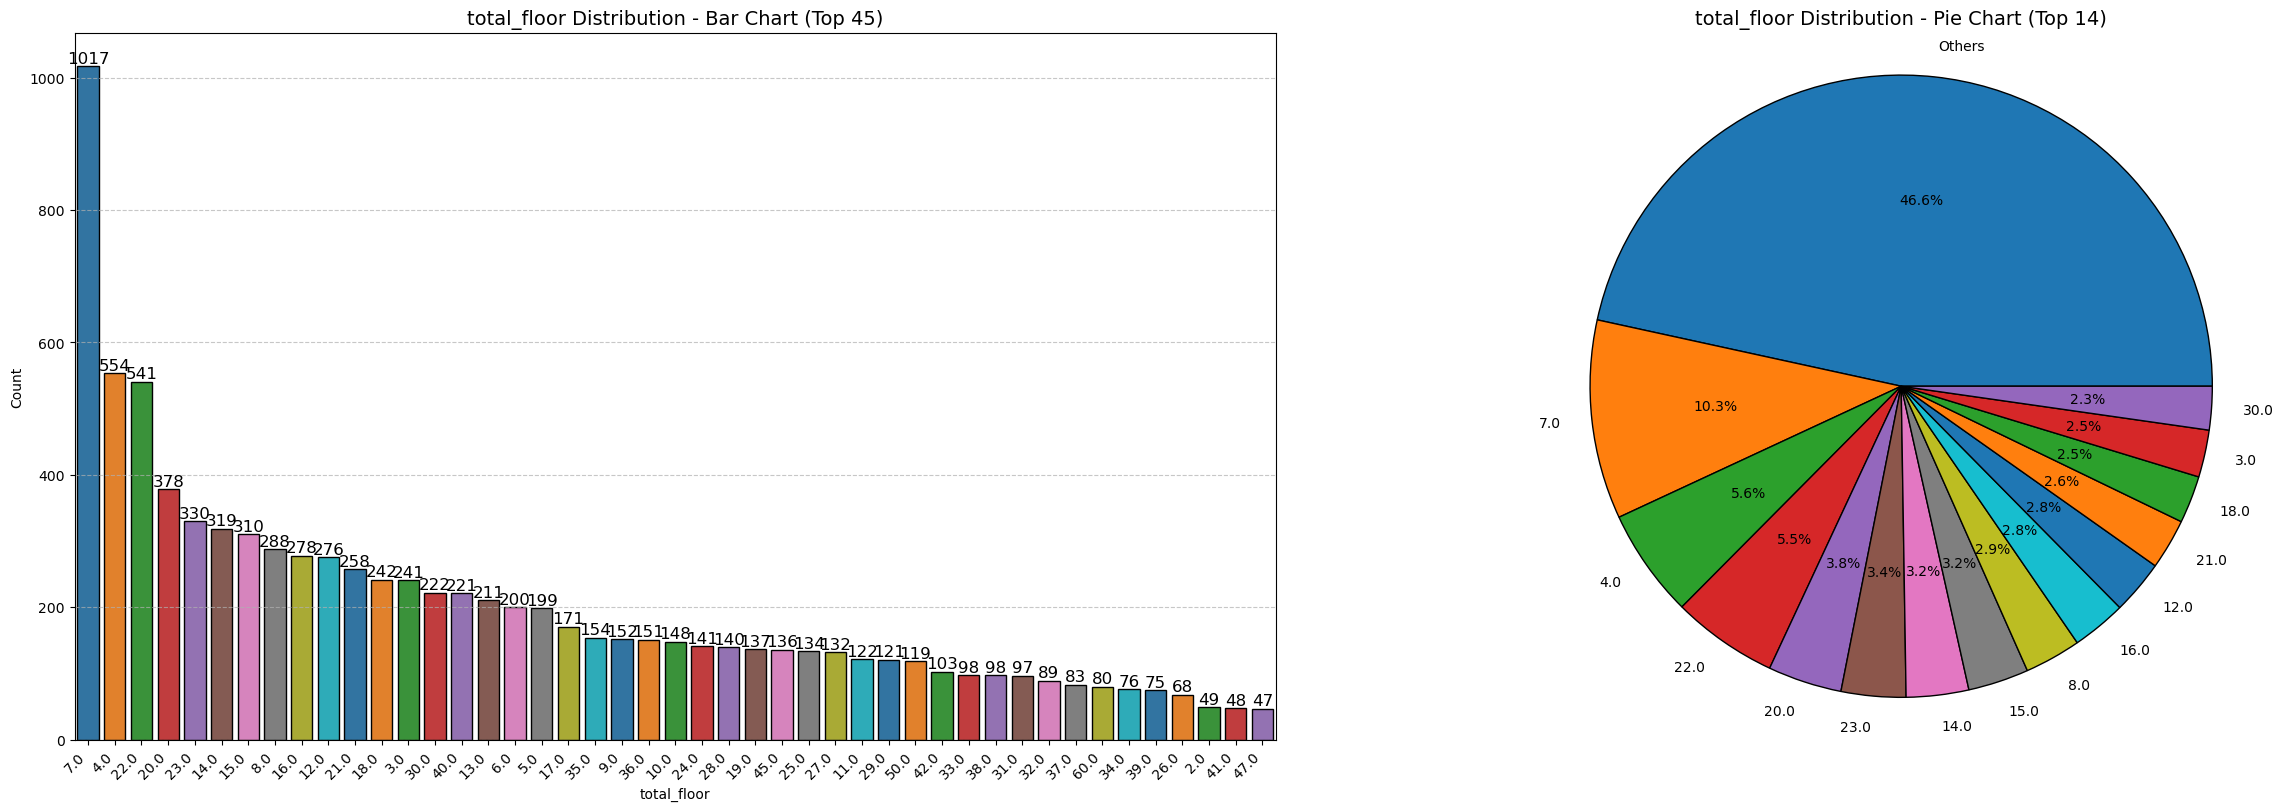

In [81]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'total_floor', bar_top_n=45, pie_top_n=14)

In [82]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'total_floor',5, 0.90)

Top 5 cumulative values:
total_floor
7.0     0.103406
4.0     0.159736
22.0    0.214743
20.0    0.253177
23.0    0.286731
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 42 Properties below 90.0% percentile: [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 42.0, 45.0, 50.0, 60.0]


`observation`
- 90% of the projects consist of buildings with 3 to 40 floors, along with specific buildings having 42, 45, 50, and 60 floors. 
- 80% of the projects have less than 35 floors

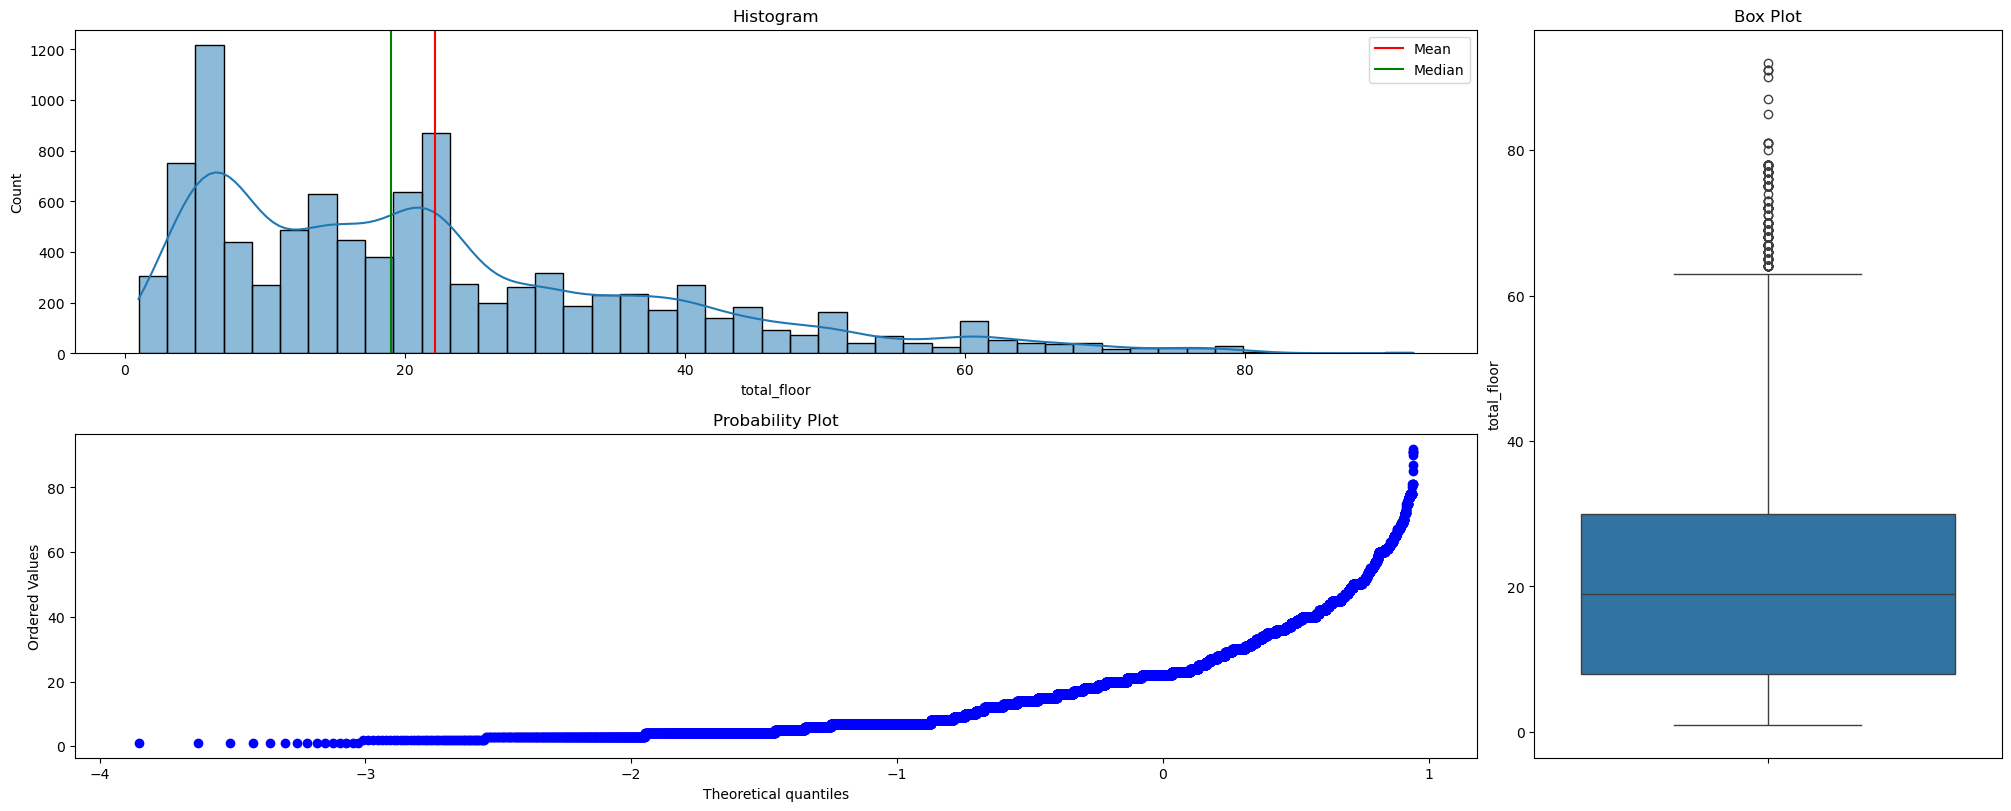

In [83]:
num_three_chart_plot(df, 'total_floor')

`observation` 
- Most projects are concentrated on lower floors (near 1–25).
- The distribution is right-skewed, with fewer projects are of higher floors.
- There is a sharp peak around 7 floor building, indicating most of the buildings are of 7 floor
- The data has outliers for higher floors.
- most projects are located on floors within a range of approximately 0–30.
- There are significant outliers above the upper whisker, indicating some flats are of many floors.
- The interquartile range (IQR) is between floor 8 and floor 30.
- The median project floor level is around 19.
- presence of outliers in higher flat floors.

In [84]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'total_floor', quantiles_input)

skewness : 1.116462
kurtosis : 0.933587
--------------------------------------------------------------------
Q1 (25th percentile): 8.0000
Q3 (75th percentile): 30.0000
IQR: 22.0000
Lower bound: -25.0000
Upper bound: 63.0000
--------------------------------------------------------------------
10th percentile   5.0000
75th percentile   30.0000


`observations`
- Skewness: 1.11:  
  - The data is moderately positively skewed, indicating that more projects are concentrated at lower floor levels, with a few extreme values on higher floors causing a longer right tail.  
- Kurtosis: 0.93  
  - The data is platykurtic (kurtosis < 3), with lighter tails and fewer extreme outliers.  

# balcony

In [85]:
# no of unique categories and value_counts
analyze_value_counts(df, 'balcony', top_n=5)  

Unique Categories in 'balcony': 8
--------------------------------------------------
balcony
1.0    3064
2.0    1469
3.0    1101
4.0     332
5.0      76
Name: count, dtype: int64


In [86]:
#missing values and describe
analyze_column(df, 'balcony')

Missing Values in 'balcony': 5820
--------------------------------------------------
count    6074.000000
mean        1.847218
std         1.049587
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: balcony, dtype: float64


`observation`
- Missing Values (5820) → High missing percentage.
- Mean (1.85) > Median (1) → Right-skewed distribution.
- Std (1.05) → Moderate variability.
- 25% (1), 75% (3) → 50% of values between 1 and 3.
- Min (1), Max (8) → Range from 1 to 8, indicating potential upper outliers.

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


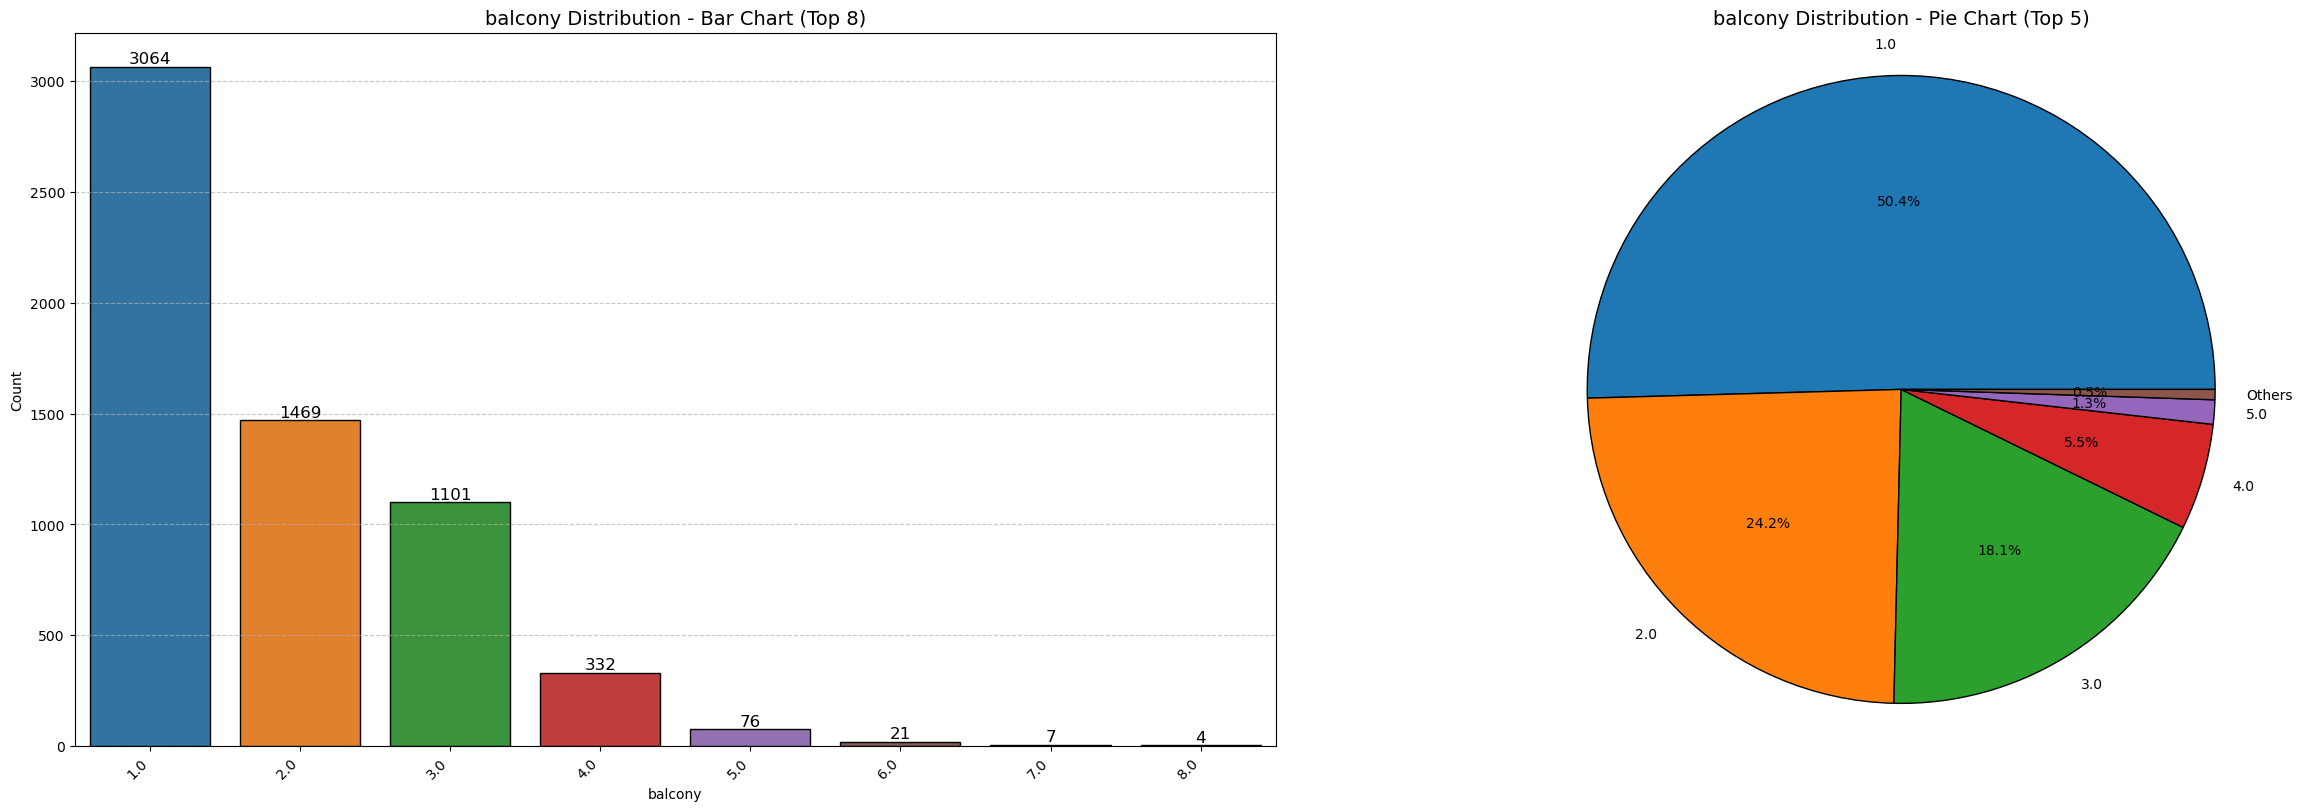

In [87]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'balcony', bar_top_n=8, pie_top_n=5)

In [88]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'balcony',8, 0.90)

Top 8 cumulative values:
balcony
1.0    0.504445
2.0    0.746296
3.0    0.927560
4.0    0.982219
5.0    0.994732
6.0    0.998189
7.0    0.999341
8.0    1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 3 Properties below 90.0% percentile: [1.0, 2.0, 3.0]


`observation`
- 90% of the properties have 1,2,3 balconies.
- 50% properties have 1 balcony 

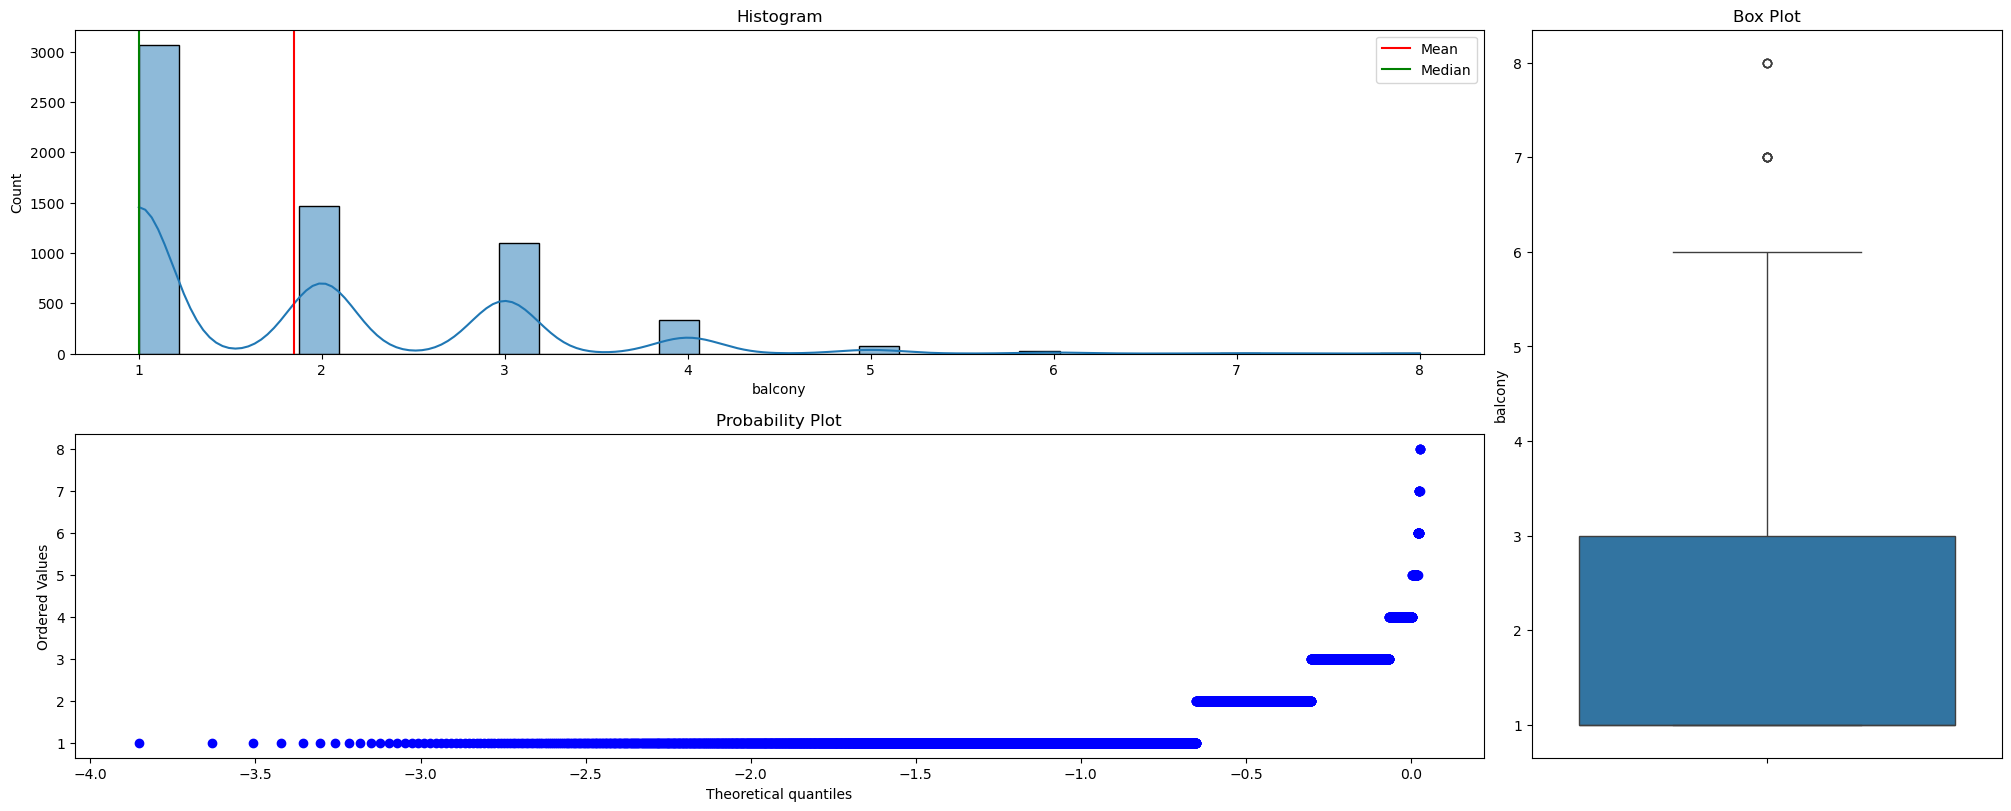

In [89]:
num_three_chart_plot(df, 'balcony')

`observation`
- The histogram shows that the majority of values are concentrated at 1 and 2 balconies.
- The data is highly right-skewed, with few observations for values above 3 balconies.
- The mean is greater than the median, indicating a positive skew.
- The box plot shows outliers for values above 6 balconies.
- Most of the data lies within the interquartile range (1 to 3 balconies).
- The probability plot indicates deviations from normality, especially in the upper tail.

In [90]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'balcony', quantiles_input)

skewness : 1.270163
kurtosis : 1.762489
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 3.0000
IQR: 2.0000
Lower bound: -2.0000
Upper bound: 6.0000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   3.0000


`observation`
- The data is positively skewed with a skewness value of 1.270.- 
Kurtosis value of 1.762 indicates a relatively flat distributio(platykurtic)n.- 
The interquartile range (IQR) is 2, with Q1 at 1 and Q3 at 3- .
Outliers are present above the upper bound of 6 balconies.

# bed 

In [91]:
# no of unique categories and value_counts
analyze_value_counts(df, 'bed', top_n=5)  

Unique Categories in 'bed': 9
--------------------------------------------------
bed
2.0    4857
1.0    3183
3.0    2899
4.0     756
5.0     127
Name: count, dtype: int64


In [92]:
#missing values and describe
analyze_column(df, 'bed')

Missing Values in 'bed': 0
--------------------------------------------------
count    11894.000000
mean         2.162351
std          0.981263
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: bed, dtype: float64


`observation`
- Most values are between 1 and 3 beds
- std 0.98, indicating variability in the number of beds.

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


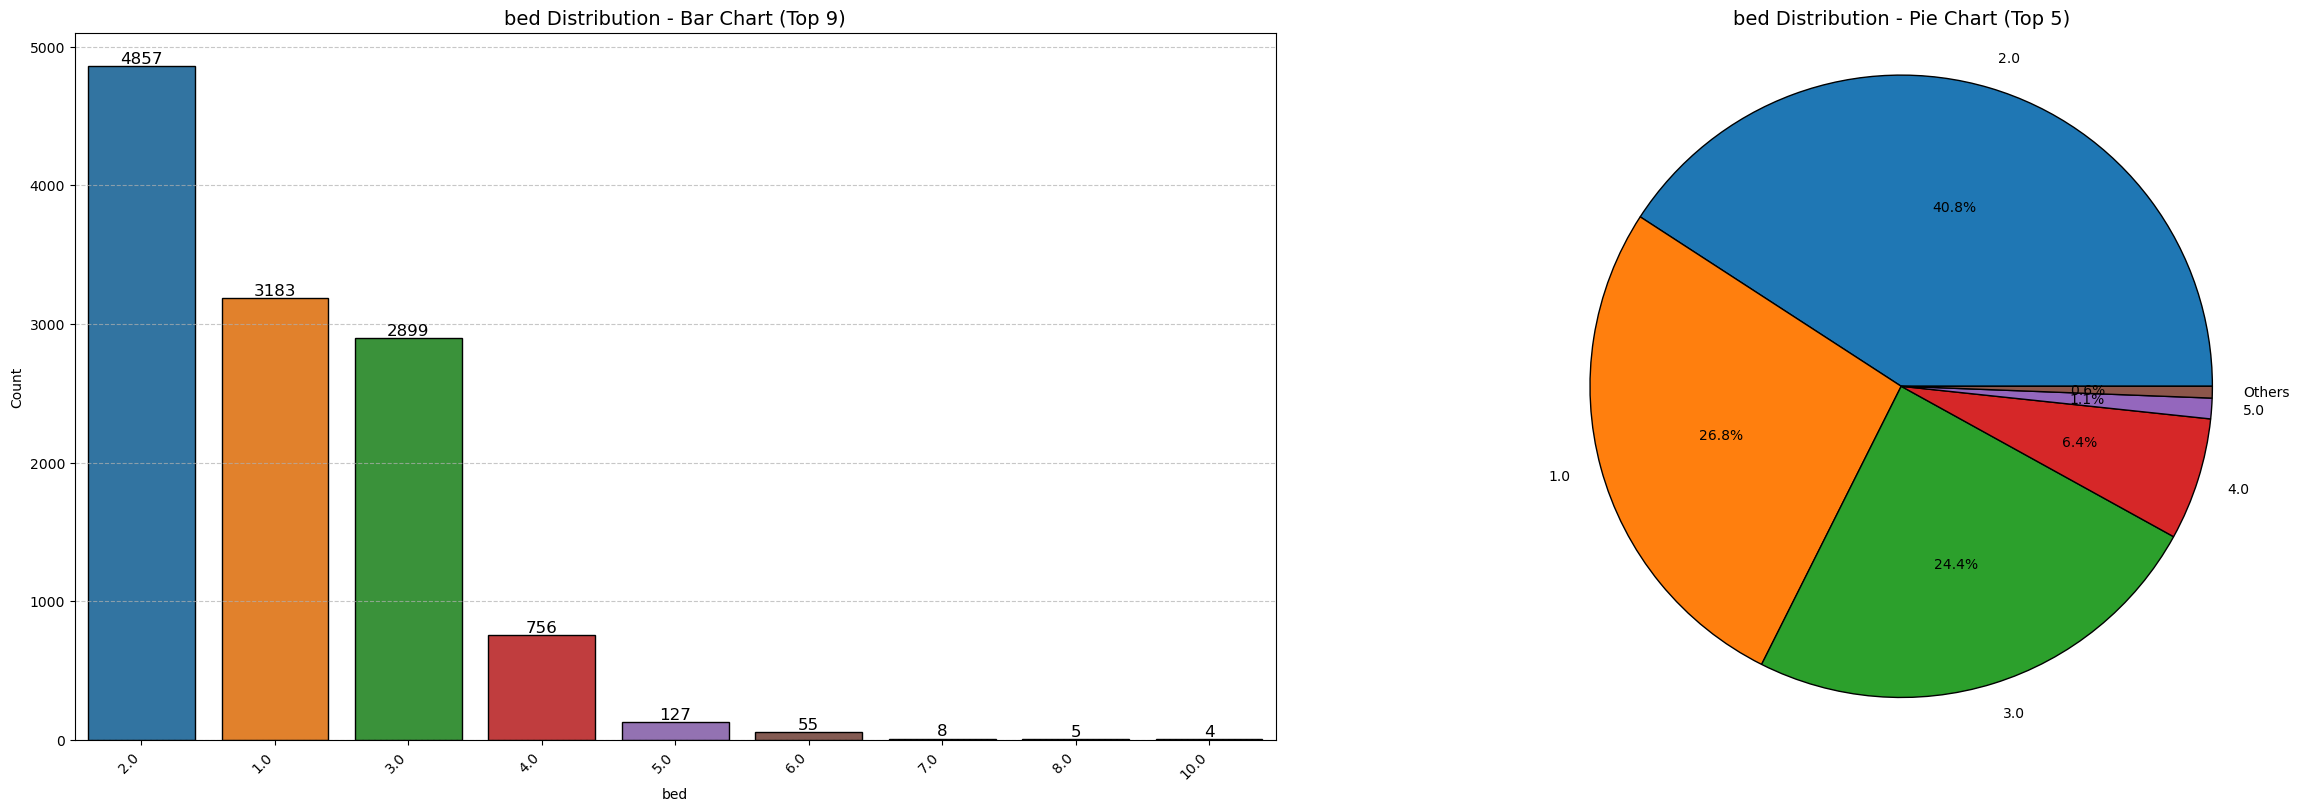

In [93]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'bed', bar_top_n=9, pie_top_n=5)

In [94]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'bed',9, 0.90)

Top 9 cumulative values:
bed
2.0     0.408357
1.0     0.675971
3.0     0.919707
4.0     0.983269
5.0     0.993947
6.0     0.998571
7.0     0.999243
8.0     0.999664
10.0    1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 3 Properties below 90.0% percentile: [1.0, 2.0, 3.0]


`obserbvation`
- no missing values
- 92% of the properties have 1, 2, or 3 bedrooms.

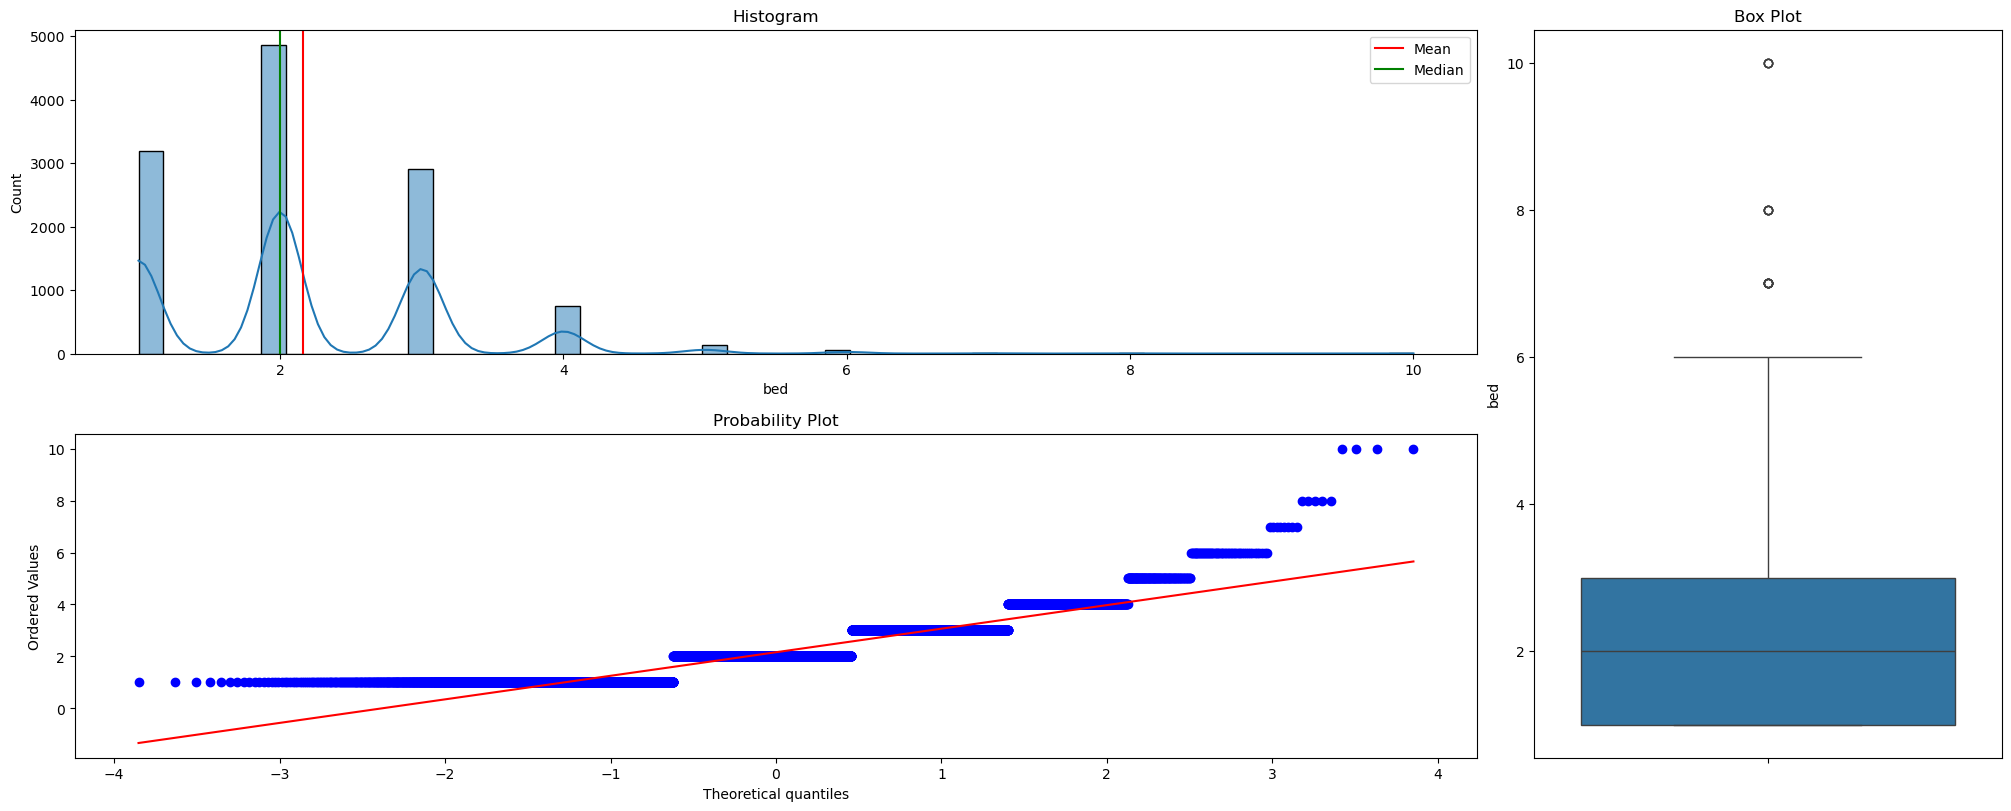

In [95]:
num_three_chart_plot(df, 'bed')

In [96]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'bed', quantiles_input)

skewness : 0.998004
kurtosis : 2.562183
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 3.0000
IQR: 2.0000
Lower bound: -2.0000
Upper bound: 6.0000
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   3.0000


`obserbvation`
- Skewness (0.998) → Right-skewed distribution.
- Kurtosis (2.56) → Slightly platykurtic (less peaked than normal).

# lattitude

In [97]:
# no of unique categories and value_counts
analyze_value_counts(df, 'lattitude', top_n=5)  

Unique Categories in 'lattitude': 2924
--------------------------------------------------
lattitude
19.205002    235
19.119677    230
19.174954    206
19.227262    186
19.282975    176
Name: count, dtype: int64


In [98]:
#missing values and describe
analyze_column(df, 'lattitude')

Missing Values in 'lattitude': 463
--------------------------------------------------
count    11431.000000
mean        19.153594
std          0.735072
min          9.209138
25%         19.062055
50%         19.143882
75%         19.210299
max         72.875061
Name: lattitude, dtype: float64


`observation` 
- 463 missing values
- 19.15, close to the median, indicating data is symmetrically distributed.
- std-dev 0.735, showing low variability within most of the data.
- 9.21, indicating a small subset of data significantly lower than the mean.
- 72.88, showing extreme outliers far above the upper whisker.
- 19.06, tightly packed with the 75th Percentile (Q3): 19.21, confirming low IQR.
- Data is heavily skewed due to the extreme max value.

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


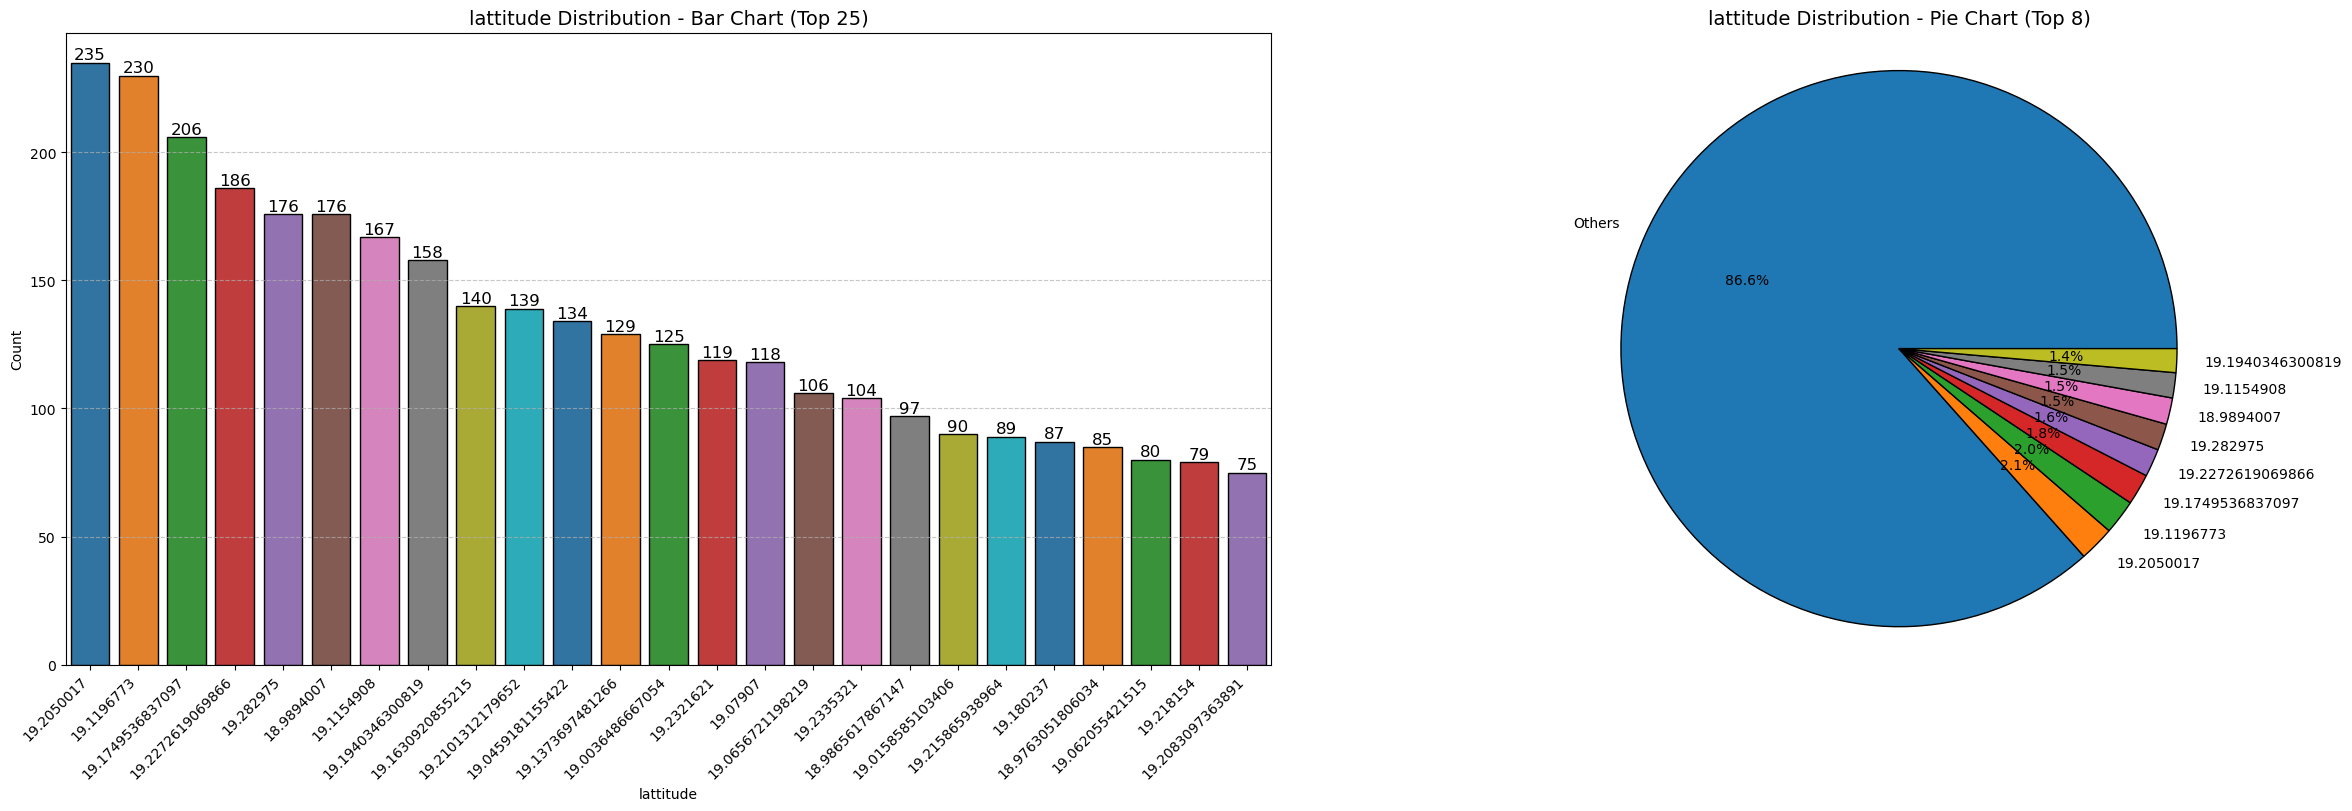

In [99]:
bar_pie_chart_plot(df, 'lattitude', bar_top_n=25, pie_top_n=8)

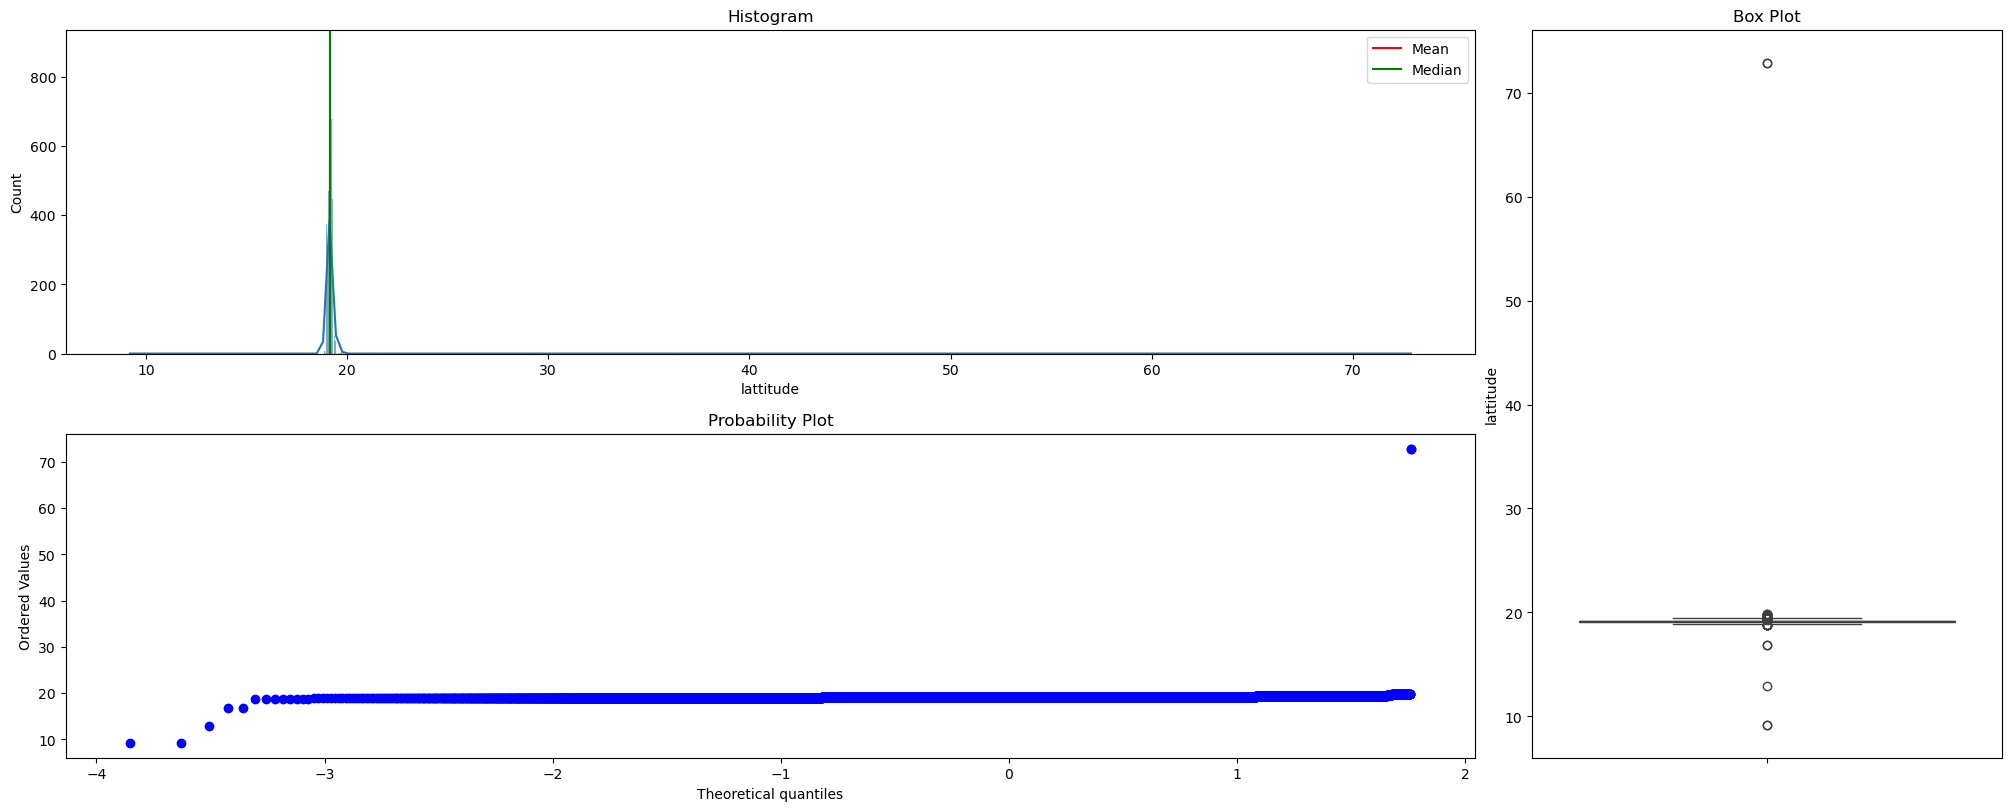

In [100]:
num_three_chart_plot(df, 'lattitude')

`observation`
- The latitude distribution is highly concentrated between 19 and 20.  
- The data is heavily skewed, with minimal values beyond 20.  
- Indicates the dataset is focused on a specific geographical region.
- Values outside the whiskers are considered outliers.
- The latitude data is concentrated within a narrow interquartile range (IQR) near 10–20.
- The median latitude lies close to 19.

In [101]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'lattitude', quantiles_input)

skewness : 67.711361
kurtosis : 4986.496950
--------------------------------------------------------------------
Q1 (25th percentile): 19.0621
Q3 (75th percentile): 19.2103
IQR: 0.1482
Lower bound: 18.8397
Upper bound: 19.4327
--------------------------------------------------------------------
10th percentile   19.0036
75th percentile   19.2103


`observation` 
- Skewness (67.71): Extremely positively skewed distribution with a long right tail.  
- Kurtosis (4986.76): Highly leptokurtic, with a sharp peak and heavy tails.  
- Most values are concentrated between 10°–20°, with a few extreme outliers above 50°.  
- Indicates the need for transformations (e.g., log, Box-Cox) or outlier treatment.

# longitude

In [102]:
# no of unique categories and value_counts
analyze_value_counts(df, 'longitude', top_n=5)  

Unique Categories in 'longitude': 2859
--------------------------------------------------
longitude
72.869271    287
72.905081    230
72.943104    206
72.863440    186
73.117516    176
Name: count, dtype: int64


In [103]:
#missing values and describe
analyze_column(df, 'longitude')

Missing Values in 'longitude': 463
--------------------------------------------------
count    11431.000000
mean        72.896409
std          0.715783
min         19.024462
25%         72.839809
50%         72.872695
75%         72.963374
max         74.021019
Name: longitude, dtype: float64


`observation` 
- mean close to median indicating data is symmetrically distributed
- std-dev 0.716, showing relatively low variability within the dataset.
- 19.02, an extreme outlier far below the majority of values.
- 74.02, close to the mean, suggesting no extreme positive outliers.
- 25th Percentile (Q1): 72.84 and 75th Percentile (Q3): 72.96, with a narrow IQR of approximately 0.12, indicating tightly packed data.
- The outlier at the lower bound (19.02) significantly skews the distribution.

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


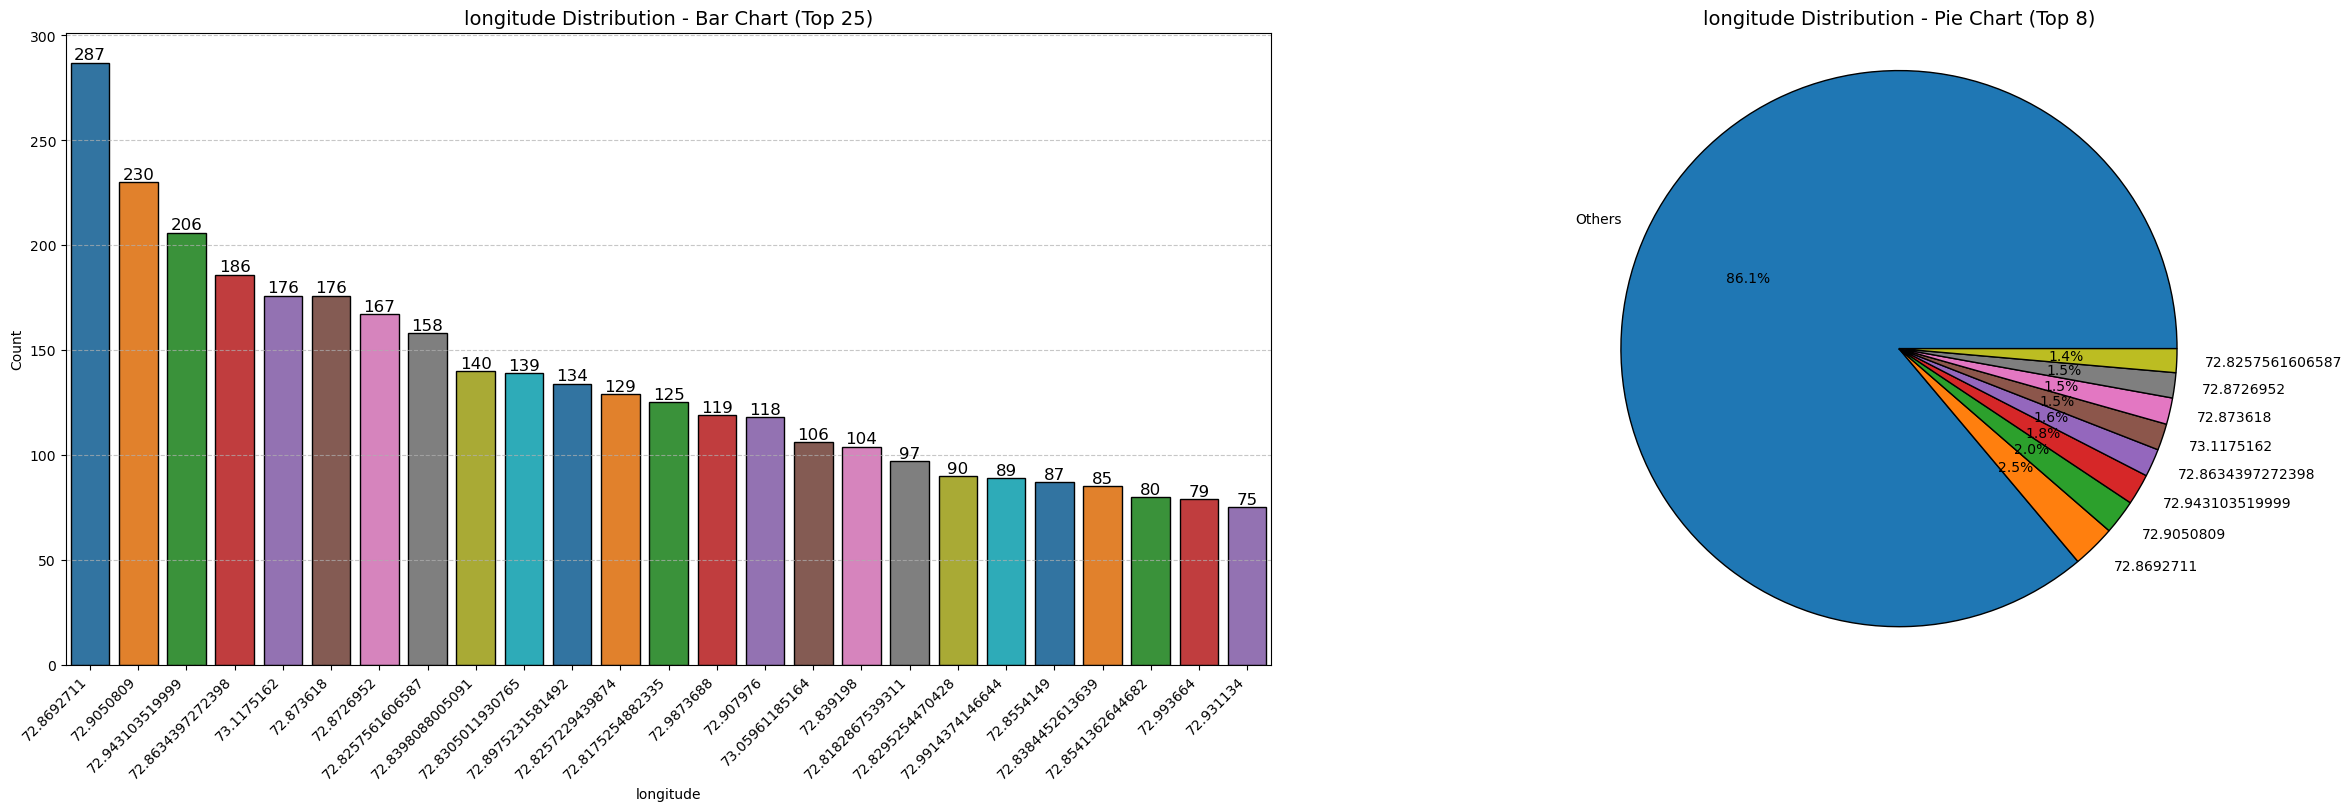

In [104]:
bar_pie_chart_plot(df, 'longitude', bar_top_n=25, pie_top_n=8)

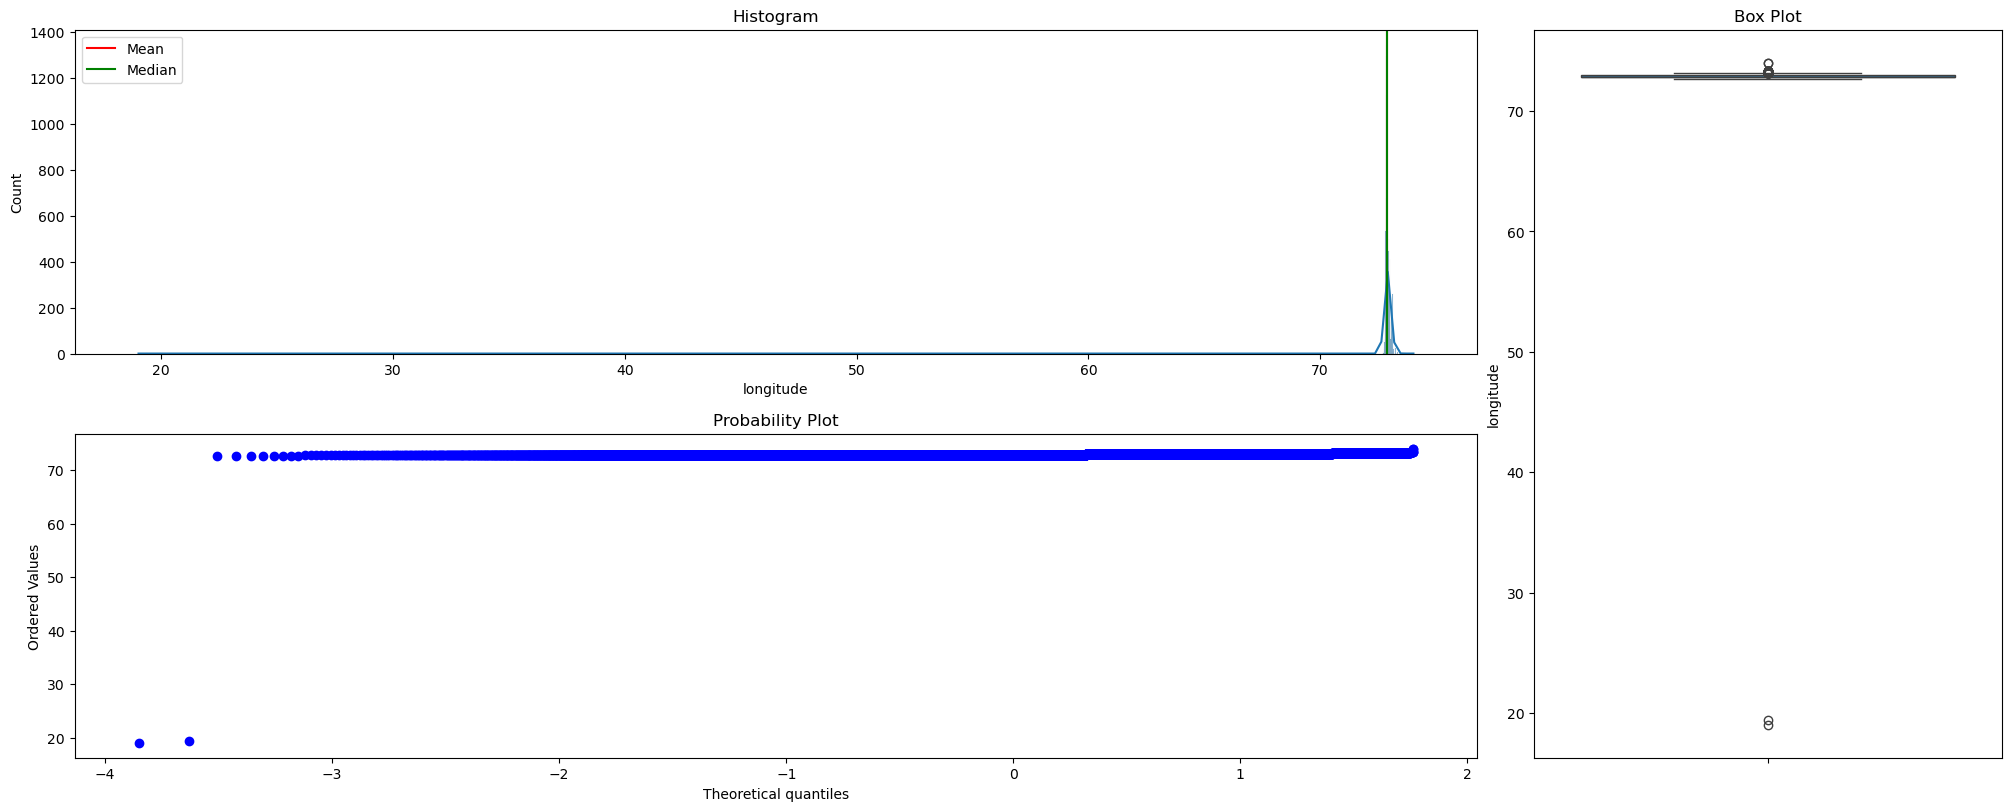

In [105]:
num_three_chart_plot(df, 'longitude')

`observation` 
- Majority of longitude values are concentrated near 70.
- Sparse distribution of values below 70.
- Outliers or minimal data points in lower longitude ranges.
- Most longitude values lie within a narrow range near the upper end (around 70).
- A few outliers are present, significantly lower than the main cluster (around 20).

In [106]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'longitude', quantiles_input)

skewness : -73.892059
kurtosis : 5542.795120
--------------------------------------------------------------------
Q1 (25th percentile): 72.8398
Q3 (75th percentile): 72.9634
IQR: 0.1236
Lower bound: 72.6545
Upper bound: 73.1487
--------------------------------------------------------------------
10th percentile   72.8257
75th percentile   72.9634


`observation` 
- Skewness (-73.89):  
  - The negative skewness indicates a strong left-skewed distribution.
  - This aligns with the presence of outliers at the lower longitude range, as seen in the boxplot.
- Kurtosis (5542.79):
  - The extremely high kurtosis value suggests the distribution has heavy tails and a sharp peak.
  - This indicates most of the data is tightly concentrated near the central value (around 70), with a few extreme outliers contributing to the heavy tails.
- Indicates the need for transformations (e.g., log, Box-Cox) or outlier treatment.

# emi

In [107]:
# no of unique categories and value_counts
analyze_value_counts(df, 'emi', top_n=5)  

Unique Categories in 'emi': 589
--------------------------------------------------
emi
0.41    173
0.50    169
0.56    165
0.32    164
0.90    162
Name: count, dtype: int64


In [108]:
#missing values and describe
analyze_column(df, 'emi')

Missing Values in 'emi': 2
--------------------------------------------------
count    11892.000000
mean         1.312083
std          1.911849
min          0.007450
25%          0.430000
50%          0.800000
75%          1.440000
max         36.080000
Name: emi, dtype: float64


`observation` 
- EMI values for flat purchases, measured in lakhs.
- 2 missing values
- EMIs range from ₹745 (min) to ₹36.08 lakh (max).
- Mean EMI is ₹1.31 lakh; median is ₹0.80 lakh.
- 75% of borrowers have an EMI of ₹1.44 lakh (₹1,44,000) or less.
- High standard deviation (₹1.91 lakh) indicates wide variation.
- Data is right-skewed, with some very high EMIs.

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


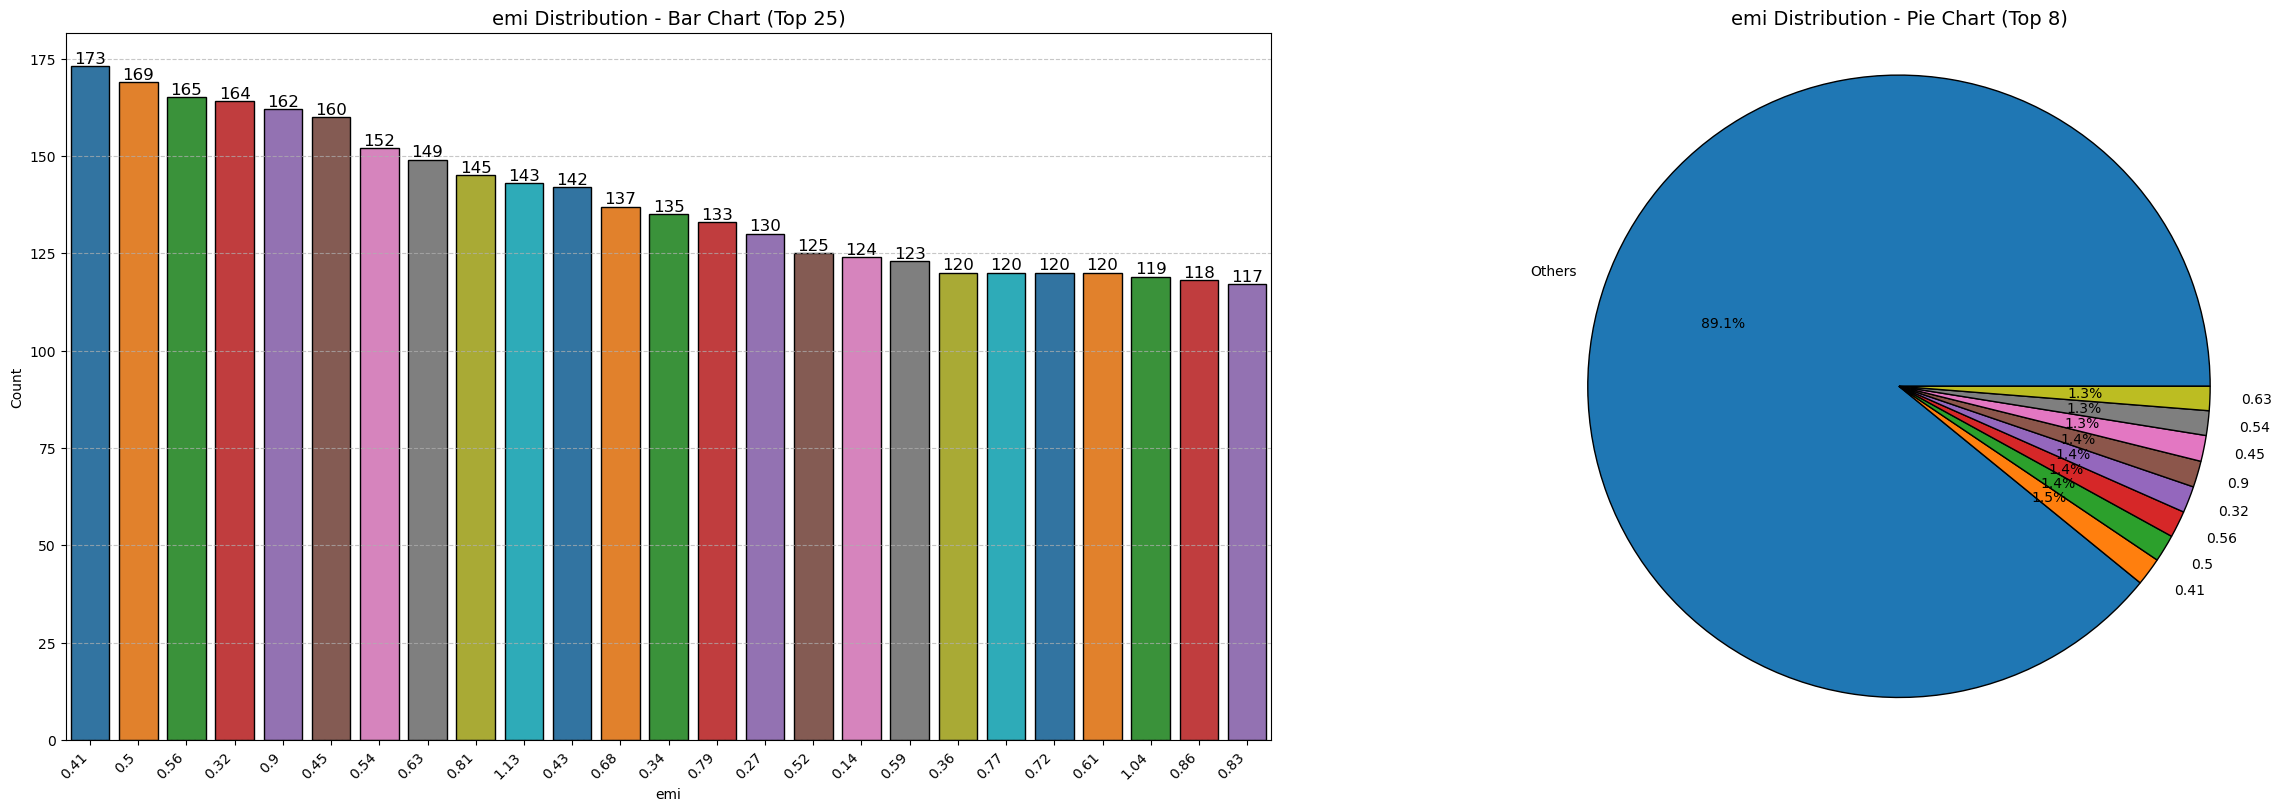

In [109]:
bar_pie_chart_plot(df, 'emi', bar_top_n=25, pie_top_n=8)

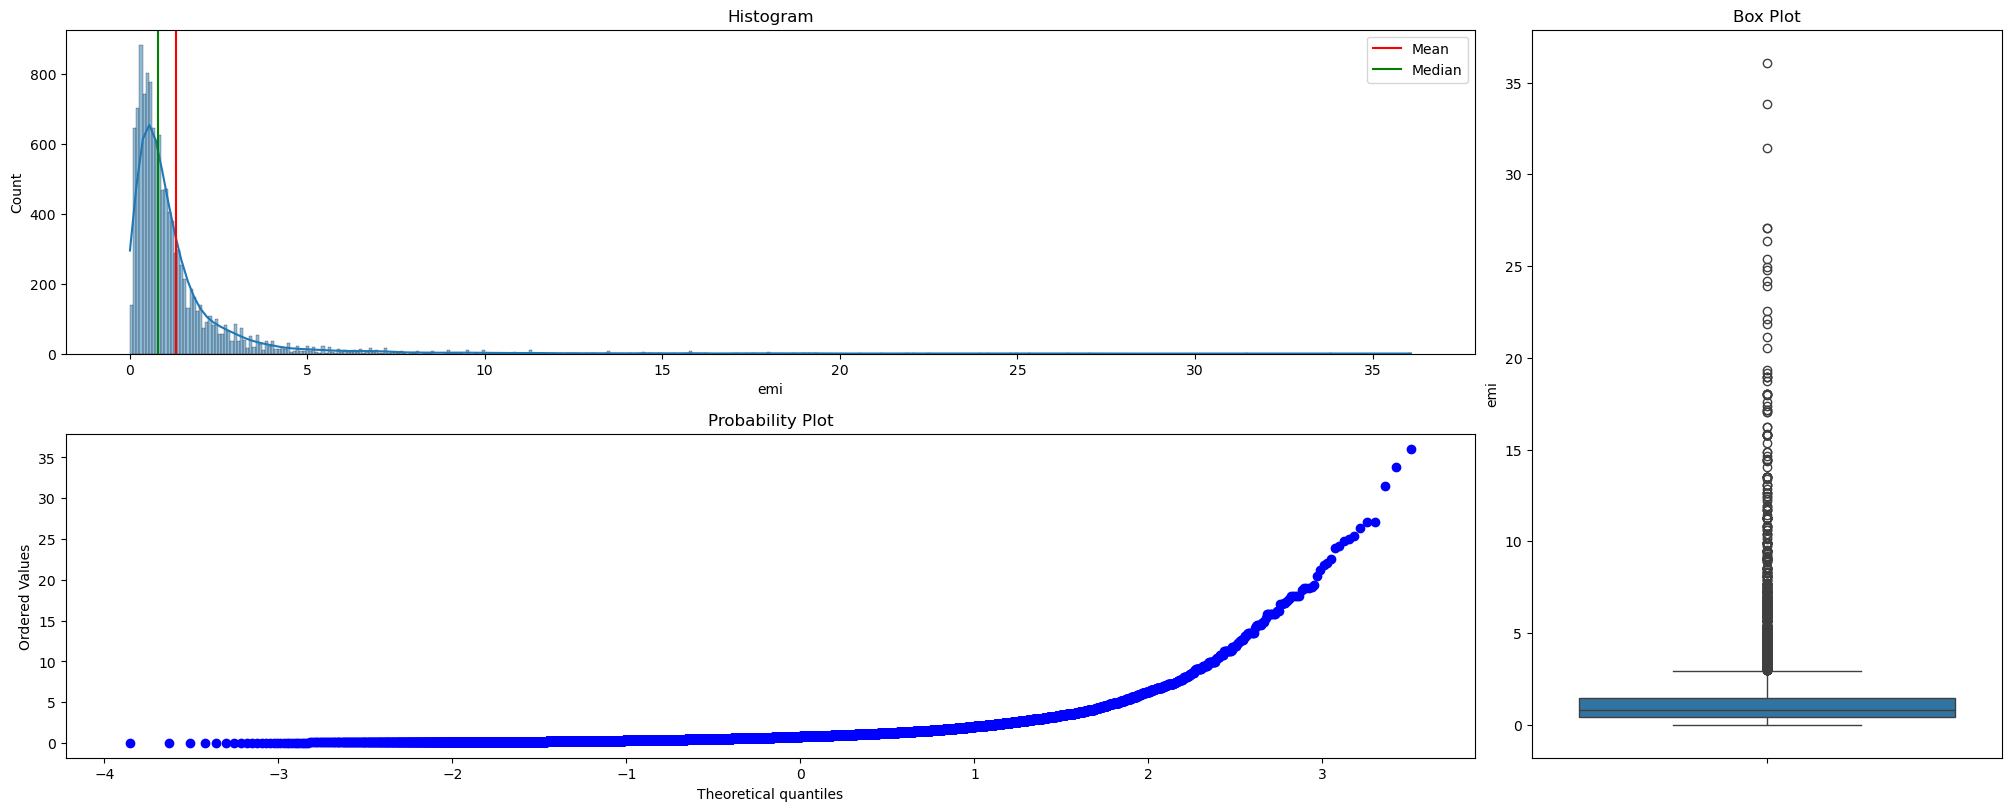

In [110]:
num_three_chart_plot(df, 'emi')

`observation`
- Most borrowers pay lower EMIs, likely below ₹2 lakh.
- The tail includes outliers, such as the maximum EMI of ₹36.08 lakh.
- A log transformation or outlier handling might be useful for further analysis.
- significant right skewness in the data.
- outliers are beyond the upper whisker, including extreme values like ₹36.08 lakh.
- The box (IQR) is narrow, indicating that the middle 50% of data points (25th to 75th percentile) are tightly packed between ₹0.43 lakh and ₹1.44 lakh.
- median EMI (₹0.80 lakh) lies closer to the lower quartile, reflecting the skewed distribution.

In [111]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'emi', quantiles_input)

skewness : 6.194895
kurtosis : 60.881588
--------------------------------------------------------------------
Q1 (25th percentile): 0.4300
Q3 (75th percentile): 1.4400
IQR: 1.0100
Lower bound: -1.0850
Upper bound: 2.9550
--------------------------------------------------------------------
10th percentile   0.2400
75th percentile   1.4400


`observation` 
- Skewness (6.19): Highly right-skewed distribution with a long tail of high EMI values.
- Kurtosis (60.88): Leptokurtic distribution with a sharp peak and heavy tails, indicating many outliers.

# project_in_acres

In [112]:
# no of unique categories and value_counts
analyze_value_counts(df, 'project_in_acres', top_n=5)  

Unique Categories in 'project_in_acres': 207
--------------------------------------------------
project_in_acres
1.0    1290
2.0     789
3.0     516
4.0     418
6.0     284
Name: count, dtype: int64


In [113]:
#missing values and describe
analyze_column(df, 'project_in_acres')

Missing Values in 'project_in_acres': 5750
--------------------------------------------------
count     6144.000000
mean        27.368613
std        728.786747
min          0.000000
25%          1.000000
50%          3.000000
75%          8.499900
max      55000.000000
Name: project_in_acres, dtype: float64


`observation` 
- project built on the land in acres
- 5750 missing values
- ranges from 0 to 55000
- mean is 27.37 acre and median is 3 acre
- 75% properties have built on land 8.49acre or less
- high std-dev indicates high variation
- data is right skewed with extreme high acres values 

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


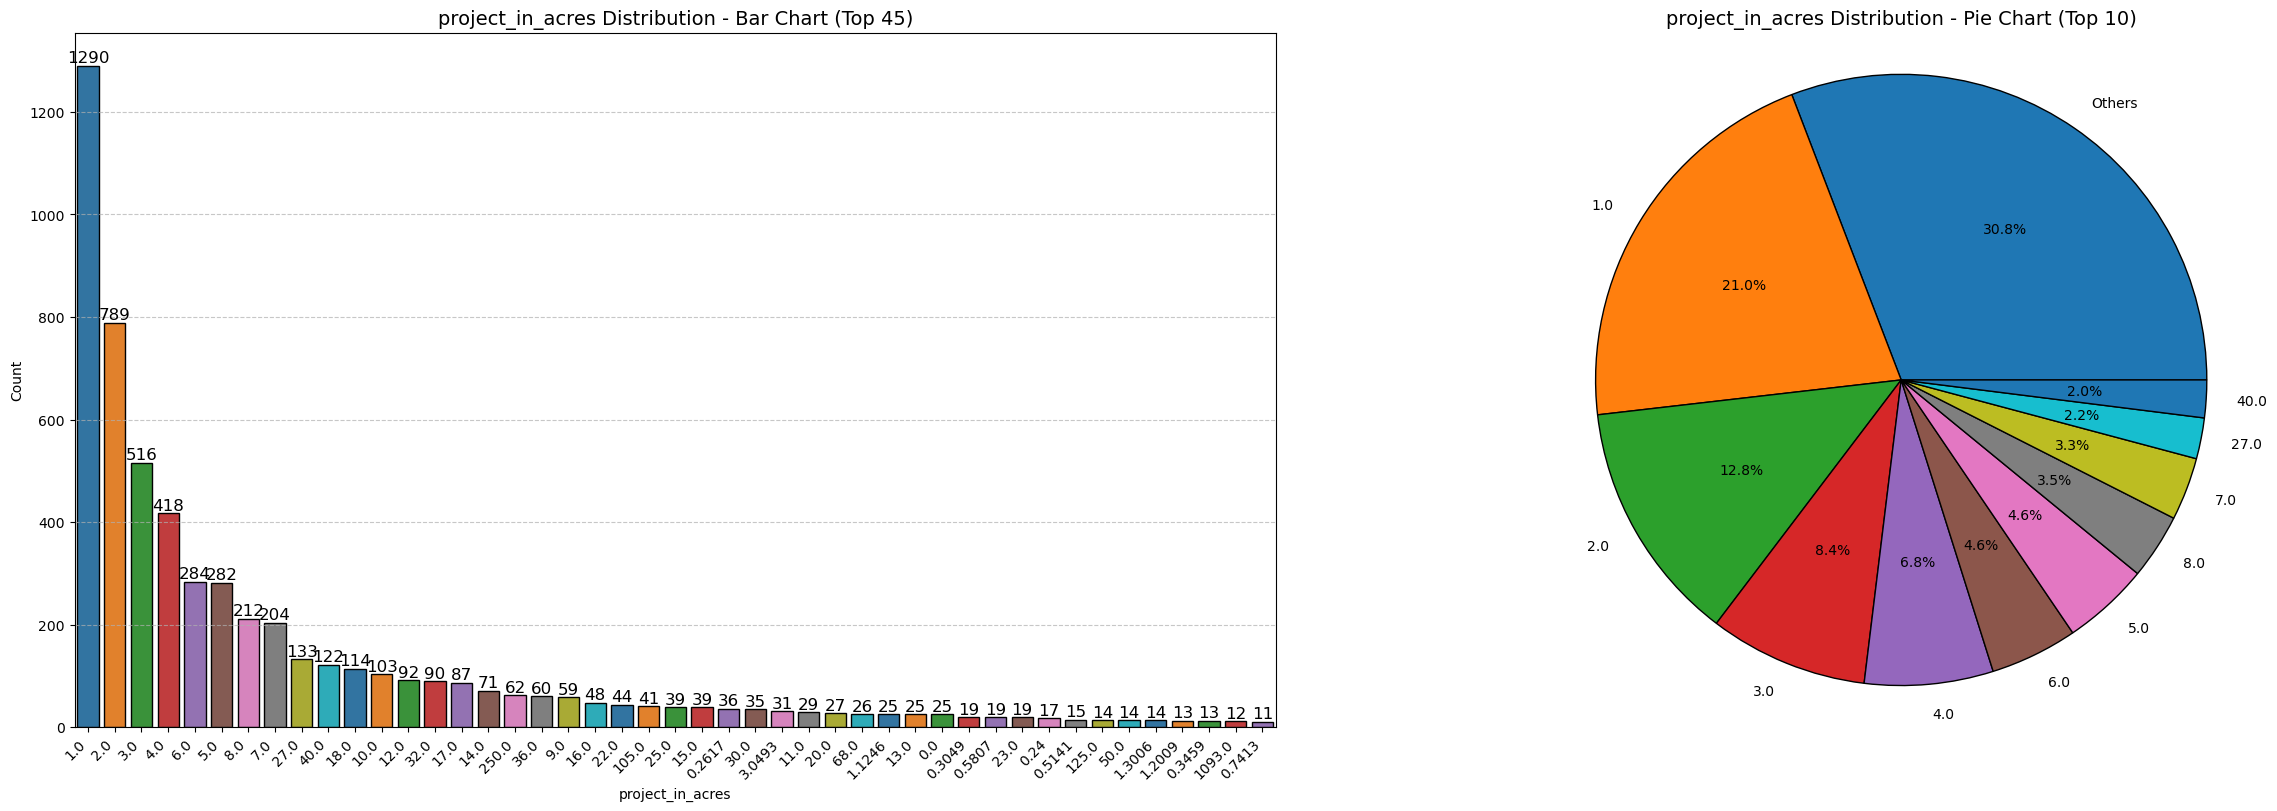

In [114]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'project_in_acres', bar_top_n=45, pie_top_n=10)

In [115]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'project_in_acres',9, 0.90)

Top 9 cumulative values:
project_in_acres
1.0     0.209961
2.0     0.338379
3.0     0.422363
4.0     0.490397
6.0     0.536621
5.0     0.582520
8.0     0.617025
7.0     0.650228
27.0    0.671875
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 37 Properties below 90.0% percentile: [0.0, 0.24, 0.2617, 0.3049, 0.5807, 1.0, 1.1246, 2.0, 3.0, 3.0493, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 20.0, 22.0, 23.0, 25.0, 27.0, 30.0, 32.0, 36.0, 40.0, 68.0, 105.0, 250.0]


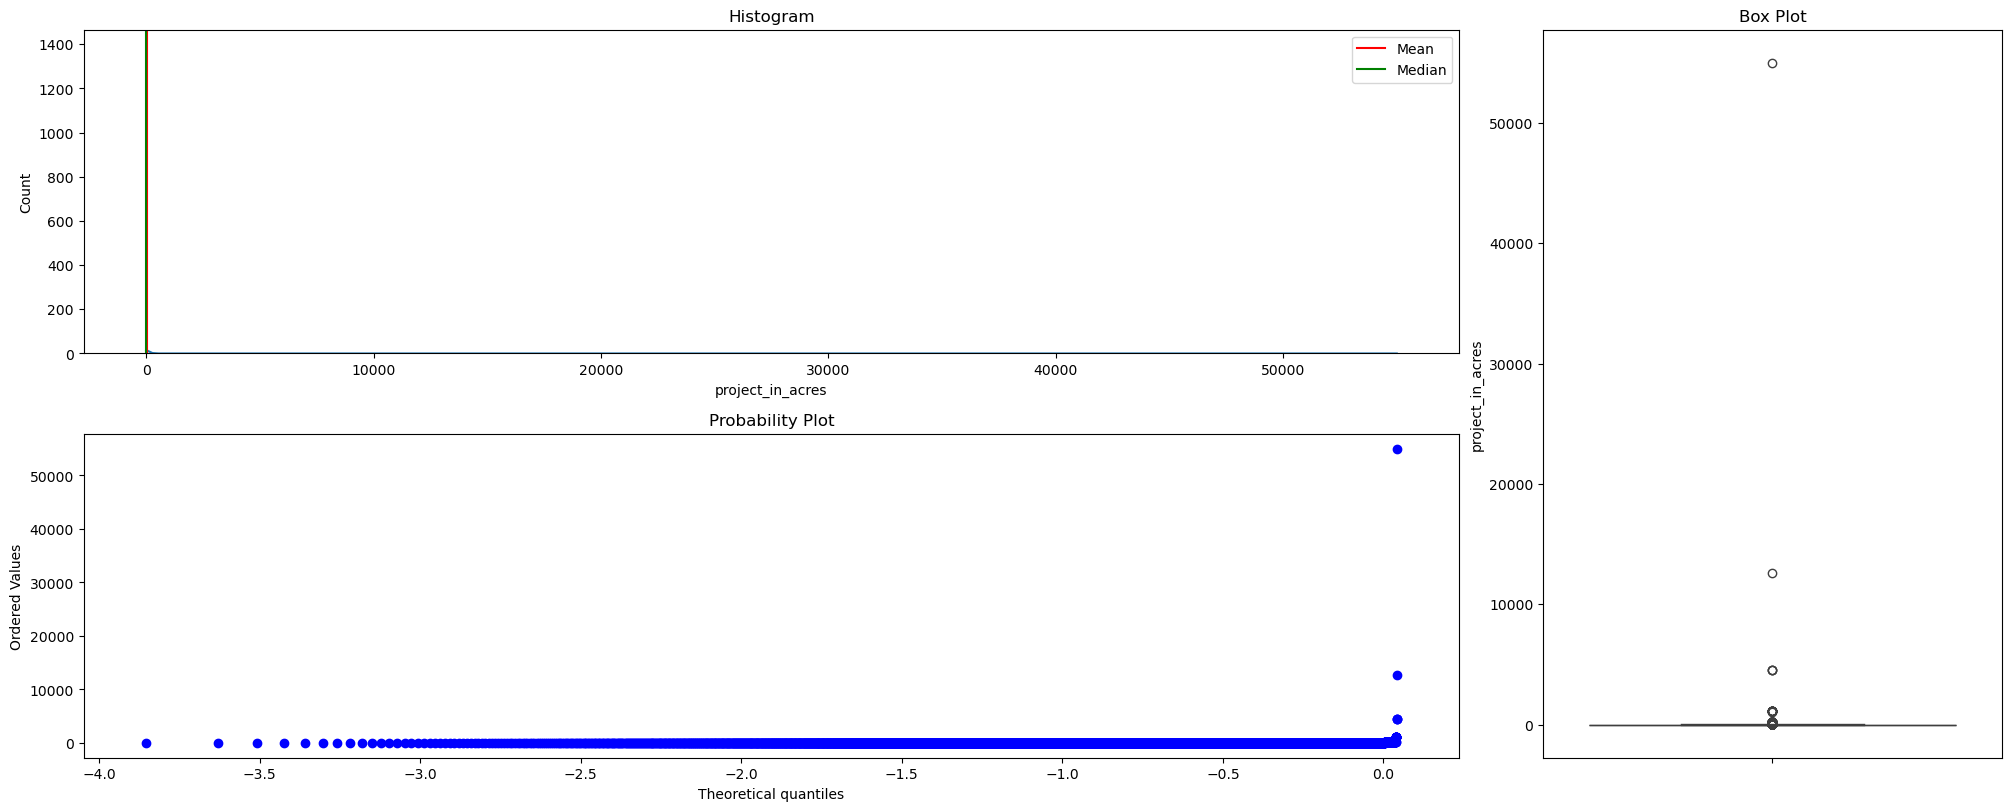

In [116]:
num_three_chart_plot(df, 'project_in_acres')

`observation` 
- Highly right-skewed.  
  Most projects have small acre land.  
- few projects with extremely high acre land (>10,000 acres).  
- Large variation in project sizes.
- Extreme values above 10,000 acres 
- most data concentrated near lower values.  
- High range with a few projects occupying vast land.

In [117]:
quantiles_input = [0.10, 0.75]  
analyze_distribution(df, 'project_in_acres', quantiles_input)

skewness : 70.849690
kurtosis : 5287.347961
--------------------------------------------------------------------
Q1 (25th percentile): 1.0000
Q3 (75th percentile): 8.4999
IQR: 7.4999
Lower bound: -10.2499
Upper bound: 19.7497
--------------------------------------------------------------------
10th percentile   1.0000
75th percentile   8.4999


`observation` 
- Skewness: 70.84, highly right-skewed distribution.  
- Kurtosis: 5287.34, sharp peaks and heavy tails due to outliers.  
- Data has extreme outliers, requiring transformation or outlier handling.  

# Univariate analysis on Categorical columns

In [118]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)
print("-" * 100)
print(f'Total categorical columns: {len(categorical_columns)}')

Index(['id', 'url', 'image', 'name', 'wholeaddress', 'address', 'flooring',
       'image_urls', 'construction', 'overlooking', 'ownership', 'extra_rooms',
       'builder', 'project_name', 'furnish', 'property_type', 'status',
       'facing', 'seller', 'addressregion', 'price_category', 'education',
       'transport', 'shopping_centre', 'commercial_hub', 'hospital', 'tourist',
       'location_from_wholeaddress'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Total categorical columns: 28


# construction

In [119]:
# no of unique categories and value_counts
analyze_value_counts(df, 'construction', top_n=5)  

Unique Categories in 'construction': 7
--------------------------------------------------
construction
under construction    4557
less than 5 years     1509
new construction      1467
5 to 10 years         1406
10 to 15 years         945
Name: count, dtype: int64


In [120]:
# missing values
df['construction'].isna().sum()

1056

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


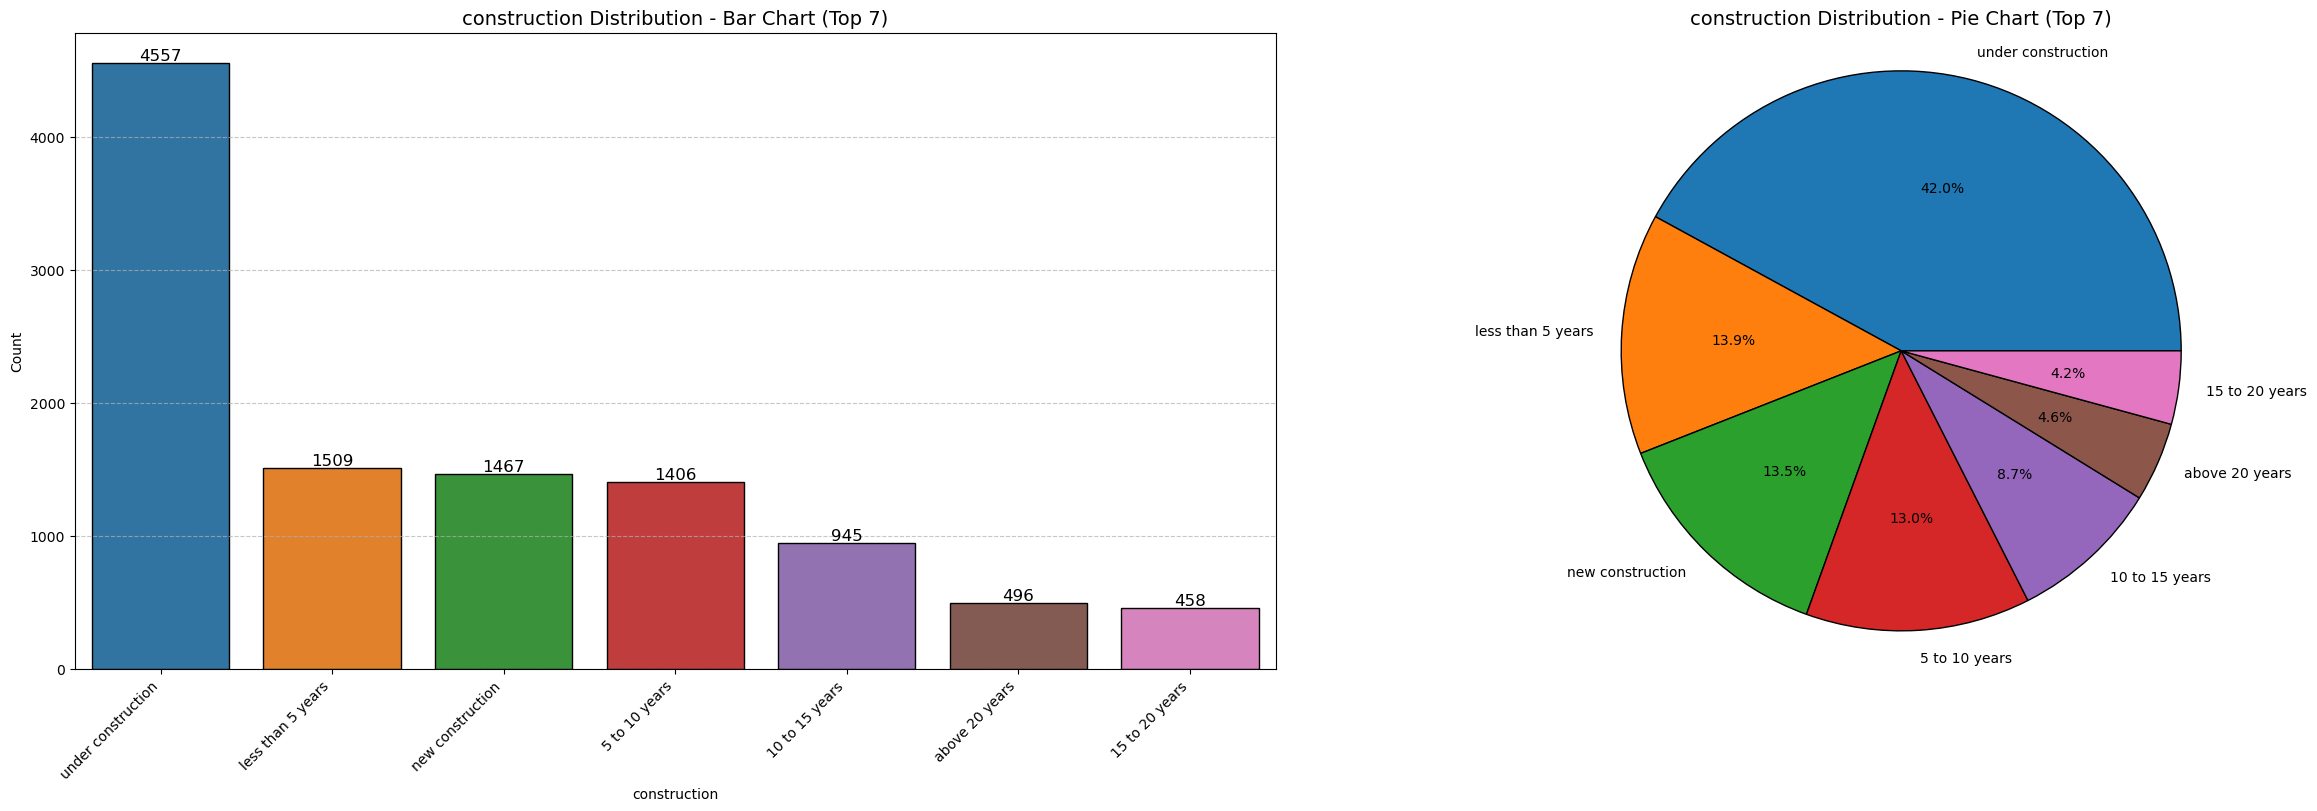

In [121]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'construction', bar_top_n=7, pie_top_n=7)

In [122]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'construction',9, 0.90)

Top 9 cumulative values:
construction
under construction    0.420465
less than 5 years     0.559697
new construction      0.695054
5 to 10 years         0.824783
10 to 15 years        0.911976
above 20 years        0.957741
15 to 20 years        1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 5 Properties below 90.0% percentile: ['10 to 15 years', '5 to 10 years', 'less than 5 years', 'new construction', 'under construction']


`observation` 
- 1056 missing values
- 3305 properties are older more than 5 years
- 1509 properties are less than 5 years old
- 4557 are under construction properties
- 1467 are new construction properties
- 42% properties are under construction and all other are completed properties
- make above 10 years as separate category 

# overlooking

In [123]:
# no of unique categories and value_counts
analyze_value_counts(df, 'overlooking', top_n=8)  

Unique Categories in 'overlooking': 7
--------------------------------------------------
overlooking
main road                       2244
garden/park, main road          1790
garden/park, main road, pool    1750
garden/park                     1536
garden/park, pool                451
pool                             102
main road, pool                   59
Name: count, dtype: int64


In [124]:
# missing values
df['overlooking'].isna().sum()

3962

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


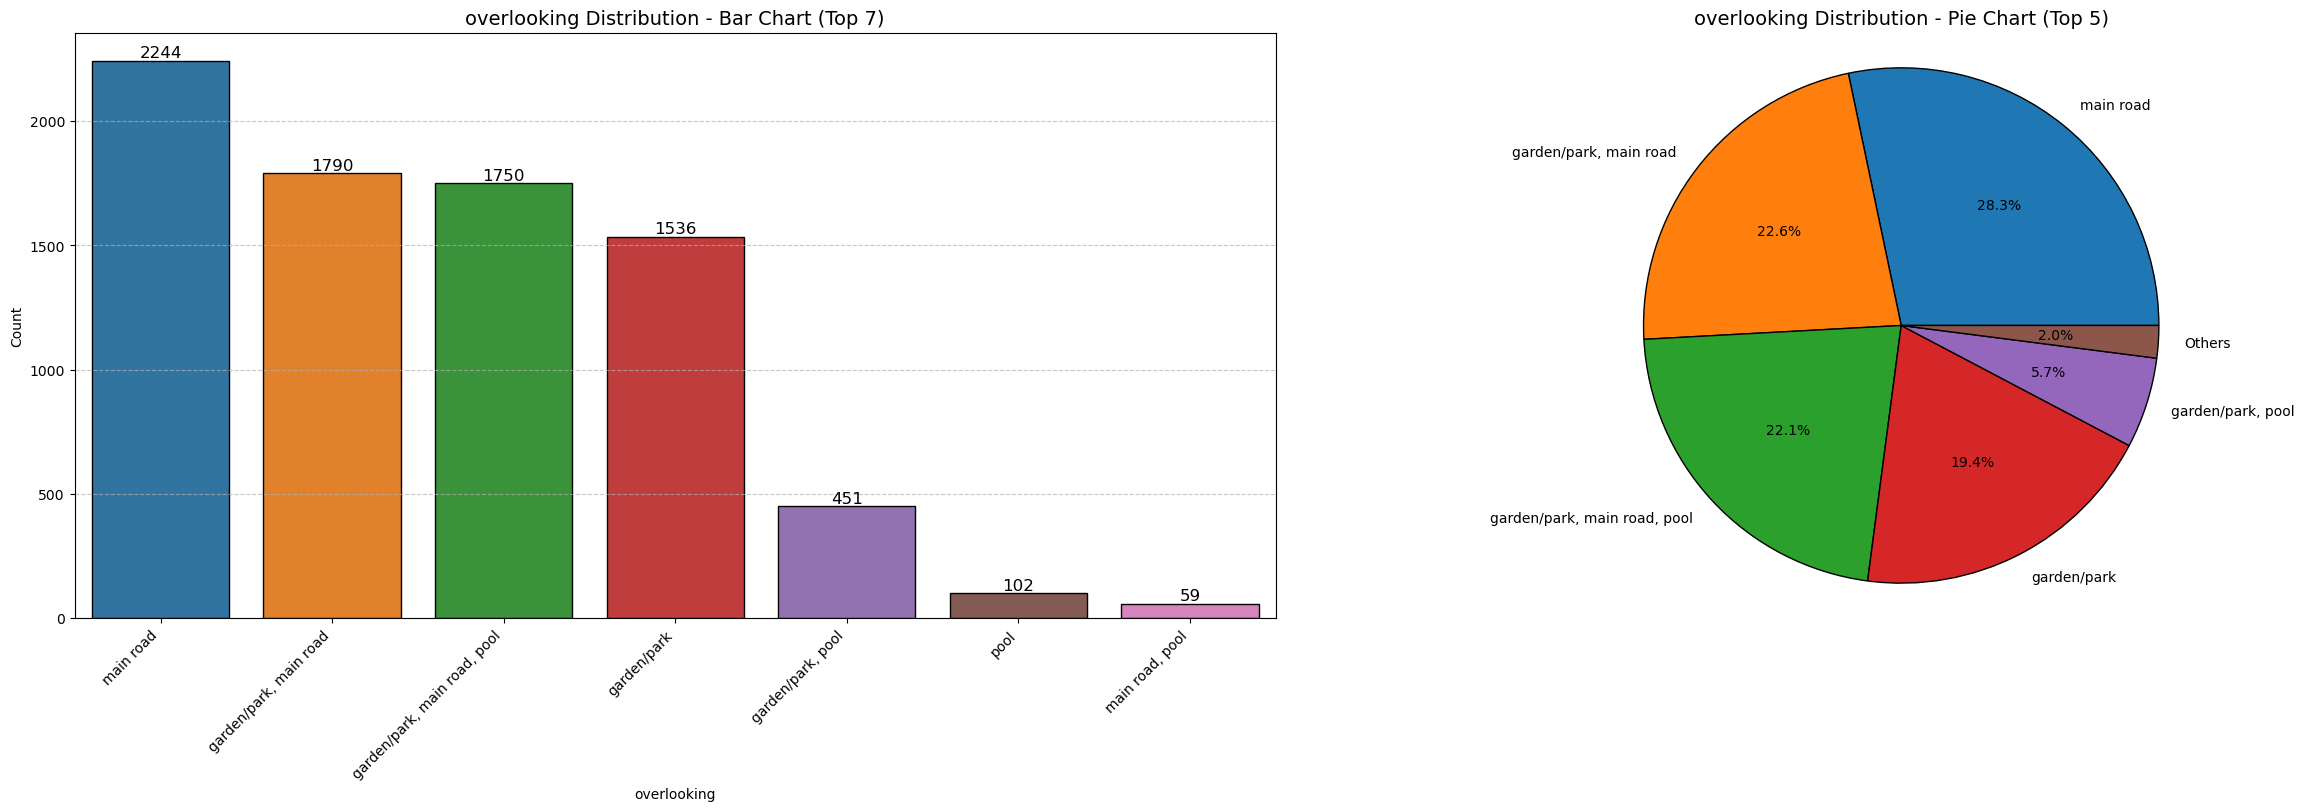

In [125]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'overlooking', bar_top_n=7, pie_top_n=5)

In [126]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'overlooking',7, 0.90)

Top 7 cumulative values:
overlooking
main road                       0.282905
garden/park, main road          0.508573
garden/park, main road, pool    0.729198
garden/park                     0.922844
garden/park, pool               0.979702
pool                            0.992562
main road, pool                 1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 4 Properties below 90.0% percentile: ['garden/park', 'garden/park, main road', 'garden/park, main road, pool', 'main road']


`observation`
- 3962 missing values
- main road and garden/park are the most common "overlooking" categories
- make 5th category as other(pool) which can have this combination garden/park, pool or main road, pool

# ownership

In [127]:
# no of unique categories and value_counts
analyze_value_counts(df, 'ownership', top_n=4)  

Unique Categories in 'ownership': 4
--------------------------------------------------
ownership
freehold                5923
co-operative society    2022
leasehold                317
power of attorney         28
Name: count, dtype: int64


In [128]:
# missing values
df['ownership'].isna().sum()

3604

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


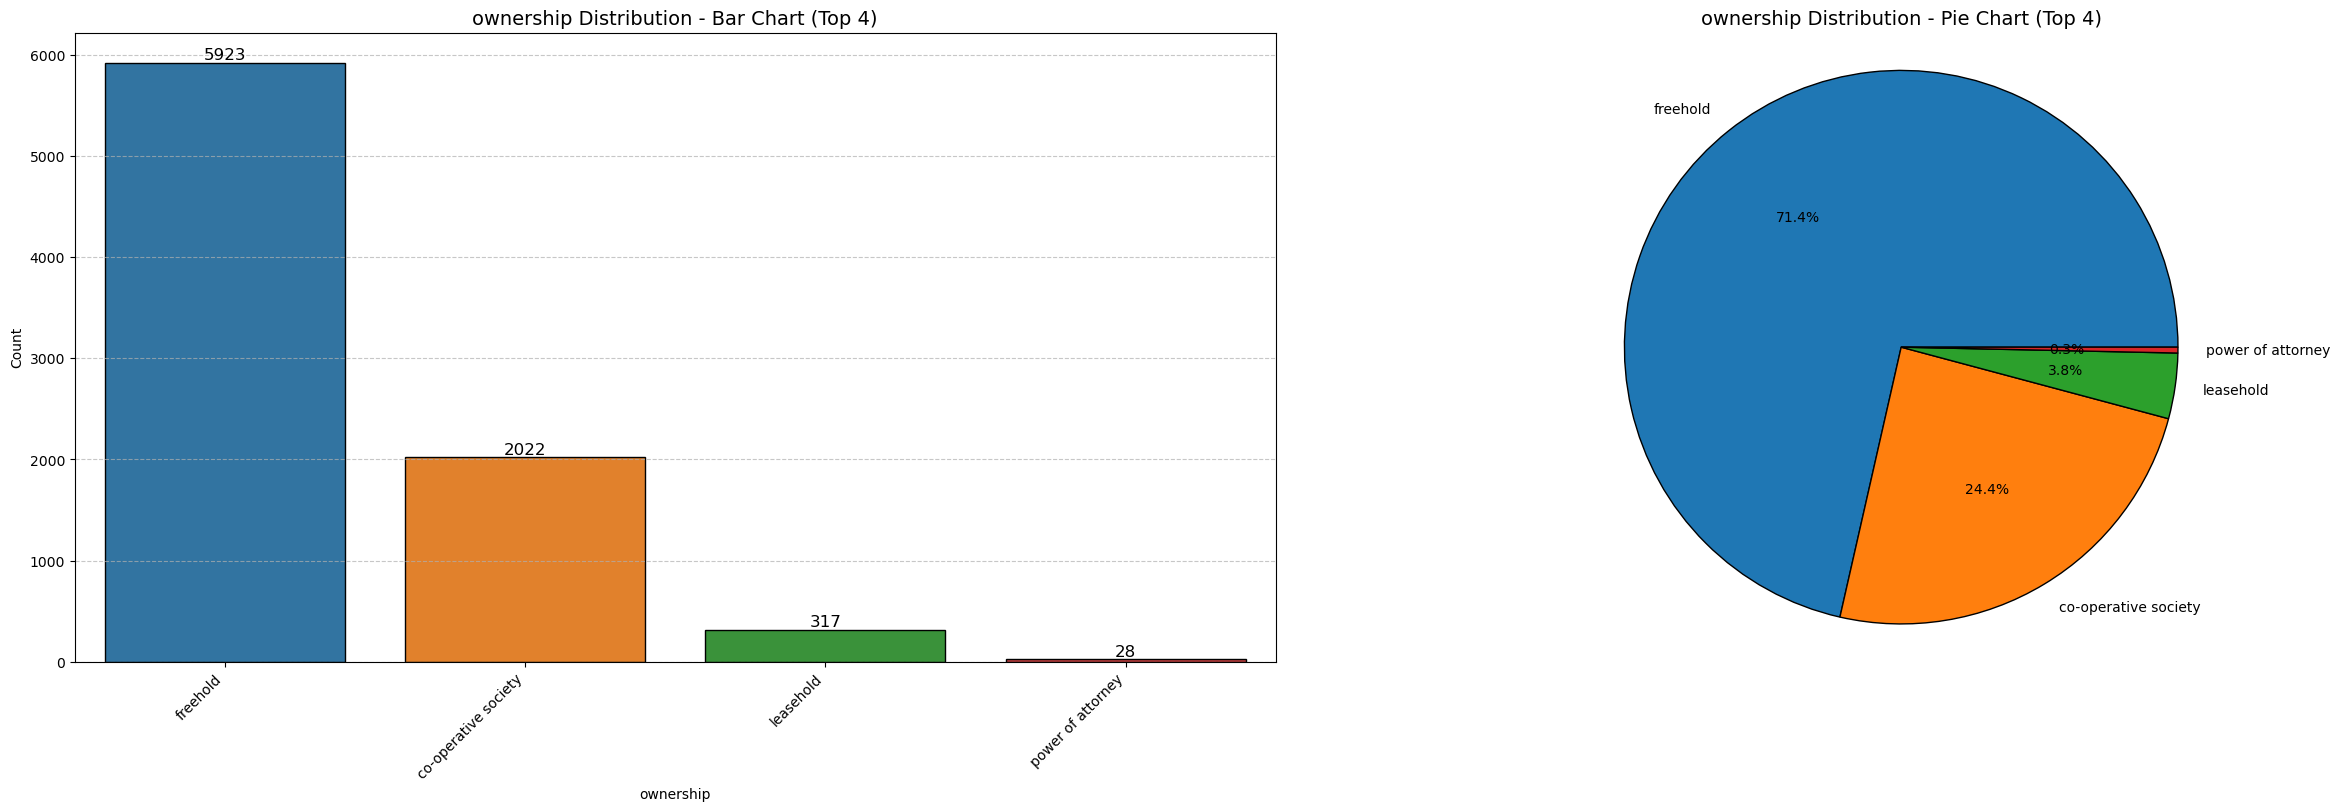

In [129]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'ownership', bar_top_n=4, pie_top_n=4)

`observation`
- freehold - owner has complete ownership of both the building and the land it is built on.
- leasehold - buyer owns the building but not the land it is built on.the land is leased from a landlord (often referred to as the freeholder) for a specific period, typically ranging from 30 to 99 years or more.
- Co-operative society in property ownership refers to a housing arrangement where the property (e.g., an apartment building) is owned and managed by a co-operative society
- Power of Attorney (PoA) in property allows a person (the principal) to authorize another (the agent) to manage, sell, lease, or transfer property on their behalf, without granting ownership.

In [130]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'ownership',4, 0.90)

Top 4 cumulative values:
ownership
freehold                0.714475
co-operative society    0.958384
leasehold               0.996622
power of attorney       1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: ['co-operative society', 'freehold']


`observation`
- 3604 missing values
- most of the properties are from freehold properties 71.44% followed by the co-op society 

# extra_rooms

In [131]:
# no of unique categories and value_counts
analyze_value_counts(df, 'extra_rooms', top_n=16)  

Unique Categories in 'extra_rooms': 16
--------------------------------------------------
extra_rooms
none of these                  3005
store                          1112
puja                            743
puja, servant, store, study     316
study                           309
servant                         296
puja, store                     229
puja, store, study              132
store, study                     89
servant, store                   86
puja, study                      77
puja, servant                    63
puja, servant, store             56
puja, servant, study             32
servant, store, study            29
servant, study                   24
Name: count, dtype: int64


In [132]:
# missing values
df['extra_rooms'].isna().sum()

5296

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


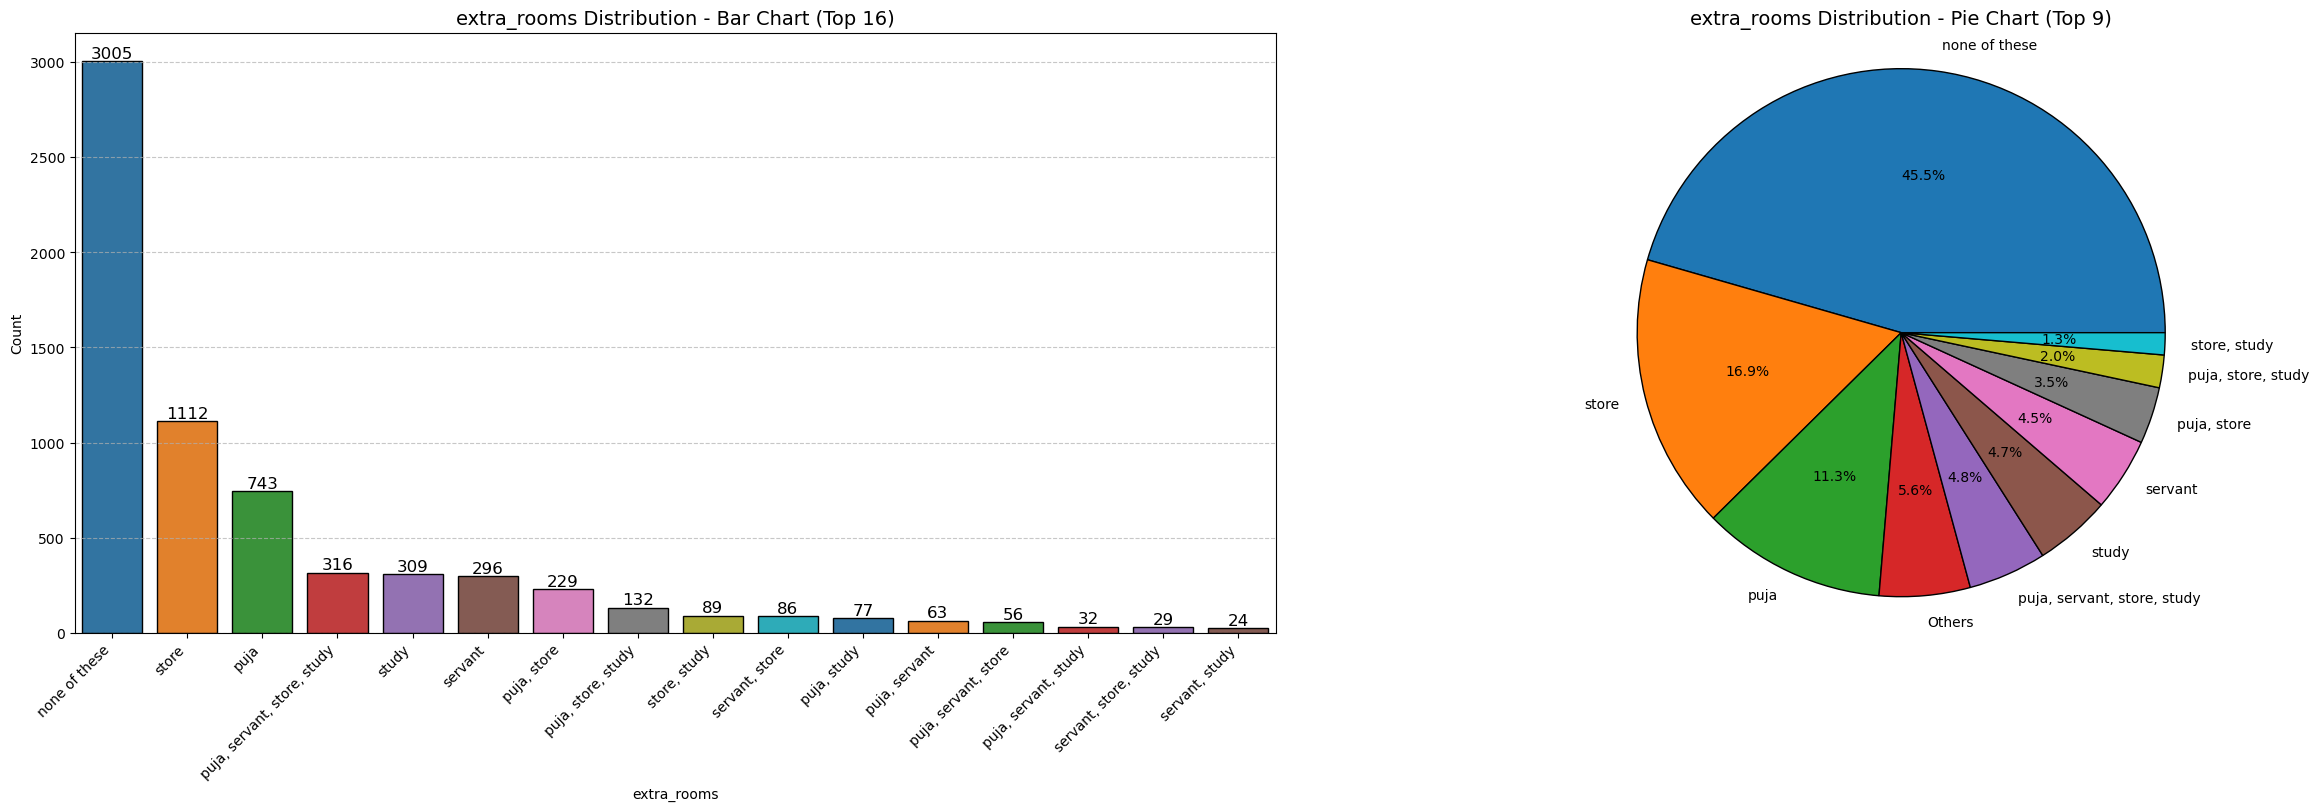

In [133]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'extra_rooms', bar_top_n=16, pie_top_n=9)

In [134]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'extra_rooms',9, 0.90)

Top 9 cumulative values:
extra_rooms
none of these                  0.455441
store                          0.623977
puja                           0.736587
puja, servant, store, study    0.784480
study                          0.831313
servant                        0.876175
puja, store                    0.910882
puja, store, study             0.930888
store, study                   0.944377
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 7 Properties below 90.0% percentile: ['none of these', 'puja', 'puja, servant, store, study', 'puja, store', 'servant', 'store', 'study']


`observation`
- 5296 missing values
- 45.54% properties dont have extra rooms
- most properties have store room followed by puja,study,servant
- feature engineering for this column eg: puja,servant so consider this as 2 rooms 

# builder

In [135]:
# no of unique categories and value_counts
analyze_value_counts(df, 'builder', top_n=8)  

Unique Categories in 'builder': 1146
--------------------------------------------------
builder
lodha group           468
godrej properties     277
rustomjee             241
piramal realty        227
oberoi realty ltd.    199
hiranandani group     171
l&t realty            153
runwal group          144
Name: count, dtype: int64


In [136]:
# missing values
df['builder'].isna().sum()

4273

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


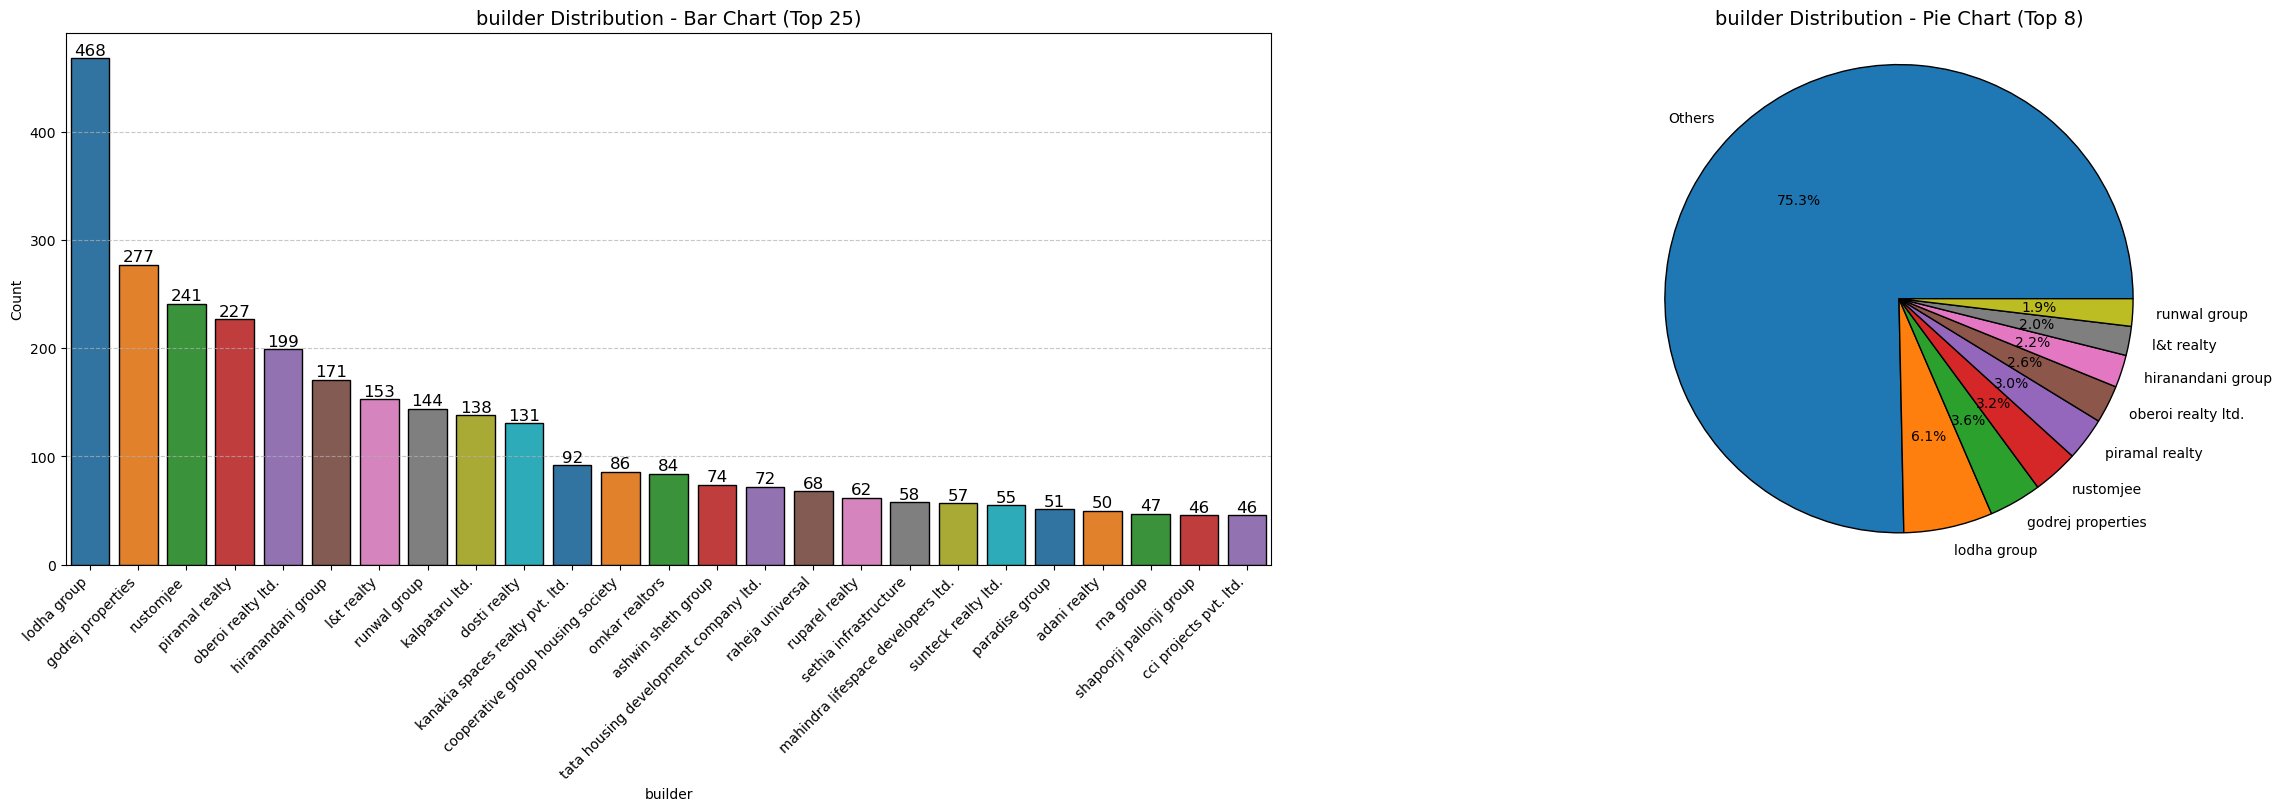

In [137]:
bar_pie_chart_plot(df, 'builder', bar_top_n=25, pie_top_n=8)

In [138]:
project_counts = df['builder'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "High (50-100)": int(((project_counts >= 50) & (project_counts <= 100)).sum()),
    "Average (10-49)": int(((project_counts >= 10) & (project_counts < 50)).sum()),
    "Low (2-9)": int(((project_counts > 1) & (project_counts < 10)).sum()),
    "Very Low (1)": int((project_counts == 1).sum())
}
frequency_bins

{'High (50-100)': 12,
 'Average (10-49)': 124,
 'Low (2-9)': 499,
 'Very Low (1)': 501}

`observation`
- High cardinality feature 
- total 1146 unique builders   
- The top 49 builders have 50 percent of the projects and the rest 50 percent of the properties come under the remaining 1097 builders
- while doing the train test split ensure that the train-test split maintains the same proportion of high-volume and low-volume projects to prevent bias during training and testing. i.e do statified sampling
  - High (50-100): 12 builders have done 50 to 100 projects 
  - Average (10-49): 124 builders have done 10 to 149 projects 
  - Low (2-9): 499 builders have done 2 to 9 projects 
  - Very Low (1): 501 builders have done only 1 project
- Total 4273 missing values 

# project_name

In [139]:
# no of unique categories and value_counts
analyze_value_counts(df, 'project_name', top_n=5)  

Unique Categories in 'project_name': 2943
--------------------------------------------------
project_name
oberoi sky city     96
piramal vaikunth    90
tata serein         71
omkar alta monte    67
rustomjee crown     66
Name: count, dtype: int64


In [140]:
# missing values
df['project_name'].isna().sum()

3495

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


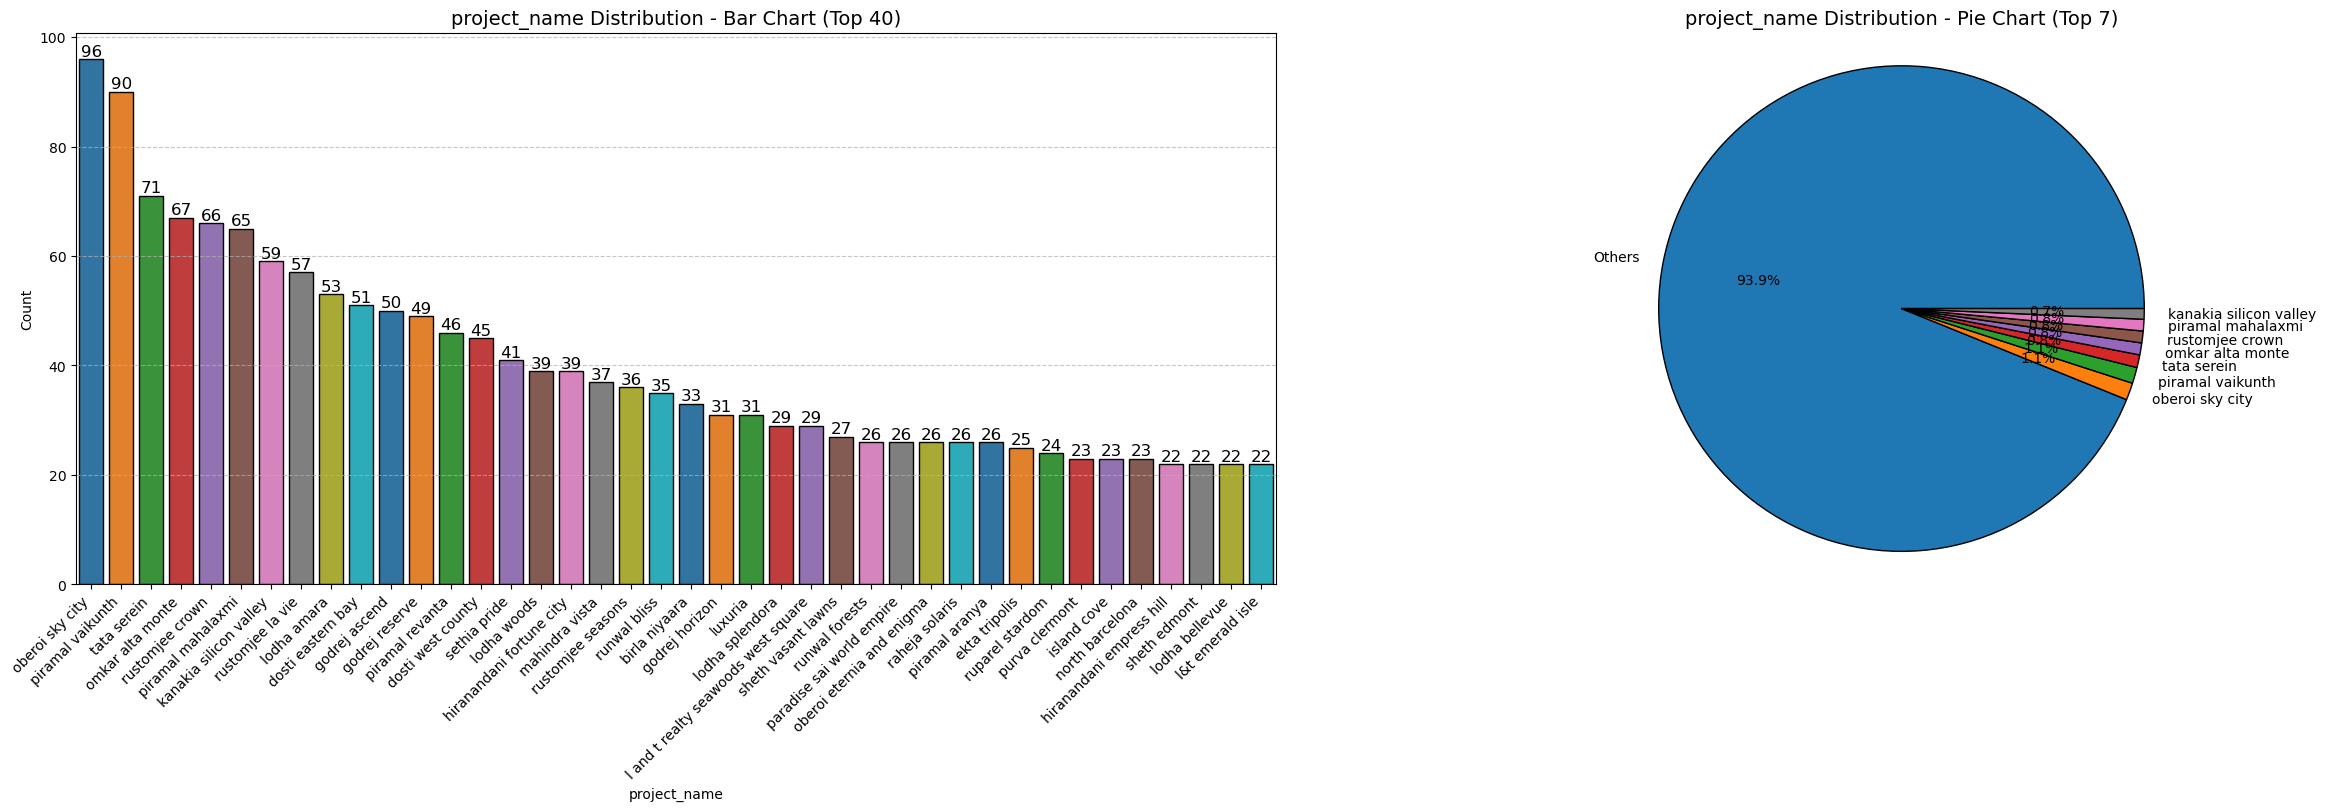

In [141]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'project_name', bar_top_n=40, pie_top_n=7)

creating categories for project_name 

In [142]:
society_counts = df['project_name'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "High (50-100)": int(((society_counts >= 50) & (society_counts <= 100)).sum()),
    "Average (10-49)": int(((society_counts >= 10) & (society_counts < 50)).sum()),
    "Low (2-9)": int(((society_counts > 1) & (society_counts < 10)).sum()),
    "Very Low (1)": int((society_counts == 1).sum())
}
frequency_bins

{'High (50-100)': 11,
 'Average (10-49)': 142,
 'Low (2-9)': 1011,
 'Very Low (1)': 1779}

`Observation`
- High cardinality feature 
- total 2943 unique project_name   
- The top 317 project_names have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 2626 project_names
- while doing the train test split ensure that the train-test split maintains the same proportion of high-volume and low-volume projects to prevent bias during training and testing. i.e do statified sampling
  - High (50-100): 11 societies have between 50 to 100 listings.
  - Average (10-49): 142 societies fall in this range with 10 to 49 listings each.
  - Low (2-9): 1011 societies have between 2 to 9 listings.
  - Very Low (1): A significant number, 1779 societies, have only 1 listing.
- Total 3495 missing values 

# furnish

In [143]:
# no of unique categories and value_counts
analyze_value_counts(df, 'furnish', top_n=5)  

Unique Categories in 'furnish': 3
--------------------------------------------------
furnish
unfurnished       7480
semi-furnished    3198
furnished         1177
Name: count, dtype: int64


In [144]:
# missing values
df['furnish'].isna().sum()

39

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


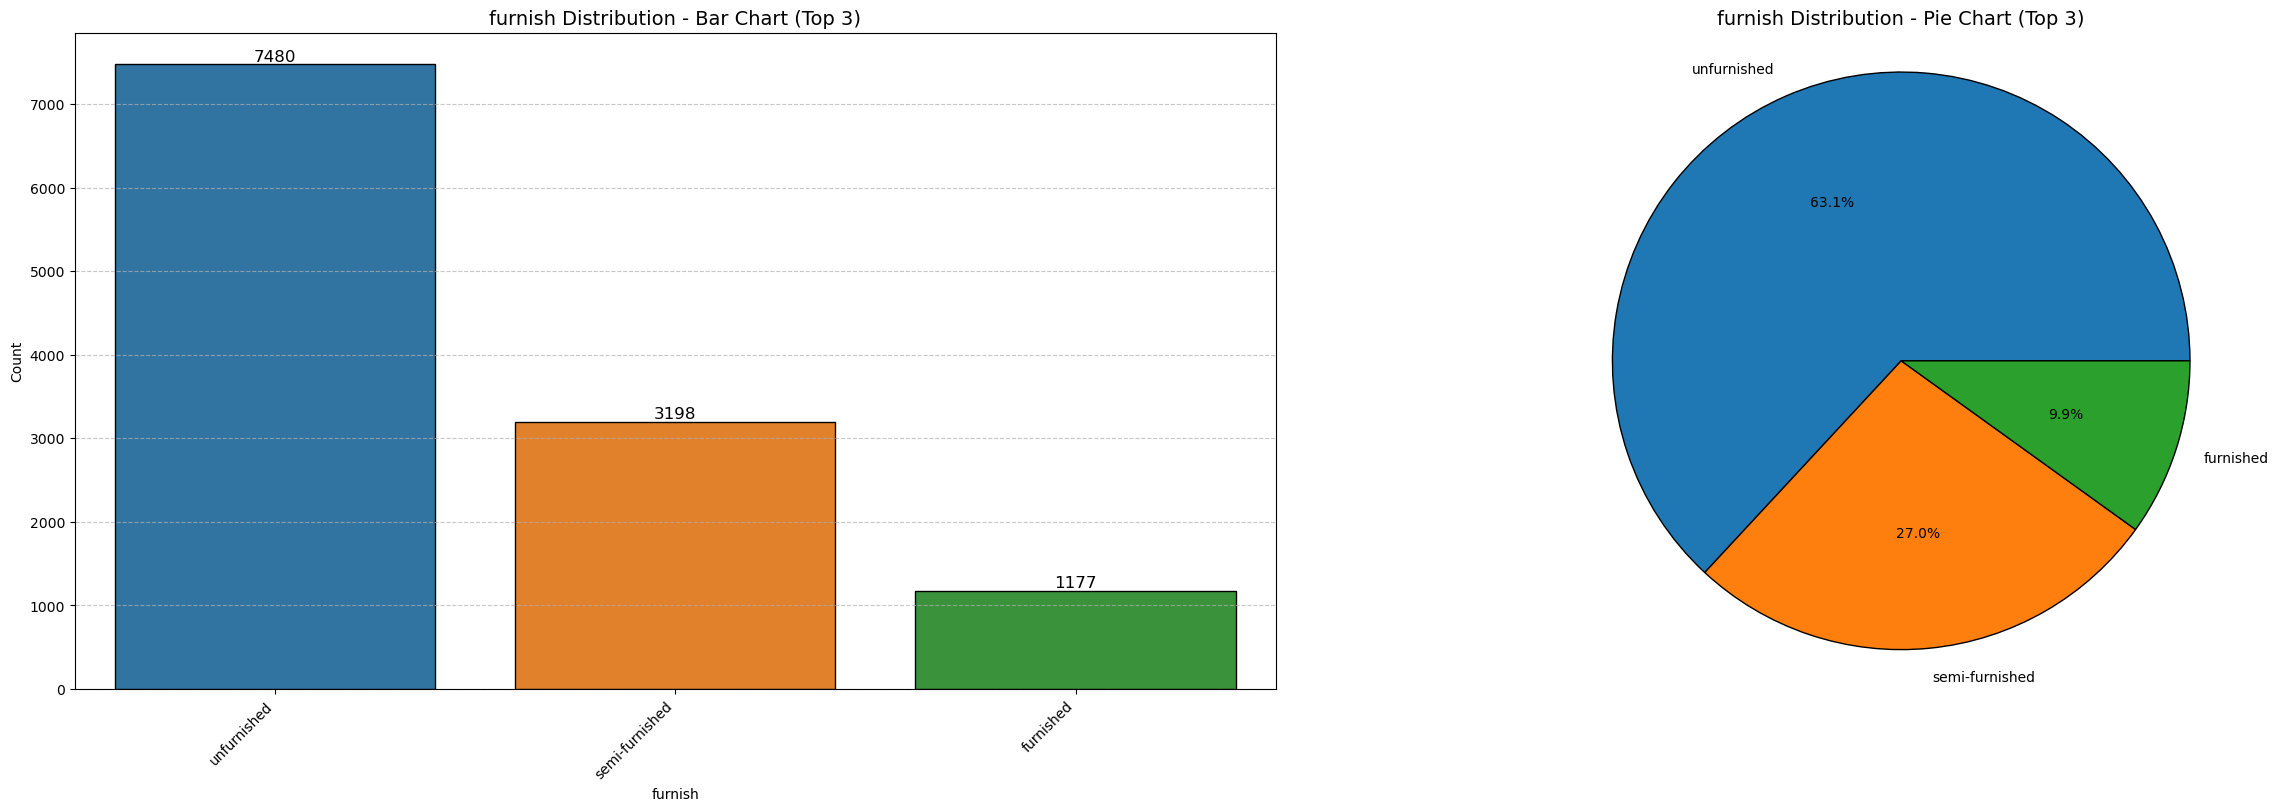

In [145]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'furnish', bar_top_n=3, pie_top_n=3)

`observation`
- 39 missing values
- unfurnished(63.10%) properties are more followed by semi-furnished(26.99%) and furnished(9.91%)

In [146]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'furnish',3, 0.90)

Top 3 cumulative values:
furnish
unfurnished       0.630957
semi-furnished    0.900717
furnished         1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: ['semi-furnished', 'unfurnished']


# property_type

In [147]:
# no of unique categories and value_counts
analyze_value_counts(df, 'property_type', top_n=5)  

Unique Categories in 'property_type': 2
--------------------------------------------------
property_type
resale          6724
new property    5167
Name: count, dtype: int64


In [148]:
# missing values
df['property_type'].isna().sum()

3

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


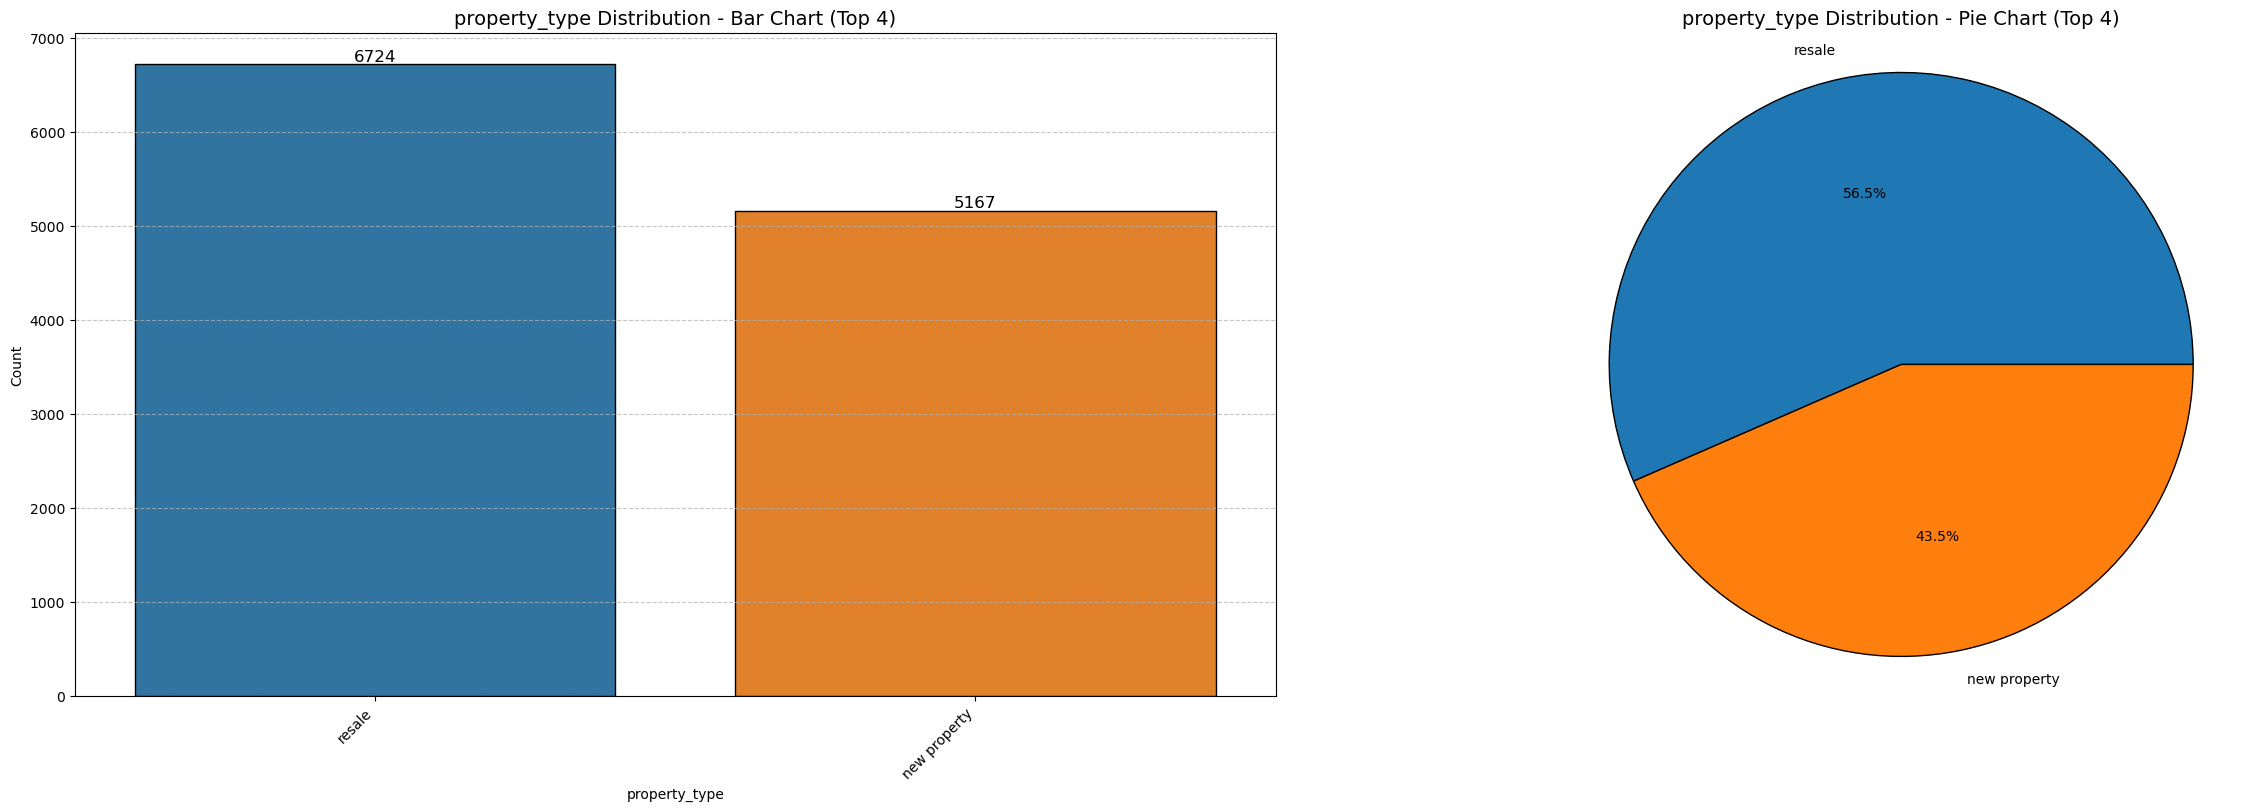

In [149]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'property_type', bar_top_n=4, pie_top_n=4)

In [150]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'property_type',4, 0.90)

Top 4 cumulative values:
property_type
resale          0.56547
new property    1.00000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: ['new property', 'resale']


`observation`
- 3 missing values 
- 56.50% data is resale
- 43.5% data is new property
- and remaining 0.069% is other,nan and rent properties 

# status

In [151]:
# no of unique categories and value_counts
analyze_value_counts(df, 'status', top_n=3)  

Unique Categories in 'status': 3
--------------------------------------------------
status
ready to move         7251
under construction    4557
ongoing                  3
Name: count, dtype: int64


In [152]:
# missing values
df['status'].isna().sum()

83

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


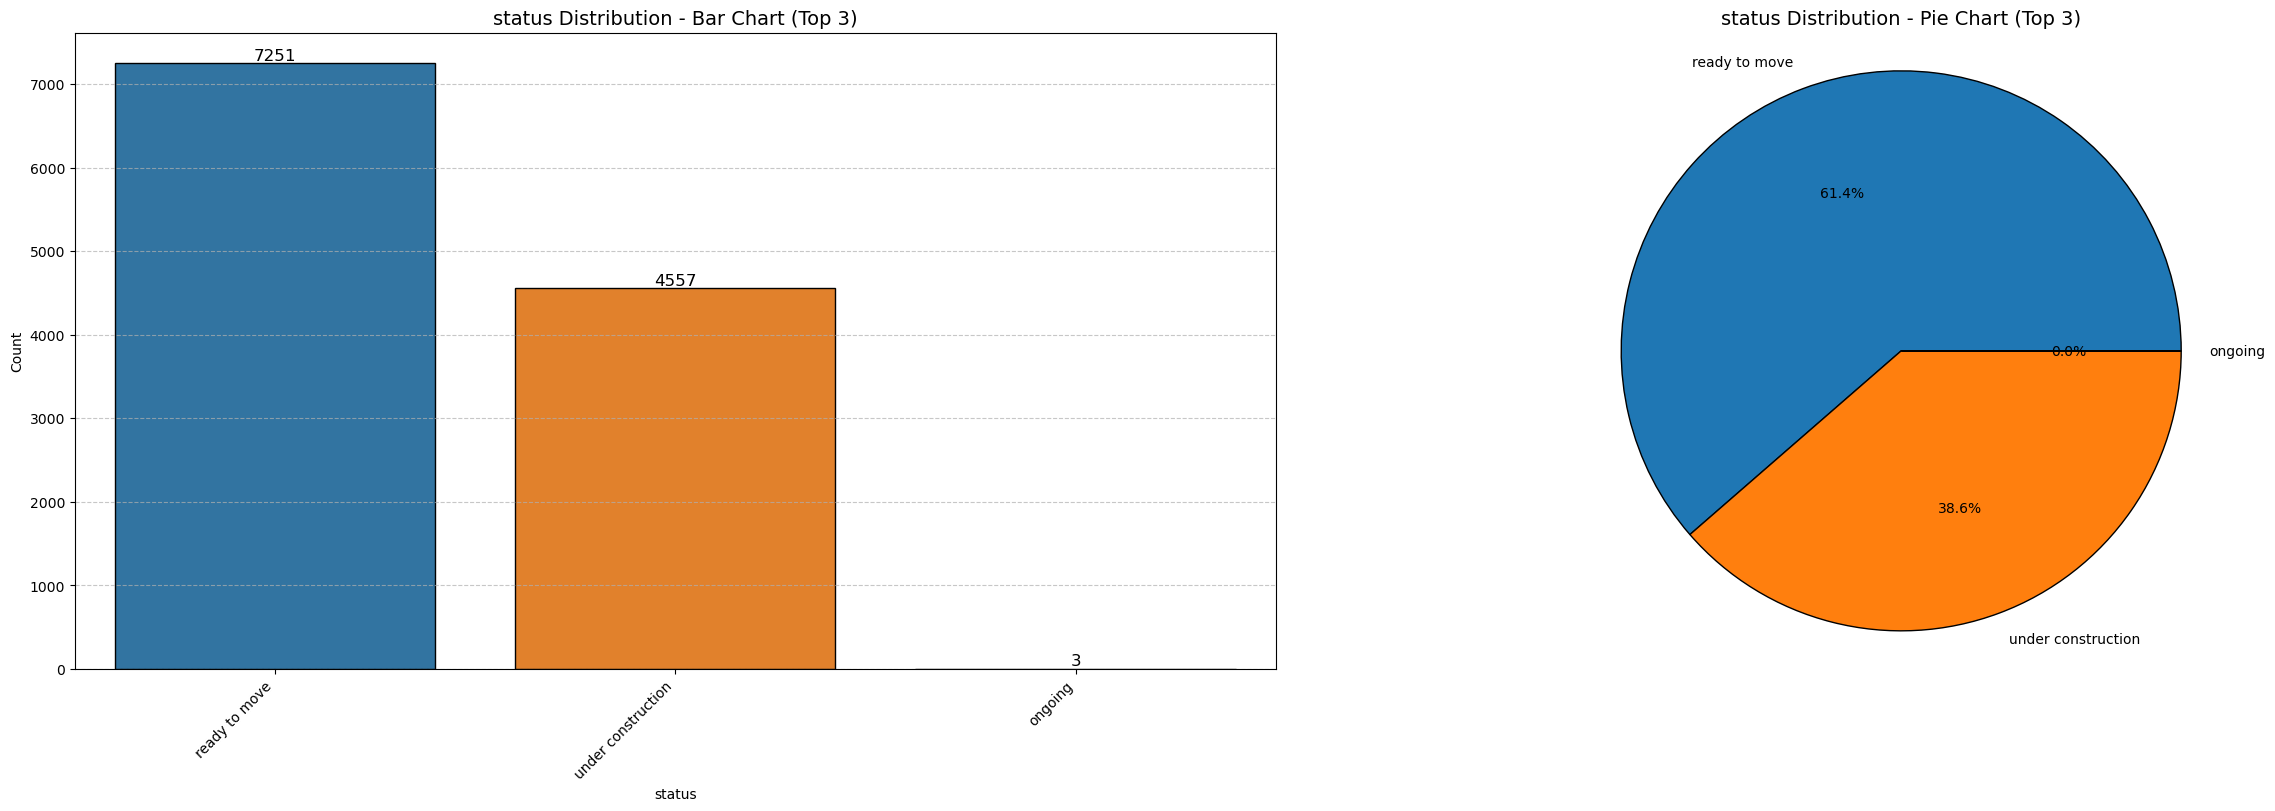

In [153]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'status', bar_top_n=3, pie_top_n=3)

In [154]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'status',3, 0.90)

Top 3 cumulative values:
status
ready to move         0.613919
under construction    0.999746
ongoing               1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: ['ready to move', 'under construction']


`observation`
- 83 missing values
- 61.4% are ready to move properties
- 38.6% under construction properties
- 0.030 are ongoing,immediatly and nan properties 

# facing

In [155]:
# no of unique categories and value_counts
analyze_value_counts(df, 'facing', top_n=5)  

Unique Categories in 'facing': 8
--------------------------------------------------
facing
east            4737
north - east    1265
west             916
north            665
north - west     193
Name: count, dtype: int64


In [156]:
# missing values
df['facing'].isna().sum()

3730

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


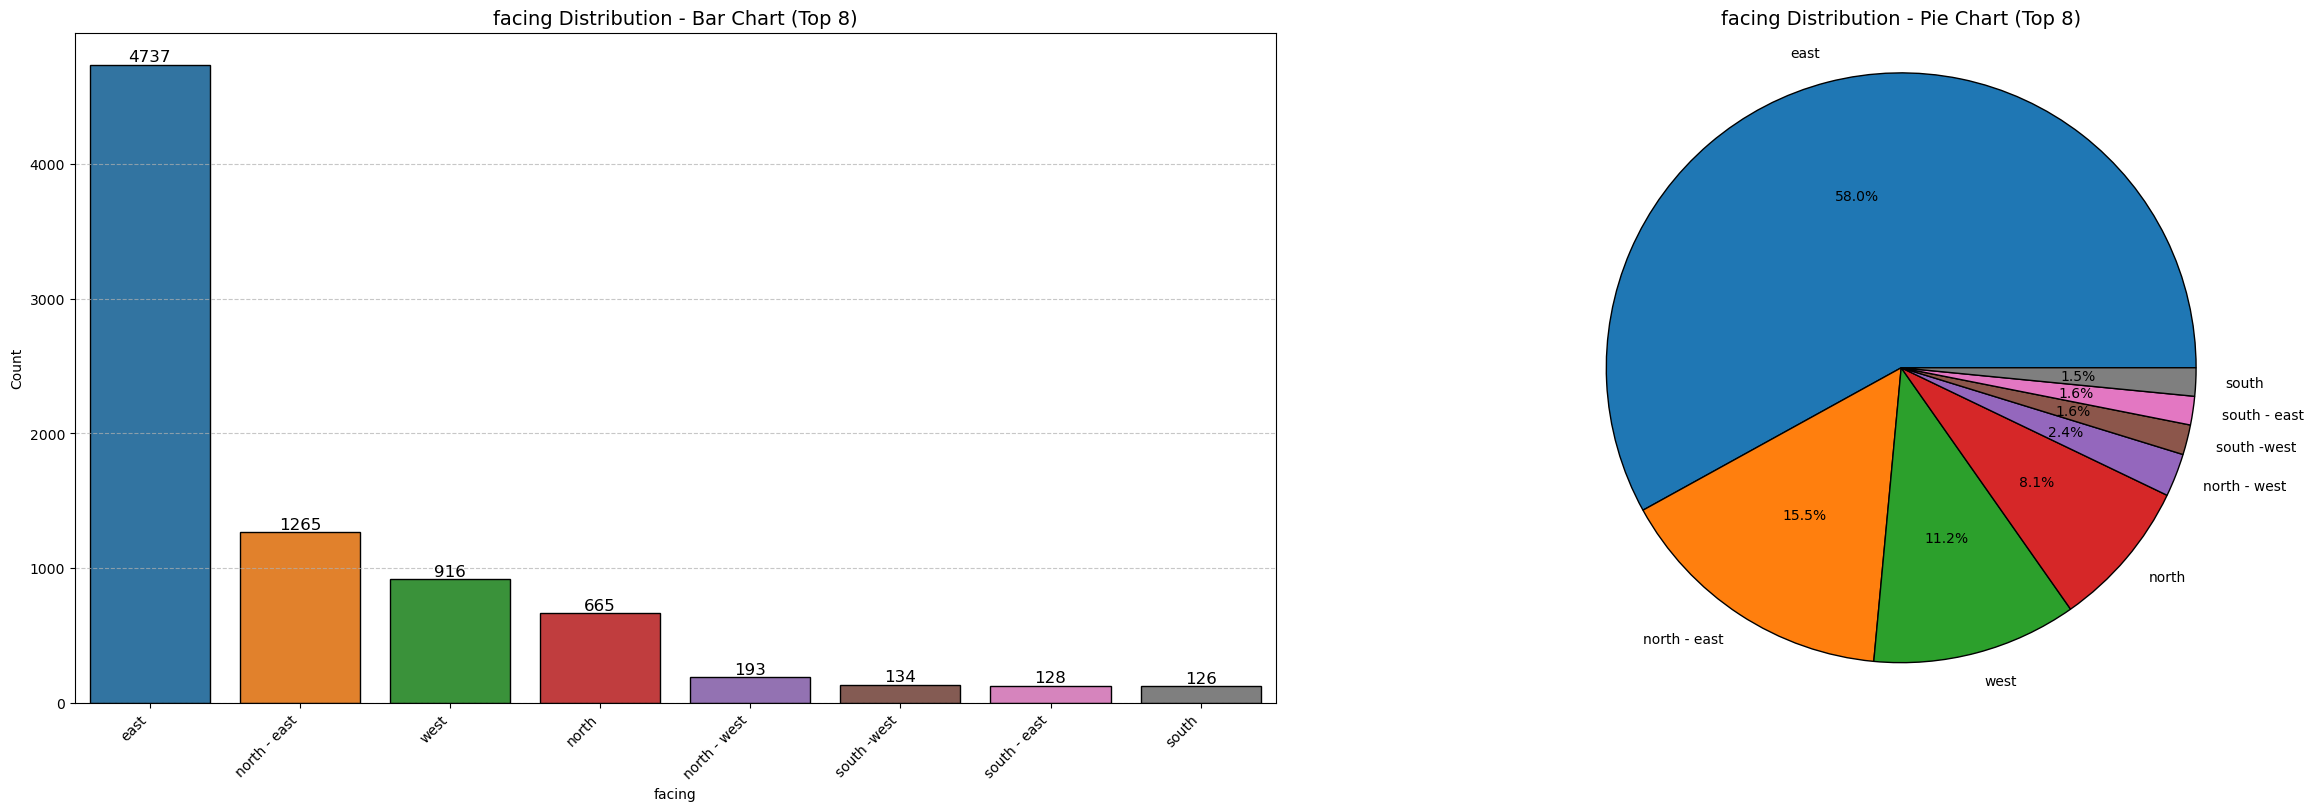

In [157]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'facing', bar_top_n=8, pie_top_n=8)

In [158]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'facing',9, 0.90)

Top 9 cumulative values:
facing
east            0.580230
north - east    0.735179
west            0.847379
north           0.928834
north - west    0.952474
south -west     0.968888
south - east    0.984566
south           1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 4 Properties below 90.0% percentile: ['east', 'north', 'north - east', 'west']


`observation`
- 3730 missing values
- 58.00% properties have east facing followed by north-east(15.5%) and west(11.2%)
- all other facing are less than 10%

# seller

In [159]:
# no of unique categories and value_counts
analyze_value_counts(df, 'seller', top_n=3)  

Unique Categories in 'seller': 3
--------------------------------------------------
seller
realestateagent    8113
person             3421
organization        360
Name: count, dtype: int64


In [160]:
# missing values
df['seller'].isna().sum()

0

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


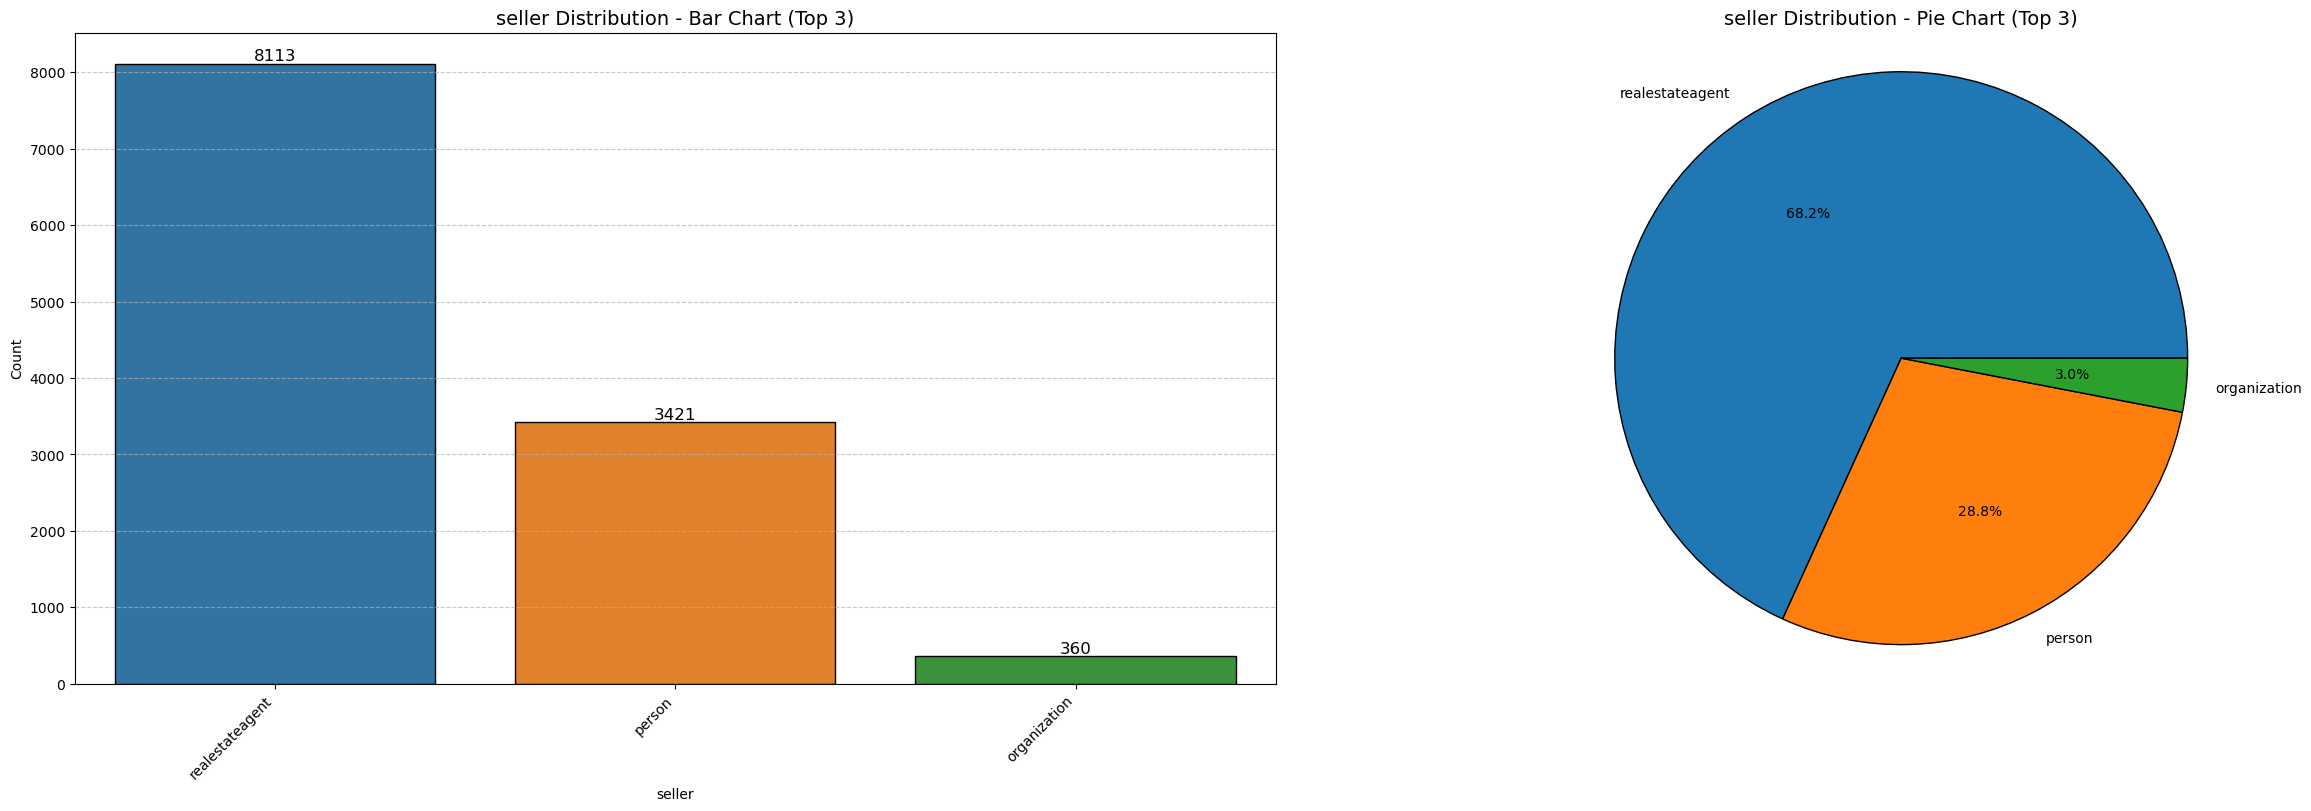

In [161]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'seller', bar_top_n=3, pie_top_n=3)

In [162]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'seller',3, 0.90)

Top 3 cumulative values:
seller
realestateagent    0.682109
person             0.969733
organization       1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 2 Properties below 90.0% percentile: ['person', 'realestateagent']


`observations`
- The column represents the entity responsible for selling the property.  
- There are no missing values in this column.  
- 68.20% of properties are listed by estate agents acting as brokers to facilitate sales.  
- 28.80% of properties are being sold directly by individuals (could be owners or estate agents as well).  
- 3.00% of properties are listed for sale by organizations.  

# addressregion

In [163]:
# no of unique categories and value_counts
analyze_value_counts(df, 'addressregion', top_n=4)  

Unique Categories in 'addressregion': 4
--------------------------------------------------
addressregion
mumbai         8519
thane          1615
navi mumbai    1599
palghar         161
Name: count, dtype: int64


In [164]:
# missing values
df['addressregion'].isna().sum()

0

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


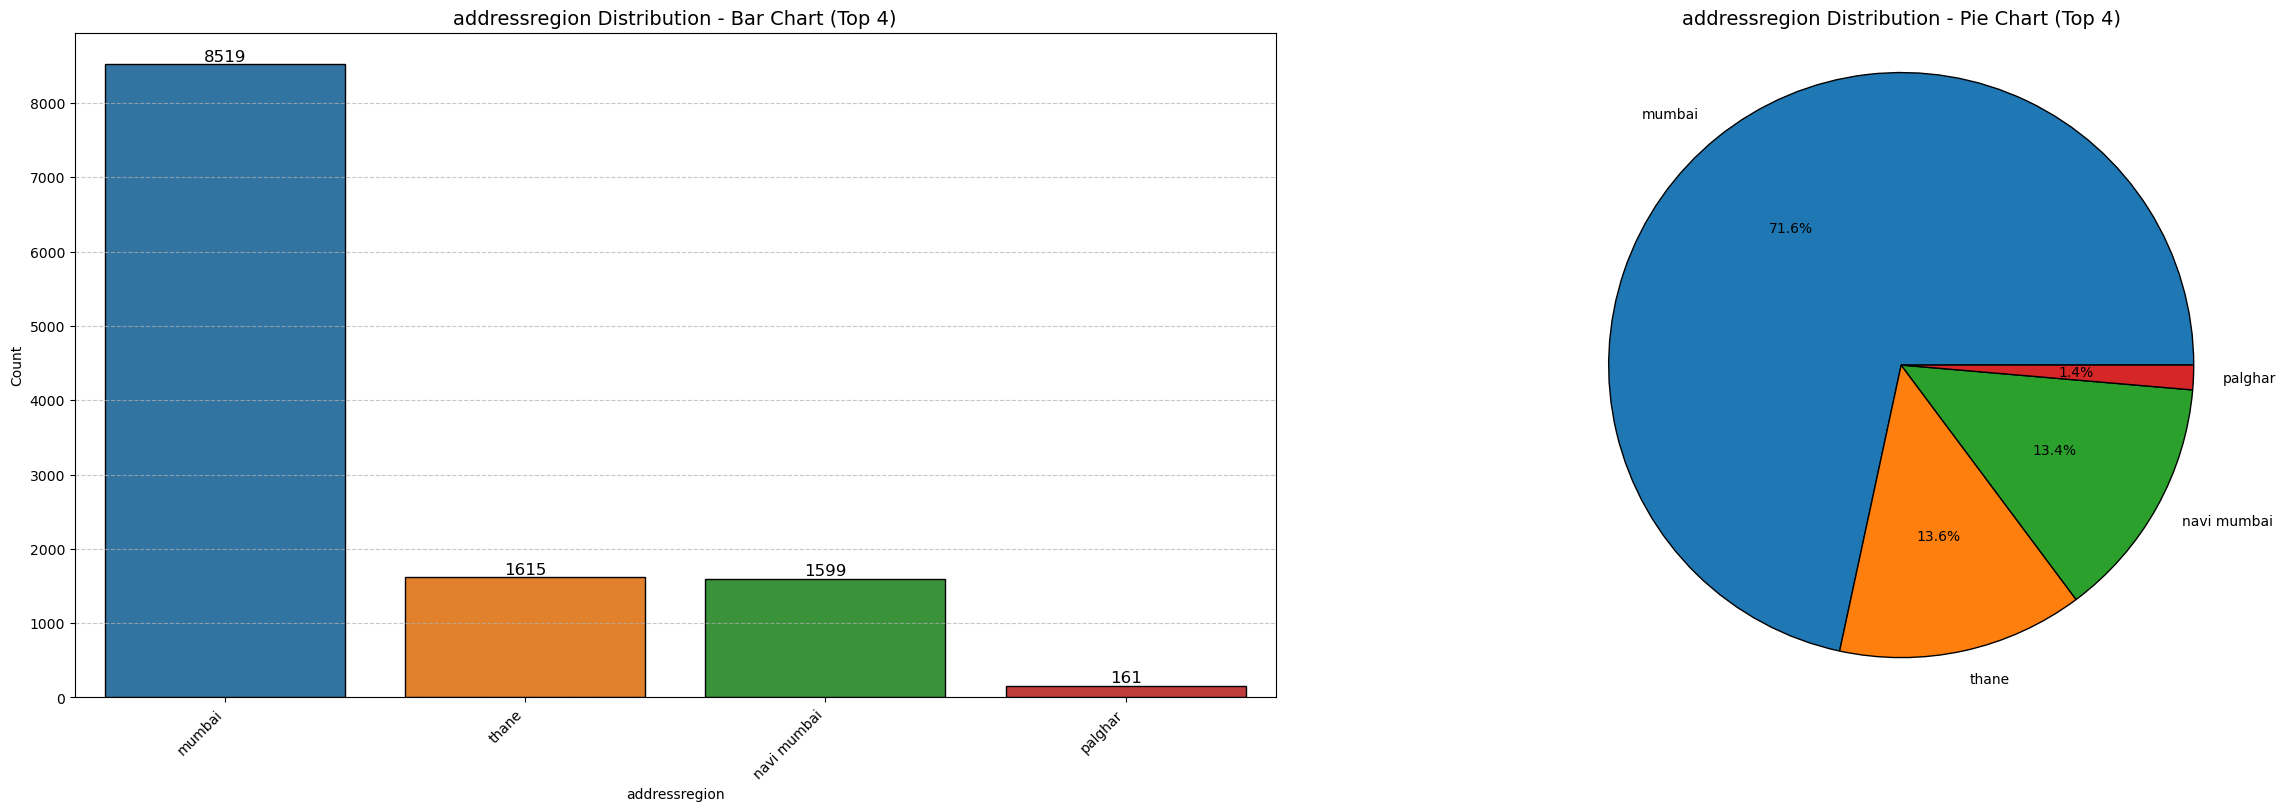

In [165]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'addressregion', bar_top_n=4, pie_top_n=4)

In [166]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'addressregion',4, 0.90)

Top 4 cumulative values:
addressregion
mumbai         0.716243
thane          0.852026
navi mumbai    0.986464
palghar        1.000000
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 3 Properties below 90.0% percentile: ['mumbai', 'navi mumbai', 'thane']


`observation`
- most of the data is from mumbai region and it can create bias
- thane and navi mumbai almost have same properties in data
- very less number of properties for palghar region 

# price_category

In [167]:
# no of unique categories and value_counts
analyze_value_counts(df, 'price_category', top_n=13)  

Unique Categories in 'price_category': 13
--------------------------------------------------
price_category
1.00 - 1.99        3465
0.00 - 0.99        3162
2.00 - 2.99        2003
3.00 - 3.99        1073
4.00 - 4.99         572
5.00 - 5.99         415
6.00 - 6.99         294
10.00 - 14.99       243
7.00 - 7.99         189
8.00 - 8.99         140
20.00 and above     127
15.00 - 20.00       109
9.00 - 9.99         102
Name: count, dtype: int64


In [168]:
# missing values
df['price_category'].isna().sum()

0

C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


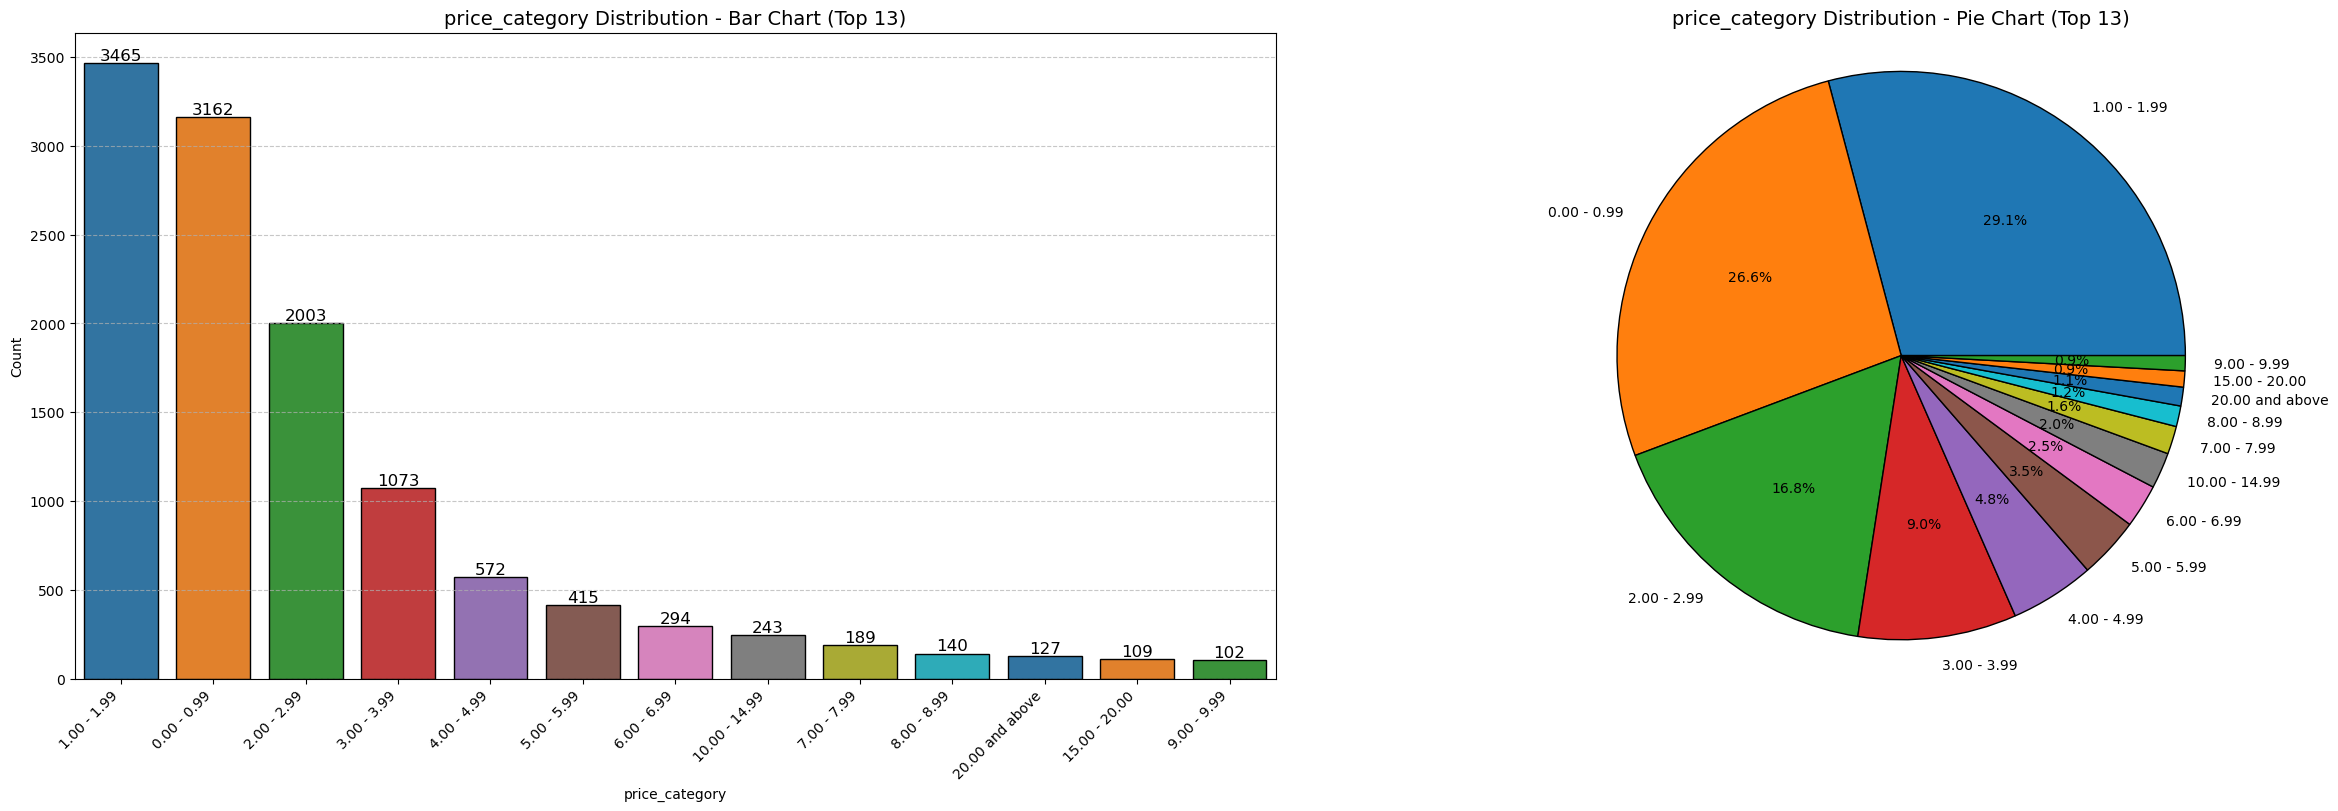

In [169]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'price_category', bar_top_n=13, pie_top_n=13)

In [170]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'price_category',7, 0.90)

Top 7 cumulative values:
price_category
1.00 - 1.99    0.291323
0.00 - 0.99    0.557172
2.00 - 2.99    0.725576
3.00 - 3.99    0.815789
4.00 - 4.99    0.863881
5.00 - 5.99    0.898772
6.00 - 6.99    0.923491
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 7 Properties below 90.0% percentile: ['0.00 - 0.99', '1.00 - 1.99', '2.00 - 2.99', '3.00 - 3.99', '4.00 - 4.99', '5.00 - 5.99', '6.00 - 6.99']


`observation`
- 80% properties are below 4 cr

# location_from_wholeaddress

In [172]:
# no of unique categories and value_counts
analyze_value_counts(df, 'location_from_wholeaddress', top_n=13)  

Unique Categories in 'location_from_wholeaddress': 906
--------------------------------------------------
location_from_wholeaddress
mulund west       336
andheri west      297
kandivali east    284
kharghar          264
powai             242
andheri east      242
malad west        241
chembur           235
panvel            228
goregaon west     225
kandivali west    207
borivali east     196
mira road east    187
Name: count, dtype: int64


In [173]:
print(df['location_from_wholeaddress'].isna().sum())

485


In [174]:
#make rd as road in address column
df['address'] = df['address'].astype(str).str.replace(r'\brd\b', 'road', regex=True)

In [175]:
#if lst values match found in address column,then update location_from_wholeaddress with the matched value

lst = [
    "mira road east", "mira road west", "mira rd east", "mira rd west",
    "vile parle east", "vile parle west", "lower parel west", "lower parel east",
    "new panvel east", "new panvel west", "grand road east", "grand road west",
    "charni road east", "charni road west", "grand rd east", "grand rd west",
    "charni rd east", "charni rd west", "kanjur marg east", "kanjur marg west",
    "mira bhayandar east", "mira bhayandar west", "marine lines east", "marine lines west",
    "ram mandir west", "ram mandir east", "vasai road west", "vasai road east",
    "matunga road west", "matunga road east", "vasai rd west", "vasai rd east",
    "matunga rd west", "matunga rd east", "rajendra nagar west", "rajendra nagar east",
    "tilak nagar west", "tilak nagar east", "diva station east", "diva station west",
    "ville parla west", "ville parla east", "lower pare west", "lower pare east",
    "mumbai central east", "mumbai central west"
]
# Step 1: Filter NaN rows
df_nan1 = df[df['location_from_wholeaddress'].isna()].copy()

# Step 2 & 3: Match with lst and update location_from_wholeaddress
for index, row in df_nan1.iterrows():
    for loc in lst:
        if loc in row['address'].lower():  # Case insensitive match
            df.at[index, 'location_from_wholeaddress'] = loc
            break  # Stop at first match

In [176]:
print(df['location_from_wholeaddress'].isna().sum())

479


In [177]:
# Function to extract "<name> east" or "<name> west" from 'address'
def extract_location(address):
    # Use regex to find a word followed by 'east' or 'west'
    match = re.search(r'(\w+)\s+(east|west)', address, re.IGNORECASE)
    if match:
        return f"{match.group(1)} {match.group(2)}"
    return np.nan  # If no match, return NaN

# Filter the rows where 'location_from_wholeaddress' is NaN
df_nan2 = df[df['location_from_wholeaddress'].isna()]

# Apply the extract_location function only to the 'address' column in the filtered rows
df.loc[df_nan2.index, 'location_from_wholeaddress'] = df_nan2['address'].apply(extract_location)

# Check if the missing values are filled
print(df['location_from_wholeaddress'].isna().sum())

382


C:\Users\ABC\AppData\Local\Temp\ipykernel_5012\1782740589.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='count', data=bar_data, ax=ax1, order=bar_data[feature],


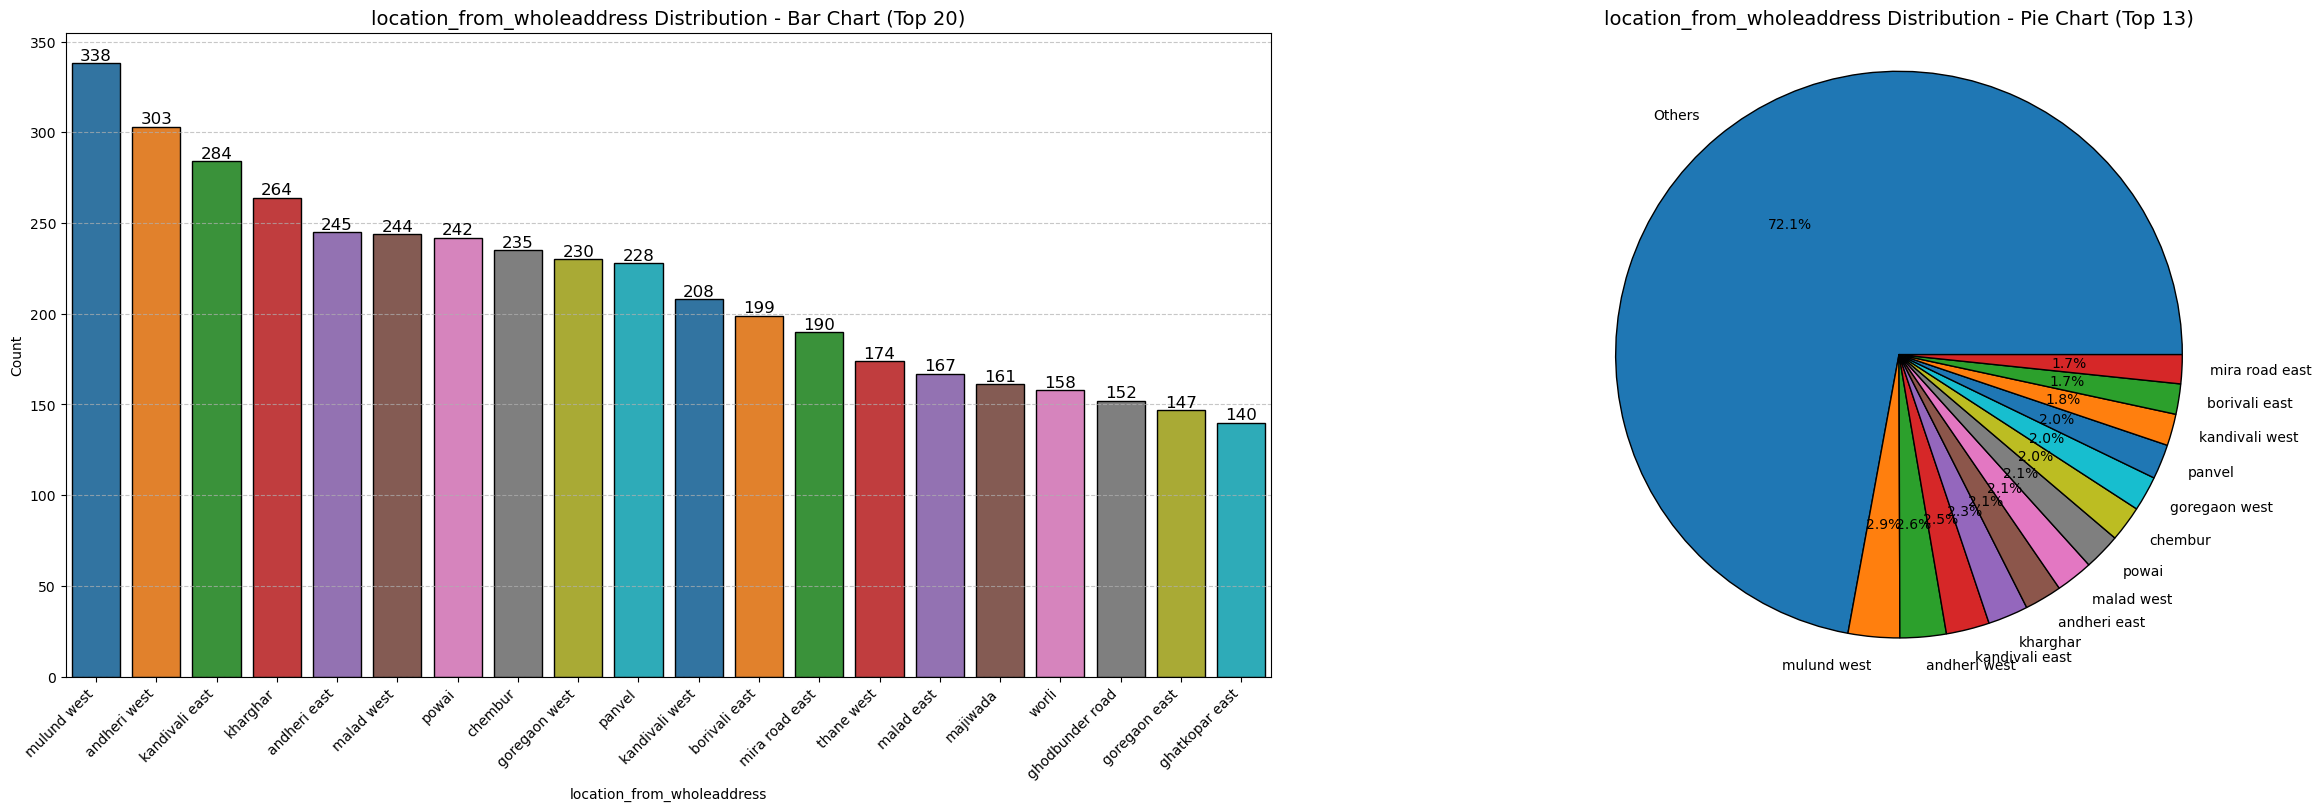

In [178]:
#bar chart and pie plot 
bar_pie_chart_plot(df, 'location_from_wholeaddress', bar_top_n=20, pie_top_n=13)

In [179]:
#Filter Top N% Values Based on Cumulative Distribution
top_values, top_cumulative = filter_top_n_percent(df, 'location_from_wholeaddress',7, 0.50)

Top 7 cumulative values:
location_from_wholeaddress
mulund west       0.029361
andheri west      0.055681
kandivali east    0.080351
kharghar          0.103284
andheri east      0.124566
malad west        0.145761
powai             0.166782
Name: proportion, dtype: float64

----------------------------------------------------------------------------------------------------
Total 34 Properties below 50.0% percentile: ['andheri east', 'andheri west', 'balkum pada', 'bandra east', 'bhandup west', 'borivali east', 'borivali west', 'byculla', 'chandivali', 'chembur', 'ghatkopar east', 'ghodbunder road', 'goregaon east', 'goregaon west', 'kandivali east', 'kandivali west', 'kharghar', 'kolshet road', 'mahalakshmi', 'majiwada', 'malad east', 'malad west', 'mira road area', 'mira road east', 'mulund west', 'panvel', 'powai', 'prabhadevi', 'thane west', 'ulwe', 'virar west', 'wadala', 'wadala east', 'worli']


In [180]:
mapping = {"near naupada police station, thane, maharashtra" : "thane west",
        "new suyash chs naupada, thane, maharashtra" : "thane west",
        "marine lines, mumbai, maharashtra" : "marine lines",
        "kalher, thane, maharashtra" : "bhiwandi",
        "kanikiya beverly park mira road, mumbai, maharashtra" : "mira road east",
        "204, 2nd flr, ramraj bldg, nr. ram mandir, rajanpada - sector-27, navi mumbai, maharashtra" : "sector 27 rajanpada",
        "202 dhrmasetu plot no 2225 sec 19 koperkhairane, navi mumbai, maharashtra" : "sector 19 koperkhairane",
        "kashimira near whestran express hyway, mumbai, maharashtra" : "mira road east",
        "near burhani college mazgaon mumbai 10, mumbai, maharashtra" : "mazgaon",
        "ulwe sector 21, navi mumbai, maharashtra" : "sector 21 ulwe",
        "lakeshore greens by lodha, thane, maharashtra" : "dombivli west",
        "santa cruz, mumbai, maharashtra" : "santacruz",
        "kopar khairane, navi mumbai, maharashtra" : "koparkhairane",
        "1801, 18th floor, chunam lane, lamington road, grantroad e, mumbai 400007, mumbai, maharashtra" : "grant road east",
        "charkop village near dingeshwar talao and jalaram temple, mumbai, maharashtra" : "kandivali west",
        "sarfaraz iqbal heights, ymca road 3, near maratha mandir, mumbai central, mumbai, maharashtra" : "mumbai central",
        "panchseel heights, mahavir nagar, mumbai, maharashtra" : "kandivali west",
        "sector 5 pushpak nagar, navi mumbai, maharashtra" : "sector 5 pushpak nagar",
        "poonam park view, global city, virar, thane, maharashtra" : "virar west",
        "om ekdant soc, sec-19, koperkharine, near jummy tower, navi mumbai, maharashtra" : "sector 19 koperkharine",
        "sai vrindhavan koparkhairne., navi mumbai, maharashtra" : "koparkhairne",
        "owale, ghodbunder road, thane, maharashtra" : "thane west",
        "sector 21 ulwe, navi mumbai, maharashtra" : "sector 21 ulwe",
        "dombivli, mumbai, maharashtra" : "dombivli",
        "amber enclave - 3rd floor thakurli e, mumbai, maharashtra" : "thakurli east",
        "anath sai apartment, thane, maharashtra" : "thane west",
        "willingdon heights 32nd flr near tardeo rto tulsiwadi, mumbai, maharashtra" : "tardeo",
        "12th floor c2 wing treetops lodha upper thane mankoli bhiwandi thane maharashtra 421302, mumbai, maharashtra" : "bhiwandi",
        "chincholi phatak, mumbai, maharashtra" : "malad west",
        "kanakiya, mumbai, maharashtra" : "kandivali east",
        "puranik hometown kasarvadavli, mumbai, maharashtra" : "thane west",
        "boraivali w 401, mumbai, maharashtra" : "borivali west",
        "prabhadevi, mumbai, maharashtra" : "prabhadevi",
        "green road, thane, maharashtra" : "thane west",
        "lagoona, thane, maharashtra" : "thane west",
        "kasarvadavli, thane, maharashtra" : "thane west",
        "kasarvadavli, thane, maharashtra" : "thane west",
        "dr annie besant road, worli, mumbai, maharashtra 400018, india, mumbai, maharashtra" : "worli",
        "gorai 2, mumbai, maharashtra" : "gorai",
        "lodha casa lakeshore green khoni dombivli, nilje gaon, maharashtra 421204, india, thane, maharashtra" : "dombivli east",
        "diamind garden chembur, mumbai, maharashtra" : "chembur",
        "sector 17 kamothe, navi mumbai, maharashtra" : "kamothe",
        "highland complex, mumbai, maharashtra" : "kandivali east",
        "jerbai wadia road, near tata hospital, parel, mumbai, maharashtra" : "parel",
        "gokhale road, naupada thane, thane, maharashtra" : "naupada",
        "taloja phase 2, navi mumbai, maharashtra" : "taloja",
        "ghansoli sector 11, navi mumbai, maharashtra" : "ghansoli",
        "ramnagar, thane, maharashtra" : "thane west",
        "ram maruti, thane, maharashtra" : "thane west",
        "marine lines, mumbai, maharashtra" : "marine lines",
        "sector 12 vashi., navi mumbai, maharashtra" : "sector 12 vashi",
        "just opposite of mansarovar railway station, navi mumbai, maharashtra" : "mansarovar",
        "bhaskar colony, thane, maharashtra" : "thane west",
        "taloja phase 2, navi mumbai, maharashtra" : "taloja",
        "charkop sector 3charkop gaon, mumbai, maharashtra" : "kandivali west",
        "157, pantnagar, 1st building naidu colony, mumbai, maharashtra" : "ghatkopar east",
        "godrej chandivali, mumbai, maharashtra" : "chandivali",
        "kalwa, thane, thane, maharashtra" : "kalwa",
        "ghansoli, navi mumbai, maharashtra" : "ghansoli",
        "suncity corner seawoodnerul, navi mumbai, maharashtra" : "nerul",
        "lagoona, thane, maharashtra" : "dombivli east",
        "satyam apartment, sector 19, kharghar, navi mumbai, maharashtra" : "kharghar",
        "tilak nagar chembur, mumbai 400089., mumbai, maharashtra" : "chembur",
        "401, sai aakash co op housing society, plot no.23, sector 18, ulwe, navi mumbai, maharashtra" : "sector 18 ulwe",
        "palava casa bella gold, mumbai, maharashtra" : "palava",
        "near vitthal mandir kharigaon kalwa, thane, maharashtra" : "kalwa",
        "kharghar, navi mumbai, maharashtra" : "kharghar",
        "neral karjat, mumbai, maharashtra" : "neral",
        "pahhal avenue, mumbai, maharashtra" : "goregaon west",
        "157, naidu colony, pantnagar, mumbai, maharashtra" : "ghatkopar east",
        "mangalmurthy complex, temghar, thane, maharashtra" : "bhiwandi",
        "plot no b1b, sector 9, airoli navimumbai, mumbai, maharashtra" : "sector 9 airoli",
        "chikhloli jambul phata, thane, maharashtra" : "chikhloli",
        "bapu nagar apartment., thane, maharashtra" : "bapu nagar",
        "crown taloja by lodha, taloja bypass phata, antarli, maharashtra 421204, mumbai, maharashtra" : "taloja",
        "morya garden residency vichumbe, navi mumbai, maharashtra" : "new panvel east",
        "sec-19, navi mumbai, maharashtra" : "sector 19 navi mumbai",
        "siddhivinayak appartment airoli diva koliwada near airoli mulund bridge diva goan gavthan, navi mumbai, maharashtra" : "airoli",  
        "kalher, thane, maharashtra" : "kalher",  
        "vinay nagar, mira road, mumbai, maharashtra" : "mira road east",
        "shree siddhivinayak tower vartaknagar, thane, maharashtra" : "vartaknagar",
        "kasarwadvali godbandar road thane, thane, maharashtra" : "kasarwadvali",  
        "panvel matheran road opp balaji symphony sukapur, navi mumbai, maharashtra" : "panvel",
        "sector 19, shahbaz gaon, cbd belapur, navi mumbai, navi mumbai, maharashtra" : "cbd belapur",
        "gamdevi grant road, mumbai, maharashtra" : "gamdevi",
        "dongri sandhurst road, mumbai, maharashtra" : "dongri",
        "casa rio arebiana, thane, maharashtra" : "thane",
        "lalani dreams residency, village dahivali turfe nid, taluka karjat, mumbai, maharashtra" : "karjat",
        "lodha crown akbar camp road kolshet mumbai maharashtra, mumbai, maharashtra" : "kolshet",  
        "202 sai shruti residency plot c 30 sector 4 khanda colony new panvel 410206, navi mumbai, maharashtra" : "new panvel",  
        "casa milano 12th floor - lodha palava phase 2 dombivali kalyan, navi mumbai, maharashtra" : "dombivli",  
        "203, sunrise glory shilphata near daighar police station, navi mumbai, maharashtra" : "shilphata", 
        "dronagiri navi mumbai., mumbai, maharashtra" : "dronagiri",  
        "muthaval, thane, maharashtra" : "muthaval",  
        "sector 5 koperkhairne navi mumbai, navi mumbai, maharashtra" : "koperkhairne",  
        "304, audumber chaya chsl, patilwadi, savarkar nagar, behind thakur college, thane, maharashtra" : "thane west",
        "old panvel near savarkar chowk., navi mumbai, maharashtra" : "old panvel",  
        "opposite j p international school haranwadi naka, mahim road, palghar, palghar, maharashtra" : "palghar",
        "tower 13 2003 runwal gardens dombivali, thane, maharashtra" : "dombivli",
        "village boisar, tal palghar, dist. thane, palghar, maharashtra" : "boisar",  
        "century bazar near chroma showroom, mumbai, maharashtra" : "century bazar",  
        "d/305., palghar, maharashtra" : "palghar",  
        "e 2 303 gaurav citymira road area, mumbai, maharashtra" : "mira road east",
        "umiya darshan chs, nerul sec 50 new, navi mumbaiseawoods, navi mumbai, maharashtra" : "seawoods",  
        "rambhau mhalgi marg, besides shrushti residency, khambalpada, thakurli e, dombivli e, thane, maharashtra" : "thakurli east",
        "ramabai paradise opp garden city tawor mira road thane, mumbai, maharashtra" : "mira road",  
        "siddhivinayak florentia garden citymira bhayandar, mumbai, maharashtra" : "mira bhayandar",  
        "bonkode sector 12, navi mumbai, maharashtra" : "sector 12 bonkode",  
        "vasant villa, padmavati devi marg, iit market, powai, mumbai 400076, mumbai, maharashtra" : "powai",  
        "novapark co opp housing society ltd flat no 303 plot no 68., navi mumbai, maharashtra" : "navi mumbai",
        "mira road area, mumbai, maharashtra" : "mira road",  
        "near divya heights in sector 26 navi mumbai, navi mumbai, maharashtra" : "sector 26 navi mumbai",
        "ganesh nagar, near boisar railway starion, palghar, maharashtra" : "boisar",  
        "c-001 nand dham building kashimira mira road, mumbai, maharashtra" : "mira road east",
        "om sankalp chs, kopar road, thane 421202, thane, maharashtra" : "dombivli west",
        "svarna kojagiri, mumbai, maharashtra" : "goregaon east",
        "unique aurum, poonam garden, thane, maharashtra" : "mira road east",
        "neelkanth darshan society b-203125a near hotel panvel palaceold panvel, mumbai, maharashtra" : "old panvel",
        "mira road kanakia, thane, maharashtra" : "mira road east",
        "panvel, navi mumbai, navi mumbai, maharashtra" : "navi mumbai",
        "chitalsar manpada, thane, maharashtra" : "manpada",  
        "near raj kamal studio, parel, mumbai, maharashtra" : "parel",  
        "nilje station road, nilje, thane, maharashtra" : "nilje", 
        "flat no-604, plot no-4, sector 14, taloja, navi mumbai, maharashtra" : "taloja",  
        "jethe tower, 701, ambawadi, opp. ambawadi bus stop, borivali e. mumbai-400068, mumbai, maharashtra" : "borivali east",  
        "lodha crown viva, flat 1006, 10th flr tower 5, majiwada, thane, mumbai, maharashtra" : "majiwada",  
        "sunbeam heritage hsg soc, sector 4c, khanda colony asudgoan panvel, navi mumbai, maharashtra" : "panvel",
        "lodha upper thane, treetops, thane, maharashtra" : "upper thane",  
        "aanandi park a101 behind ganapati mandir durgesh park kalher bhiwandi, thane, maharashtra" : "kalher",  
        "a-9/201 tejaswi apt, near st. thomas church, sai baba nagar, mira road., mumbai, maharashtra" : "mira road east",
        "sector 11, next to miraj cinema, navi mumbai, maharashtra" : "sector 11",
        "aster, regency anantham, dombivli, mumbai, maharashtra" : "dombivli",  
        "chand nagar, near baba medical, thane, maharashtra" : "thane", 
        "thane majiwada lodha complex opp-water tank, thane, maharashtra" : "majiwada",  
        "near kalidas natyamamdir, mumbai, maharashtra" : "mulund west",
        "badlapur, thane, maharashtra" : "badlapur",  
        "near mittal club, palghar, maharashtra" : "palghar",  
        "shree krupa apt flat no 102 plot144145 sector10 new panvel navi mumbai, navi mumbai, maharashtra" : "new panvel",  
        "sector 20, cbd belapur opp bank of india  park, adjacent to hansraj building, navi mumbai, maharashtra" : "sector 20 cbd belapur",  
        "brahmand patlipada link road, opp tulsi hotel, thane, maharashtra" : "thane",  
        "gurukiran socity airoli sector 30 gothavali, navi mumbai, maharashtra" : "sector 30 gothavali"}

# Fill "location_from_wholeaddress" based on "address" matching mapping dictionary
df.loc[df["location_from_wholeaddress"].isna(), "location_from_wholeaddress"] = df["address"].map(mapping)

In [181]:
print(df['location_from_wholeaddress'].isna().sum())

241


In [182]:
df1 = df[df['location_from_wholeaddress'].isna()][['address','location_from_wholeaddress', 'wholeaddress', 'addressregion']]
df1.to_excel("nan_274_address_analysis.xlsx")

In [183]:
df2 = df[['address','location_from_wholeaddress', 'wholeaddress', 'addressregion']]
df2.to_excel("analysis_location_from_wholeaddress.xlsx")

In [184]:
"""correct - wrong
bhayandar - bhayander 
century Bazaar - century Bazar
dombivli - dombivali
kasarvadavali - kasarwadvali
kopar khairane - koparkhairane , koparkhairne , koperkhairne , koperkhairane ,koperkharine
goregaon mulund link road - mulund goregaon link road
naigaon - naigoan
nala sopara - nalasopara, nallasopara
palaspa - palaspe phata
palava city - palava 
shilphata - shil phata
vartak nagar - vartaknagar
vile parle - vileparle

ulhasnagar - 4 east
borivali west - 402borivali west
adai navi mumbai - adai"""


'correct - wrong\nbhayandar - bhayander \ncentury Bazaar - century Bazar\ndombivli - dombivali\nkasarvadavali - kasarwadvali\nkopar khairane - koparkhairane , koparkhairne , koperkhairne , koperkhairane ,koperkharine\ngoregaon mulund link road - mulund goregaon link road\nnaigaon - naigoan\nnala sopara - nalasopara, nallasopara\npalaspa - palaspe phata\npalava city - palava \nshilphata - shil phata\nvartak nagar - vartaknagar\nvile parle - vileparle\n\nulhasnagar - 4 east\nborivali west - 402borivali west\nadai navi mumbai - adai'

In [188]:
df['location_from_wholeaddress'].value_counts().head()

location_from_wholeaddress
mulund west       339
andheri west      303
kandivali east    286
kharghar          266
andheri east      245
Name: count, dtype: int64

In [189]:
df.to_csv("2nd_after_univariate_analysis_dataset.csv",index=False)

In [190]:
df.to_excel('2nd_after_univariate_dataset.xlsx',index=False)

In [192]:
len(df.columns)

46